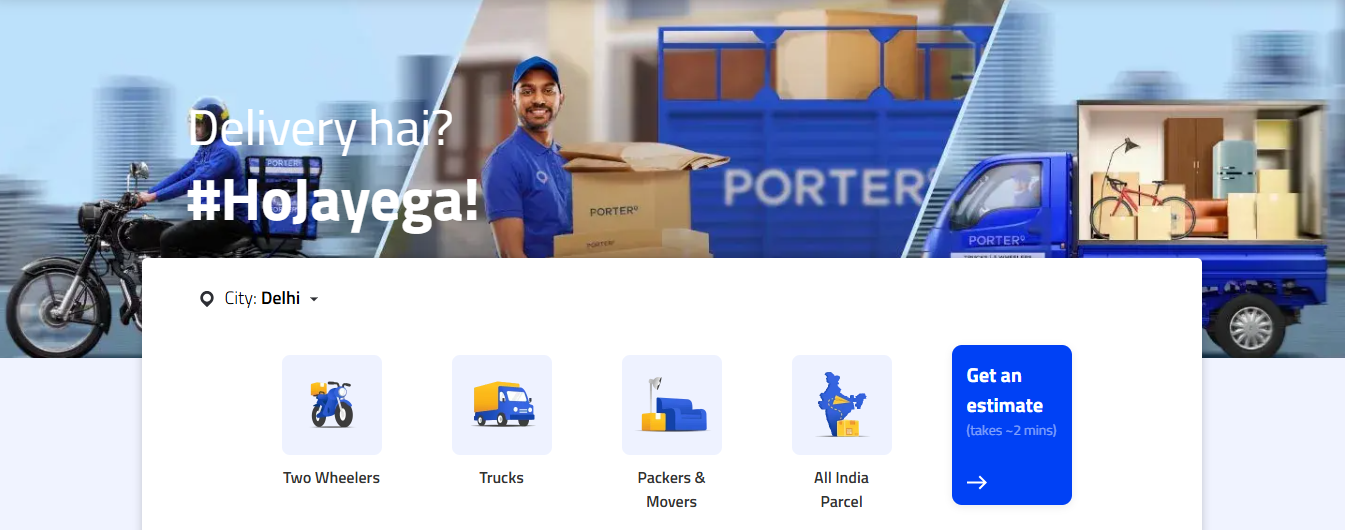

# **Project Name**    -  **Porter Case Study**

##### **Objective**    - The objective of this project is to analyze the factors influencing delivery times for Porter, utilizing historical order data. Through data exploration and visualization, the goal is to identify key patterns, trends, and insights that impact delivery time. By understanding these factors, actionable recommendations can be made to enhance customer satisfaction, optimize the delivery process, and improve operational efficiency for Porter.
##### **Contribution**    - (Manas Nayan Mukherjee) Individual

# **Problem Statement**

Porter, India's largest marketplace for intra-city logistics, works with a wide range of restaurants to deliver their items directly to customers.

The company wants to estimate the delivery time for each order based on various features, such as the items ordered, the restaurant, and the availability of delivery partners. An accurate estimation of delivery time will enhance customer satisfaction and optimize the delivery process.

# **Analysis Guide**  

## 1. Defining the Problem Statement, Importing Data, and Data Structure Analysis (10 points)

- **Clearly define the problem.**
- **Import the dataset and understand its structure.**
  - Dataset shape
  - Data types
  - Missing values
  - Statistical summary

---

## 2. Data Preprocessing and Feature Engineering (30 points)

- **Data cleaning**
- **Handling missing values**
- **Creating the target column (time taken for delivery) from order timestamp and delivery timestamp**
- **Extracting hour and day of the week from timestamps**
- **Encoding categorical columns**

---

## 3. Data Visualization and Cleaning (20 points)

- **Visualize various columns for better understanding (e.g., count plots, scatter plots)**
- **Check if the data contains outliers**
- **Remove outliers using appropriate methods**
- **Plot the data again to see improvements**

---

## 4. Insights and Recommendations (40 points)

- **Provide actionable insights and recommendations based on the analysis**


## ***Concepts will be Tested/evaluated based on:***

- **Exploratory Data Analysis (EDA)**
- **Data preprocessing and feature engineering**
- **Handling missing values and encoding categorical data**
- **Data visualization and cleaning**
- **Outlier detection and removal**


# **Dataset Description and Dictionary**

| Feature                | Description                                                                                     |
|------------------------|-------------------------------------------------------------------------------------------------|
| market_id              | Integer ID for the market where the restaurant is located                                       |
| created_at             | Timestamp at which the order was placed                                                         |
| actual_delivery_time   | Timestamp when the order was delivered                                                          |
| store_primary_category | Category of the restaurant                                                                      |
| order_protocol         | Integer code value for the order protocol (e.g., through Porter, call to restaurant, pre-booked, third-party, etc.) |
| total_items            | Total number of items in the order                                                              |
| subtotal               | Final price of the order                                                                        |
| num_distinct_items     | Number of distinct items in the order                                                           |
| min_item_price         | Price of the cheapest item in the order                                                         |
| max_item_price         | Price of the most expensive item in the order                                                   |
| total_onshift_partners | Number of delivery partners on duty when the order was placed                                   |
| total_busy_partners    | Number of delivery partners attending to other tasks                                            |
| total_outstanding_orders | Total number of orders to be fulfilled at that moment                                         |


# **1. Defining the Problem Statement, Importing Data, and Data Structure Analysis**

###***Clearly define the problem***

**Solution**

As a data analyst working with the Analytics Department of Porter, I have been provided with historical order data and tasked to estimate the delivery time for each order based on various features such as:

* Order Details: Total items, subtotal, number of distinct items, minimum item price, maximum item price.
* Restaurant Information: Market ID, store primary category, store ID.
* Delivery Partner Availability: Total onshift partners, total busy partners, total outstanding orders.
* Timestamp Data: Order creation time (created_at) and actual delivery time (actual_delivery_time).

**Impact**

This solution focuses on accurately estimating delivery times, which can directly lead to enhanced customer satisfaction, optimized delivery processes, and improved operational efficiency. By understanding the factors influencing delivery times, Porter can provide reliable delivery estimates to customers, allocate delivery partners more effectively, and minimize delays. This positions Porter to enhance its reputation as a reliable logistics platform, supporting long-term growth and customer loyalty.


###***Data Exploration***

###***Import Libraries***

In [328]:
# Here is the list of libraries which are required for our Porter case study

# Importing libraries to crunch the numbers and make sense of the data
import pandas as pd  # pandas: Master of tabular data like Excel or CSV files
import numpy as np  # numpy: Expert in numerical operations and array manipulations
import matplotlib.pyplot as plt  # matplotlib: The artist behind static line charts and bar plots
import seaborn as sns  # seaborn: Stylish statistical visualizations with sleek design aesthetics
import missingno as msno  # Visualizing the gaps in our data using missingno
from datetime import datetime  # Handling dates and times like a pro
import warnings  # Noisy warnings begone! We'll keep our output clean
warnings.filterwarnings("ignore")  # Silencing warnings

# Libraries for Processing and Transforming Data
from sklearn.preprocessing import LabelEncoder  # Turns categorical labels (text) into numeric values
from sklearn.impute import SimpleImputer  # Fills missing values with column mean, median, or mode
from sklearn.preprocessing import StandardScaler  # Standardizes numerical features - mean 0, standard deviation 1
from sklearn.utils import resample  # Helps balance imbalanced datasets with undersampling
from imblearn.over_sampling import SMOTE  # Balances datasets by generating synthetic samples

# Our trusty statsmodels for statistical tests
import statsmodels.api as sm # Import the statsmodels module for statistical analysis
from statsmodels.formula.api import ols # Import Ordinary Least Squares (OLS) model

# Reference links for further reading and mastery:
# Matplotlib: https://matplotlib.org/stable/contents.html
# Seaborn: https://seaborn.pydata.org/

# Let’s confirm all our tools are ready for action
print("All necessary libraries have been successfully imported!")

# All geared up for our data adventure with Porter!

All necessary libraries have been successfully imported!


### ***Dataset Loading (Import the dataset)***

In [329]:
# Load the dataset into a pandas DataFrame
# 'pd.read_csv' is used to read the CSV file from the specified path and load it into a DataFrame named 'Porter'
Porter = pd.read_csv('/content/dataset.csv') # This line reads the CSV file from the specified path and loads it into a DataFrame named Porter

# Confirm that the dataset has been successfully loaded
print("Dataset successfully loaded!")

Dataset successfully loaded!


### ***Dataset First View***

In [330]:
# Let's take a peek at the first few rows of our dataset to see what we're working with
# 'head()' method displays the first 5 rows of the DataFrame by default, giving us a quick overview of the data
Porter.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:27:16   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:56:29   
2        3.0  2015-01-22 20:39:28  2015-01-22 21:09:09   
3        3.0  2015-02-03 21:21:45  2015-02-03 22:13:00   
4        3.0  2015-02-15 02:40:36  2015-02-15 03:20:26   

                           store_id store_primary_category  order_protocol  \
0  df263d996281d984952c07998dc54358               american             1.0   
1  f0ade77b43923b38237db569b016ba25                mexican             2.0   
2  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
3  f0ade77b43923b38237db569b016ba25                    NaN             1.0   
4  f0ade77b43923b38237db569b016ba25                    NaN             1.0   

   total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1            1      1900                   1            1400            1400   
2            1      1900                   1            1900            1900   
3            6      6900                   5             600            1800   
4            3      3900                   3            1100            1600   

   total_onshift_partners  total_busy_partners  total_outstanding_orders  
0                    33.0                 14.0                      21.0  
1                     1.0                  2.0                       2.0  
2                     1.0                  0.0                       0.0  
3                     1.0                  1.0                       2.0  
4                     6.0                  6.0                       9.0

### **Observations**

1. **Timestamps**:
   - The dataset includes `created_at` and `actual_delivery_time` columns, providing critical information about when an order was placed and when it was delivered. This will help us calculate the delivery time for each order.

2. **Restaurant Categories**:
   - The `store_primary_category` column indicates the type of restaurant, such as American or Mexican. However, some entries have missing values (NaN) which we need to address during data preprocessing.

3. **Order Protocols**:
   - The `order_protocol` column uses integer codes to represent different order protocols, such as ordering through Porter or directly calling the restaurant.

4. **Order Details**:
   - Columns like `total_items`, `subtotal`, `num_distinct_items`, `min_item_price`, and `max_item_price` provide detailed information about the orders.

5. **Delivery Partner Availability**:
   - The `total_onshift_partners`, `total_busy_partners`, and `total_outstanding_orders` columns offer insights into the availability and workload of delivery partners at the time the order was placed.

6. **Market and Store Information**:
   - The `market_id` and `store_id` columns uniquely identify the market and store associated with each order.

### **Key Insights**

1. **Delivery Time Calculation**:
   - By subtracting the `created_at` timestamp from the `actual_delivery_time` timestamp, we can calculate the delivery time for each order. This will be our target variable for analysis.

2. **Handling Missing Values**:
   - We need to address missing values in the `store_primary_category` column to ensure accurate analysis. This could involve imputation or ignoring rows with missing data.

3. **Feature Engineering**:
   - Additional features can be extracted from the timestamps, such as the hour and day of the week, to understand time-related patterns in delivery times.

4. **Understanding Workload**:
   - The availability and workload of delivery partners (as seen in `total_onshift_partners`, `total_busy_partners`, and `total_outstanding_orders`) might significantly impact delivery times. Analyzing these factors will help us optimize the delivery process.

5. **Categorical Data Encoding**:
   - Categorical columns like `store_primary_category` and `order_protocol` need to be encoded into numerical values for further analysis.

---

Moving ahead to the next step for the in-depth analysis.


## ***Check data shape***

**Let's check the shape of our dataset to see how many rows and columns we have. This will give us an idea of the dataset's size and structure**

In [331]:
# Let's check the shape of our dataset to see how many rows and columns we have
# 'shape' attribute returns a tuple with the number of rows and columns in the DataFrame
Porter.shape

(197428, 14)

#### **Explanation**
- Total rows: 197428
- Total Columns: 14

**This tells us that we have a substantial amount of data to work with, which is fantastic for our analysis!**

## ***Check data types***

**Let's examine the data types of each column in our dataset to understand what kind of data we're working with. This will help us plan our data preprocessing steps more effectively**

In [332]:
# Let's examine the data types of each column in our dataset to understand what kind of data we're working with
# 'dtypes' attribute returns the data type of each column in the DataFrame, helping us understand the structure of our dataset
Porter.dtypes

market_id                   float64
created_at                   object
actual_delivery_time         object
store_id                     object
store_primary_category       object
order_protocol              float64
total_items                   int64
subtotal                      int64
num_distinct_items            int64
min_item_price                int64
max_item_price                int64
total_onshift_partners      float64
total_busy_partners         float64
total_outstanding_orders    float64
dtype: object

## **Observations:**
### **Data Types of Columns**

#### 1. Numeric Columns:
- **market_id (float64)**: Represents the market where the restaurant is located.
- **order_protocol (float64)**: Categorical representation of order protocol.
- **total_items (int64)**: Total number of items in the order.
- **subtotal (int64)**: Final price of the order.
- **num_distinct_items (int64)**: Number of distinct items in the order.
- **min_item_price (int64)**: Price of the cheapest item in the order.
- **max_item_price (int64)**: Price of the most expensive item in the order.
- **total_onshift_partners (float64)**: Number of delivery partners on duty when the order was placed.
- **total_busy_partners (float64)**: Number of delivery partners attending to other tasks.
- **total_outstanding_orders (float64)**: Total number of orders to be fulfilled at that moment.

#### 2. Categorical Columns:
- **store_id (object)**: Unique identifier for each store.
- **store_primary_category (object)**: Category of the restaurant (e.g., American, Mexican).
- **created_at (object)**: Timestamp of when the order was placed.
- **actual_delivery_time (object)**: Timestamp of when the order was delivered.

#### Explanation:
Understanding the data types is crucial for data preprocessing. It helps us identify which columns need conversion or specific handling. For example, timestamps in `created_at` and `actual_delivery_time` should be converted to datetime objects for easier manipulation. Similarly, categorical variables like `store_primary_category` and `order_protocol` need encoding to numerical values for analysis.

**With a clear picture of the data types, let's proceed with the next steps in our data exploration and preprocessing journey!**



### ***Check duplicate and missing values***

In [333]:
# Let's check for any duplicate rows in our dataset and count them
# 'Porter.duplicated().sum()' method checks each row in the dataset and identifies whether it is a duplicate of a previous row
# It returns a boolean Series where True indicates a duplicate row
# The 'sum()' function adds up the True values (duplicates), effectively giving the total count of duplicate rows
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
duplicate_rows = Porter.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

Number of duplicate rows: 0


In [334]:
# Let's check for any missing values in our dataset and count them for each column
# 'Porter.isnull().sum()' method detects missing values in each column and returns a DataFrame of the same shape, with True for missing values and False for non-missing values
# The 'sum()' function then adds up the True values (missing values) for each column, effectively giving the total count of missing values per column
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html
missing_values = Porter.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64


### Observations on Duplicate and Missing Values

#### Duplicate Rows:
- **Number of duplicate rows**: 0
  - There are no duplicate rows in the dataset, which means each record is unique. That's great! It saves us the trouble of having to remove any redundant entries.

#### Missing Values:
- **market_id**: 987 missing values
- **created_at**: 0 missing values (Complete data)
- **actual_delivery_time**: 7 missing values
- **store_id**: 0 missing values (Complete data)
- **store_primary_category**: 4760 missing values
- **order_protocol**: 995 missing values
- **total_items**: 0 missing values (Complete data)
- **subtotal**: 0 missing values (Complete data)
- **num_distinct_items**: 0 missing values (Complete data)
- **min_item_price**: 0 missing values (Complete data)
- **max_item_price**: 0 missing values (Complete data)
- **total_onshift_partners**: 16262 missing values
- **total_busy_partners**: 16262 missing values
- **total_outstanding_orders**: 16262 missing values

### Key Insights:
1. **No Duplicate Rows**: It’s fantastic that we don’t have any duplicate rows, ensuring the uniqueness of each entry in our dataset.

2. **Missing Values**:
   - **market_id**: 987 missing values. We might need to investigate why these are missing and consider appropriate imputation methods.
   - **actual_delivery_time**: Only 7 missing values, which should be manageable to handle.
   - **store_primary_category**: 4760 missing values. A significant number of entries lack this information, which could affect our analysis.
   - **order_protocol**: 995 missing values. We need to assess the impact of these missing values on our analysis.
   - **total_onshift_partners, total_busy_partners, total_outstanding_orders**: A substantial amount of missing values (16262 each). This might significantly impact our understanding of delivery partner availability and workload.

Addressing these missing values will be crucial in ensuring the accuracy and reliability of our analysis. We can handle missing data through methods like imputation, filling with median/mode, or even removing rows with missing values, depending on the context and impact.

With these insights in mind, let's proceed with the next steps of handling missing values and preparing our dataset for further analysis.




### ***Let's viualize the missing values***
**Visualizing missing values will help us better understand their distribution and identify any patterns**

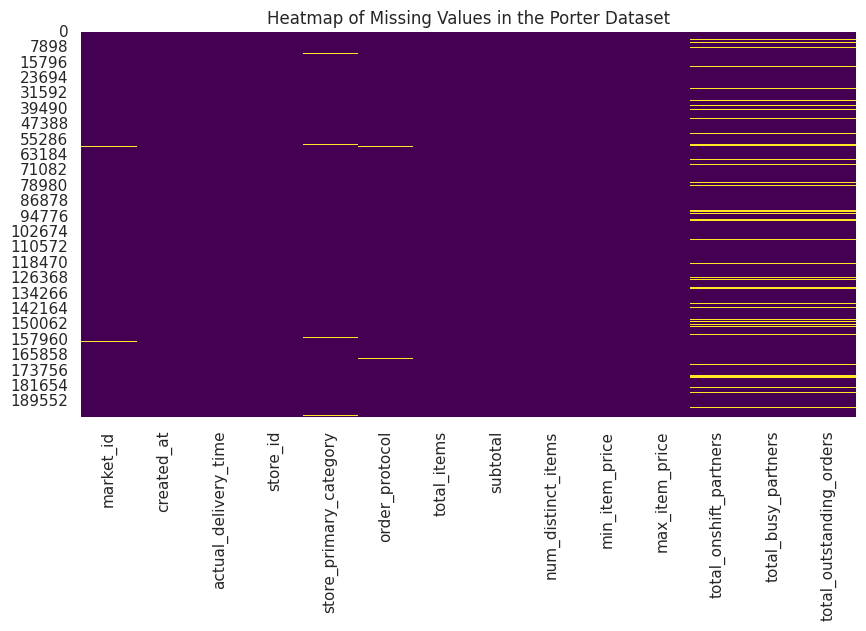

In [335]:
# Visualizing the missing values in the dataset
# This helps us understand the extent and pattern of missing data

# Set figure size for better readability
plt.figure(figsize=(10, 5))

# Create a heatmap of missing values using seaborn
sns.heatmap(Porter.isnull(), cbar=False, cmap="viridis")

# Add a title for the heatmap
plt.title("Heatmap of Missing Values in the Porter Dataset")

# Display the heatmap
plt.show()

# Here I have used:
# - cbar=False: Removes the color bar to focus on the heatmap itself.
# - cmap="viridis": Uses the 'viridis' colormap for better contrast and visibility.
# - Viridis : it's a color map used in data visualization, particularly for heatmaps and other graphical representations
# Reference: https://seaborn.pydata.org/generated/seaborn.heatmap.html

### **Highlighting the important things about this dataset**

The dataset provided is sourced from Porter, a logistics and delivery service company. It focuses on analyzing order and delivery-related information to understand various factors influencing delivery times and optimize the delivery process.

The analysis aims to provide insights into the characteristics and behaviors that affect delivery times, allowing the company to enhance its operational efficiency and customer satisfaction.

The above dataset contains **197,428 rows and 14 columns**. It includes information such as order details, delivery timings, restaurant categories, and delivery partner availability. There are some missing values in the dataset, particularly for the `market_id`, `actual_delivery_time`, `store_primary_category`, `order_protocol`, `total_onshift_partners`, `total_busy_partners`, and `total_outstanding_orders` columns.

#### Key Observations:

- The dataset does not contain any duplicate rows, ensuring the uniqueness of each entry.

- There are missing values in several columns:
  - **market_id**: 987 missing values.
  - **actual_delivery_time**: 7 missing values.
  - **store_primary_category**: 4760 missing values.
  - **order_protocol**: 995 missing values.
  - **total_onshift_partners, total_busy_partners, total_outstanding_orders**: 16,262 missing values each.

- The `created_at` and `actual_delivery_time` columns are currently stored as object data types, which need to be converted to datetime format for easier manipulation and analysis.

The goal is to analyze these columns and derive insights that help in optimizing delivery times, enabling Porter to improve operational efficiency and customer satisfaction.

## ***Statistical Summary***

**Understanding Variables**



**Listing the columns in the dataset is a great way to understand the different features available for analysis. Here's how I have done it:**

In [336]:
# Let's list all the columns in our dataset to see the different features we're working with
columns = Porter.columns
print(columns)

# 'columns' attribute returns an Index object containing the column names of the DataFrame
# This helps us quickly understand the structure of the dataset and the various features available for analysis

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders'],
      dtype='object')


**Let's find out the numerical columns**

In [337]:
# Checking numerical columns in the Porter dataset to identify which columns contain numerical data
# 'numerical_columns' will store the names of columns with data types 'int64' and 'float64'
numerical_columns = Porter.select_dtypes(include=['int64', 'float64']).columns

# Printing out the numerical columns so we can see which ones they are
print("Numerical Columns:", numerical_columns)

Numerical Columns: Index(['market_id', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders'],
      dtype='object')


**Let's find out the categorical columns**

In [338]:
# Checking categorical columns in the Porter dataset to identify which columns contain categorical data
# 'categorical_columns' will store the names of columns with data types 'object'
categorical_columns = Porter.select_dtypes(include=['object']).columns

# Printing out the categorical columns so we can see which ones they are
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category'],
      dtype='object')


**Let's dive into the statiscal summary for our numerical and categorical variables**

In [339]:
# Let's get a comprehensive overview of our dataset's statistics!
# This will include numerical statistics like count, mean, std dev, min, and max values,
# and categorical statistics like unique count, top categories, and frequency.
# It's perfect for getting a full picture of both numerical and categorical data.
Porter.describe(include='all')

market_id           created_at actual_delivery_time  \
count   196441.000000               197428               197421   
unique            NaN               180985               178110   
top               NaN  2015-02-11 19:50:43  2015-02-11 20:40:45   
freq              NaN                    6                    5   
mean         2.978706                  NaN                  NaN   
std          1.524867                  NaN                  NaN   
min          1.000000                  NaN                  NaN   
25%          2.000000                  NaN                  NaN   
50%          3.000000                  NaN                  NaN   
75%          4.000000                  NaN                  NaN   
max          6.000000                  NaN                  NaN   

                                store_id store_primary_category  \
count                             197428                 192668   
unique                              6743                     74   
top     d43ab110ab2489d6b9b2caa394bf920f               american   
freq                                 937                  19399   
mean                                 NaN                    NaN   
std                                  NaN                    NaN   
min                                  NaN                    NaN   
25%                                  NaN                    NaN   
50%                                  NaN                    NaN   
75%                                  NaN                    NaN   
max                                  NaN                    NaN   

        order_protocol    total_items       subtotal  num_distinct_items  \
count    196433.000000  197428.000000  197428.000000       197428.000000   
unique             NaN            NaN            NaN                 NaN   
top                NaN            NaN            NaN                 NaN   
freq               NaN            NaN            NaN                 NaN   
mean          2.882352       3.196391    2682.331402            2.670791   
std           1.503771       2.666546    1823.093688            1.630255   
min           1.000000       1.000000       0.000000            1.000000   
25%           1.000000       2.000000    1400.000000            1.000000   
50%           3.000000       3.000000    2200.000000            2.000000   
75%           4.000000       4.000000    3395.000000            3.000000   
max           7.000000     411.000000   27100.000000           20.000000   

        min_item_price  max_item_price  total_onshift_partners  \
count    197428.000000   197428.000000           181166.000000   
unique             NaN             NaN                     NaN   
top                NaN             NaN                     NaN   
freq               NaN             NaN                     NaN   
mean        686.218470     1159.588630               44.808093   
std         522.038648      558.411377               34.526783   
min         -86.000000        0.000000               -4.000000   
25%         299.000000      800.000000               17.000000   
50%         595.000000     1095.000000               37.000000   
75%         949.000000     1395.000000               65.000000   
max       14700.000000    14700.000000              171.000000   

        total_busy_partners  total_outstanding_orders  
count         181166.000000             181166.000000  
unique                  NaN                       NaN  
top                     NaN                       NaN  
freq                    NaN                       NaN  
mean              41.739747                 58.050065  
std               32.145733                 52.661830  
min               -5.000000                 -6.000000  
25%               15.000000                 17.000000  
50%               34.000000                 41.000000  
75%               62.000000                 85.000000  
max              154.000000                285.000000

### **Here is the basic statistical summary for the numerical features:**

#### Market ID:
- **Mean**: 2.98
- **Median**: 3.00
- **Standard Deviation**: 1.52

#### Order Protocol:
- **Mean**: 2.88
- **Median**: 3.00
- **Standard Deviation**: 1.50

#### Total Items:
- **Mean**: 3.20
- **Median**: 3.00
- **Standard Deviation**: 2.67

#### Subtotal:
- **Mean**: 2,682.33
- **Median**: 2,200.00
- **Standard Deviation**: 1,823.09

#### Number of Distinct Items:
- **Mean**: 2.67
- **Median**: 2.00
- **Standard Deviation**: 1.63

#### Minimum Item Price:
- **Mean**: 686.22
- **Median**: 595.00
- **Standard Deviation**: 522.04

#### Maximum Item Price:
- **Mean**: 1,159.59
- **Median**: 1,095.00
- **Standard Deviation**: 558.41

#### Total Onshift Partners:
- **Mean**: 44.81
- **Median**: 37.00
- **Standard Deviation**: 34.53

#### Total Busy Partners:
- **Mean**: 41.74
- **Median**: 34.00
- **Standard Deviation**: 32.15

#### Total Outstanding Orders:
- **Mean**: 58.05
- **Median**: 41.00
- **Standard Deviation**: 52.66


#### ***Hmmm!! thinking what these terms are actually, no worries I will explain it for you***

*Mean*  
- **Explanation**: The mean is the average value of a dataset, calculated by summing all values and dividing by the count.  
- **Relevance**: It provides a central value, helping to understand the overall trend.  
- **Impact**: A high mean can indicate higher overall values, while a low mean can suggest lower values.  
- **Still not clear? no problem check this reference link**: [Mean in numpy](https://numpy.org/doc/stable/reference/generated/numpy.mean.html)  

*Median*  
- **Explanation**: The median is the middle value when the data is sorted in ascending order.  
- **Relevance**: It shows the central tendency without being affected by outliers.  
- **Impact**: The median gives a better central value in skewed datasets.  
- **Still not clear? no problem check this reference link**: [Median in numpy](https://numpy.org/doc/stable/reference/generated/numpy.median.html)  

*Standard Deviation*  
- **Explanation**: Standard deviation measures the spread of data around the mean.  
- **Relevance**: It indicates how much variation exists in the dataset.  
- **Impact**: A high standard deviation means the data points are spread out, while a low standard deviation indicates they are close to the mean.  
- **Still not clear? no problem check this reference link**: [Standard Deviation in numpy](https://numpy.org/doc/stable/reference/generated/numpy.std.html)  

*Count*  
- **Explanation**: The count is the total number of non-null values in the dataset.  
- **Relevance**: It gives an idea of the data completeness.  
- **Impact**: Higher counts indicate more data points for analysis, while lower counts may suggest missing data.  
- **Still not clear? no problem check this reference link**: [Counting in pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.count.html)  

*Unique*  
- **Explanation**: The unique value represents the number of distinct values in the dataset.  
- **Relevance**: It helps to identify the diversity of data.  
- **Impact**: High uniqueness indicates varied data, while low uniqueness suggests repetition.  
- **Still not clear? no problem check this reference link**: [Unique in pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html)  

*Top*  
- **Explanation**: The top value is the most frequent value in the dataset.  
- **Relevance**: It highlights the most common occurrence.  
- **Impact**: Knowing the top value helps identify dominant categories or trends.  
- **Still not clear? no problem check this reference link**: [Mode in pandas](https://pandas.pydata.org/docs/reference/api/pandas.Series.mode.html)  

*Frequency (Freq)*  
- **Explanation**: Frequency is the count of the most frequent value in the dataset.  
- **Relevance**: It quantifies the top value’s occurrence.  
- **Impact**: High frequency indicates a strong trend, while low frequency suggests less dominance.  
- **Still not clear? no problem check this reference link**: [Value Counts in pandas](https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html)  

*Minimum (Min)*  
- **Explanation**: The minimum value is the smallest value in the dataset.  
- **Relevance**: It shows the lower bound of data.  
- **Impact**: The min value helps identify outliers and the data range.  
- **Still not clear? no problem check this reference link**: [Minimum value in pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.min.html)  

*25th Percentile (25%)*  
- **Explanation**: The 25th percentile is the value below which 25% of the data falls.  
- **Relevance**: It provides insights into the lower quartile of the dataset.  
- **Impact**: It helps understand the spread and distribution of lower values.  
- **Still not clear? no problem check this reference link**: [Percentiles in numpy](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html)  

*50th Percentile (Median, 50%)*  
- **Explanation**: The 50th percentile is the median value, below which 50% of the data falls.  
- **Relevance**: It represents the central tendency of the data.  
- **Impact**: The median helps understand the data's central location.  
- **Still not clear? no problem check this reference link**: [Percentiles in numpy](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html)  

*75th Percentile (75%)*  
- **Explanation**: The 75th percentile is the value below which 75% of the data falls.  
- **Relevance**: It provides insights into the upper quartile of the dataset.  
- **Impact**: It helps understand the spread and distribution of higher values.  
- **Still not clear? no problem check this reference link**: [Percentiles in numpy](https://numpy.org/doc/stable/reference/generated/numpy.percentile.html)  

*Maximum (Max)*  
- **Explanation**: The maximum value is the largest value in the dataset.  
- **Relevance**: It shows the upper bound of data.  
- **Impact**: The max value helps identify outliers and the data range.  
- **Still not clear? no problem check this reference link**: [Maximum value in pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html)  


###***Great!! got the description, now let's closely look for each description and extract important details by doing some calculations.***


**Market ID Distribution:**

In [340]:
print("# MARKET ID DISTRIBUTION\n")

# Calculate and display the count of each market_id
market_id_count = Porter['market_id'].value_counts()
print("Market ID Count:\n", market_id_count)
print("\n")

# Explanation:
# - market_id_count: Uses value_counts() to calculate the number of occurrences of each market_id.
# - This helps us understand the distribution of market_ids in the dataset.

# MARKET ID DISTRIBUTION

Market ID Count:
 market_id
2.0    55058
4.0    47599
1.0    38037
3.0    23297
5.0    18000
6.0    14450
Name: count, dtype: int64




**Store Primary Category Distribution:**

In [341]:
print("# STORE PRIMARY CATEGORY DISTRIBUTION\n")

# Calculate and display the count of each store_primary_category
store_primary_category_count = Porter['store_primary_category'].value_counts()
print("Store Primary Category Count:")
print(store_primary_category_count)
print("\n")

# Explanation:
# - store_primary_category_count: Uses value_counts() to calculate the number of occurrences of each store_primary_category.
# - This helps us understand the distribution of primary categories across stores.

# STORE PRIMARY CATEGORY DISTRIBUTION

Store Primary Category Count:
store_primary_category
american             19399
pizza                17321
mexican              17099
burger               10958
sandwich             10060
                     ...  
lebanese                 9
belgian                  2
indonesian               2
chocolate                1
alcohol-plus-food        1
Name: count, Length: 74, dtype: int64




**Total Items Statistics:**

In [342]:
print("# TOTAL ITEMS STATISTICS\n")

# Calculate and display descriptive statistics for the total_items column
total_items_stats = Porter['total_items'].describe()
print("Total Items Statistics:")
print(total_items_stats)
print("\n")

# Explanation:
# - total_items_stats: Uses describe() to provide a summary of statistics for the total_items column.
# - This helps us understand the distribution of total items across orders.

# TOTAL ITEMS STATISTICS

Total Items Statistics:
count    197428.000000
mean          3.196391
std           2.666546
min           1.000000
25%           2.000000
50%           3.000000
75%           4.000000
max         411.000000
Name: total_items, dtype: float64




**Order Protocol:**

In [343]:
# Calculate and display the count of each order_protocol
order_protocol_count = Porter['order_protocol'].value_counts()
print("Order Protocol Count:")
print(order_protocol_count)
print("\n")

# Explanation:
# - order_protocol_count: Uses value_counts() to calculate the number of occurrences of each order_protocol.
# - This helps us understand the distribution of different order protocols.

Order Protocol Count:
order_protocol
1.0    54725
3.0    53199
5.0    44290
2.0    24052
4.0    19354
6.0      794
7.0       19
Name: count, dtype: int64




**Subtotal Statistics:**

In [344]:
print("# SUBTOTAL STATISTICS\n")

# Calculate and display descriptive statistics for the subtotal column
subtotal_stats = Porter['subtotal'].describe()
print("Subtotal Statistics:")
print(subtotal_stats)
print("\n")

# Explanation:
# - subtotal_stats: Uses describe() to provide a summary of statistics for the subtotal column.
# - This helps us understand the distribution of subtotal amounts across orders.

# SUBTOTAL STATISTICS

Subtotal Statistics:
count    197428.000000
mean       2682.331402
std        1823.093688
min           0.000000
25%        1400.000000
50%        2200.000000
75%        3395.000000
max       27100.000000
Name: subtotal, dtype: float64




**Number of Distinct Items Statistics:**

In [345]:
print("# NUMBER OF DISTINCT ITEMS STATISTICS\n")

# Calculate and display descriptive statistics for the num_distinct_items column
num_distinct_items_stats = Porter['num_distinct_items'].describe()
print("Number of Distinct Items Statistics:")
print(num_distinct_items_stats)
print("\n")

# Explanation:
# - num_distinct_items_stats: Uses describe() to provide a summary of statistics for the num_distinct_items column.
# - This helps us understand the distribution of distinct items across orders.

# NUMBER OF DISTINCT ITEMS STATISTICS

Number of Distinct Items Statistics:
count    197428.000000
mean          2.670791
std           1.630255
min           1.000000
25%           1.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: num_distinct_items, dtype: float64




**Minimum Item Price Statistics:**

In [346]:
print("# MINIMUM ITEM PRICE STATISTICS\n")

# Calculate and display descriptive statistics for the min_item_price column
min_item_price_stats = Porter['min_item_price'].describe()
print("Minimum Item Price Statistics:")
print(min_item_price_stats)
print("\n")

# Explanation:
# - min_item_price_stats: Uses describe() to provide a summary of statistics for the min_item_price column.
# - This helps us understand the distribution of minimum item prices across orders.

# MINIMUM ITEM PRICE STATISTICS

Minimum Item Price Statistics:
count    197428.000000
mean        686.218470
std         522.038648
min         -86.000000
25%         299.000000
50%         595.000000
75%         949.000000
max       14700.000000
Name: min_item_price, dtype: float64




**Maximum Item Price Statistics:**

In [347]:
print("# MAXIMUM ITEM PRICE STATISTICS\n")

# Calculate and display descriptive statistics for the max_item_price column
max_item_price_stats = Porter['max_item_price'].describe()
print("Maximum Item Price Statistics:")
print(max_item_price_stats)
print("\n")

# Explanation:
# - max_item_price_stats: Uses describe() to provide a summary of statistics for the max_item_price column.
# - This helps us understand the distribution of maximum item prices across orders.

# MAXIMUM ITEM PRICE STATISTICS

Maximum Item Price Statistics:
count    197428.000000
mean       1159.588630
std         558.411377
min           0.000000
25%         800.000000
50%        1095.000000
75%        1395.000000
max       14700.000000
Name: max_item_price, dtype: float64




**Total Onshift Partners Statistics:**

In [348]:
print("# TOTAL ONSHIFT PARTNERS STATISTICS\n")

# Calculate and display descriptive statistics for the total_onshift_partners column
total_onshift_partners_stats = Porter['total_onshift_partners'].describe()
print("Total Onshift Partners Statistics:")
print(total_onshift_partners_stats)
print("\n")

# Explanation:
# - total_onshift_partners_stats: Uses describe() to provide a summary of statistics for the total_onshift_partners column.
# - This helps us understand the distribution of onshift partners across records.

# TOTAL ONSHIFT PARTNERS STATISTICS

Total Onshift Partners Statistics:
count    181166.000000
mean         44.808093
std          34.526783
min          -4.000000
25%          17.000000
50%          37.000000
75%          65.000000
max         171.000000
Name: total_onshift_partners, dtype: float64




**Total Busy Partners Statistics:**

In [349]:
print("# TOTAL BUSY PARTNERS STATISTICS\n")

# Calculate and display descriptive statistics for the total_busy_partners column
total_busy_partners_stats = Porter['total_busy_partners'].describe()
print("Total Busy Partners Statistics:")
print(total_busy_partners_stats)
print("\n")

# Explanation:
# - total_busy_partners_stats: Uses describe() to provide a summary of statistics for the total_busy_partners column.
# - This helps us understand the distribution of busy partners across records.

# TOTAL BUSY PARTNERS STATISTICS

Total Busy Partners Statistics:
count    181166.000000
mean         41.739747
std          32.145733
min          -5.000000
25%          15.000000
50%          34.000000
75%          62.000000
max         154.000000
Name: total_busy_partners, dtype: float64




**Total Outstanding Orders Statistics:**

In [350]:
print("# TOTAL OUTSTANDING ORDERS STATISTICS\n")

# Calculate and display descriptive statistics for the total_outstanding_orders column
total_outstanding_orders_stats = Porter['total_outstanding_orders'].describe()
print("Total Outstanding Orders Statistics:")
print(total_outstanding_orders_stats)
print("\n")

# Explanation:
# - total_outstanding_orders_stats: Uses describe() to provide a summary of statistics for the total_outstanding_orders column.
# - This helps us understand the distribution of outstanding orders across records.

# TOTAL OUTSTANDING ORDERS STATISTICS

Total Outstanding Orders Statistics:
count    181166.000000
mean         58.050065
std          52.661830
min          -6.000000
25%          17.000000
50%          41.000000
75%          85.000000
max         285.000000
Name: total_outstanding_orders, dtype: float64




### **Let's visualize it to understand it better**

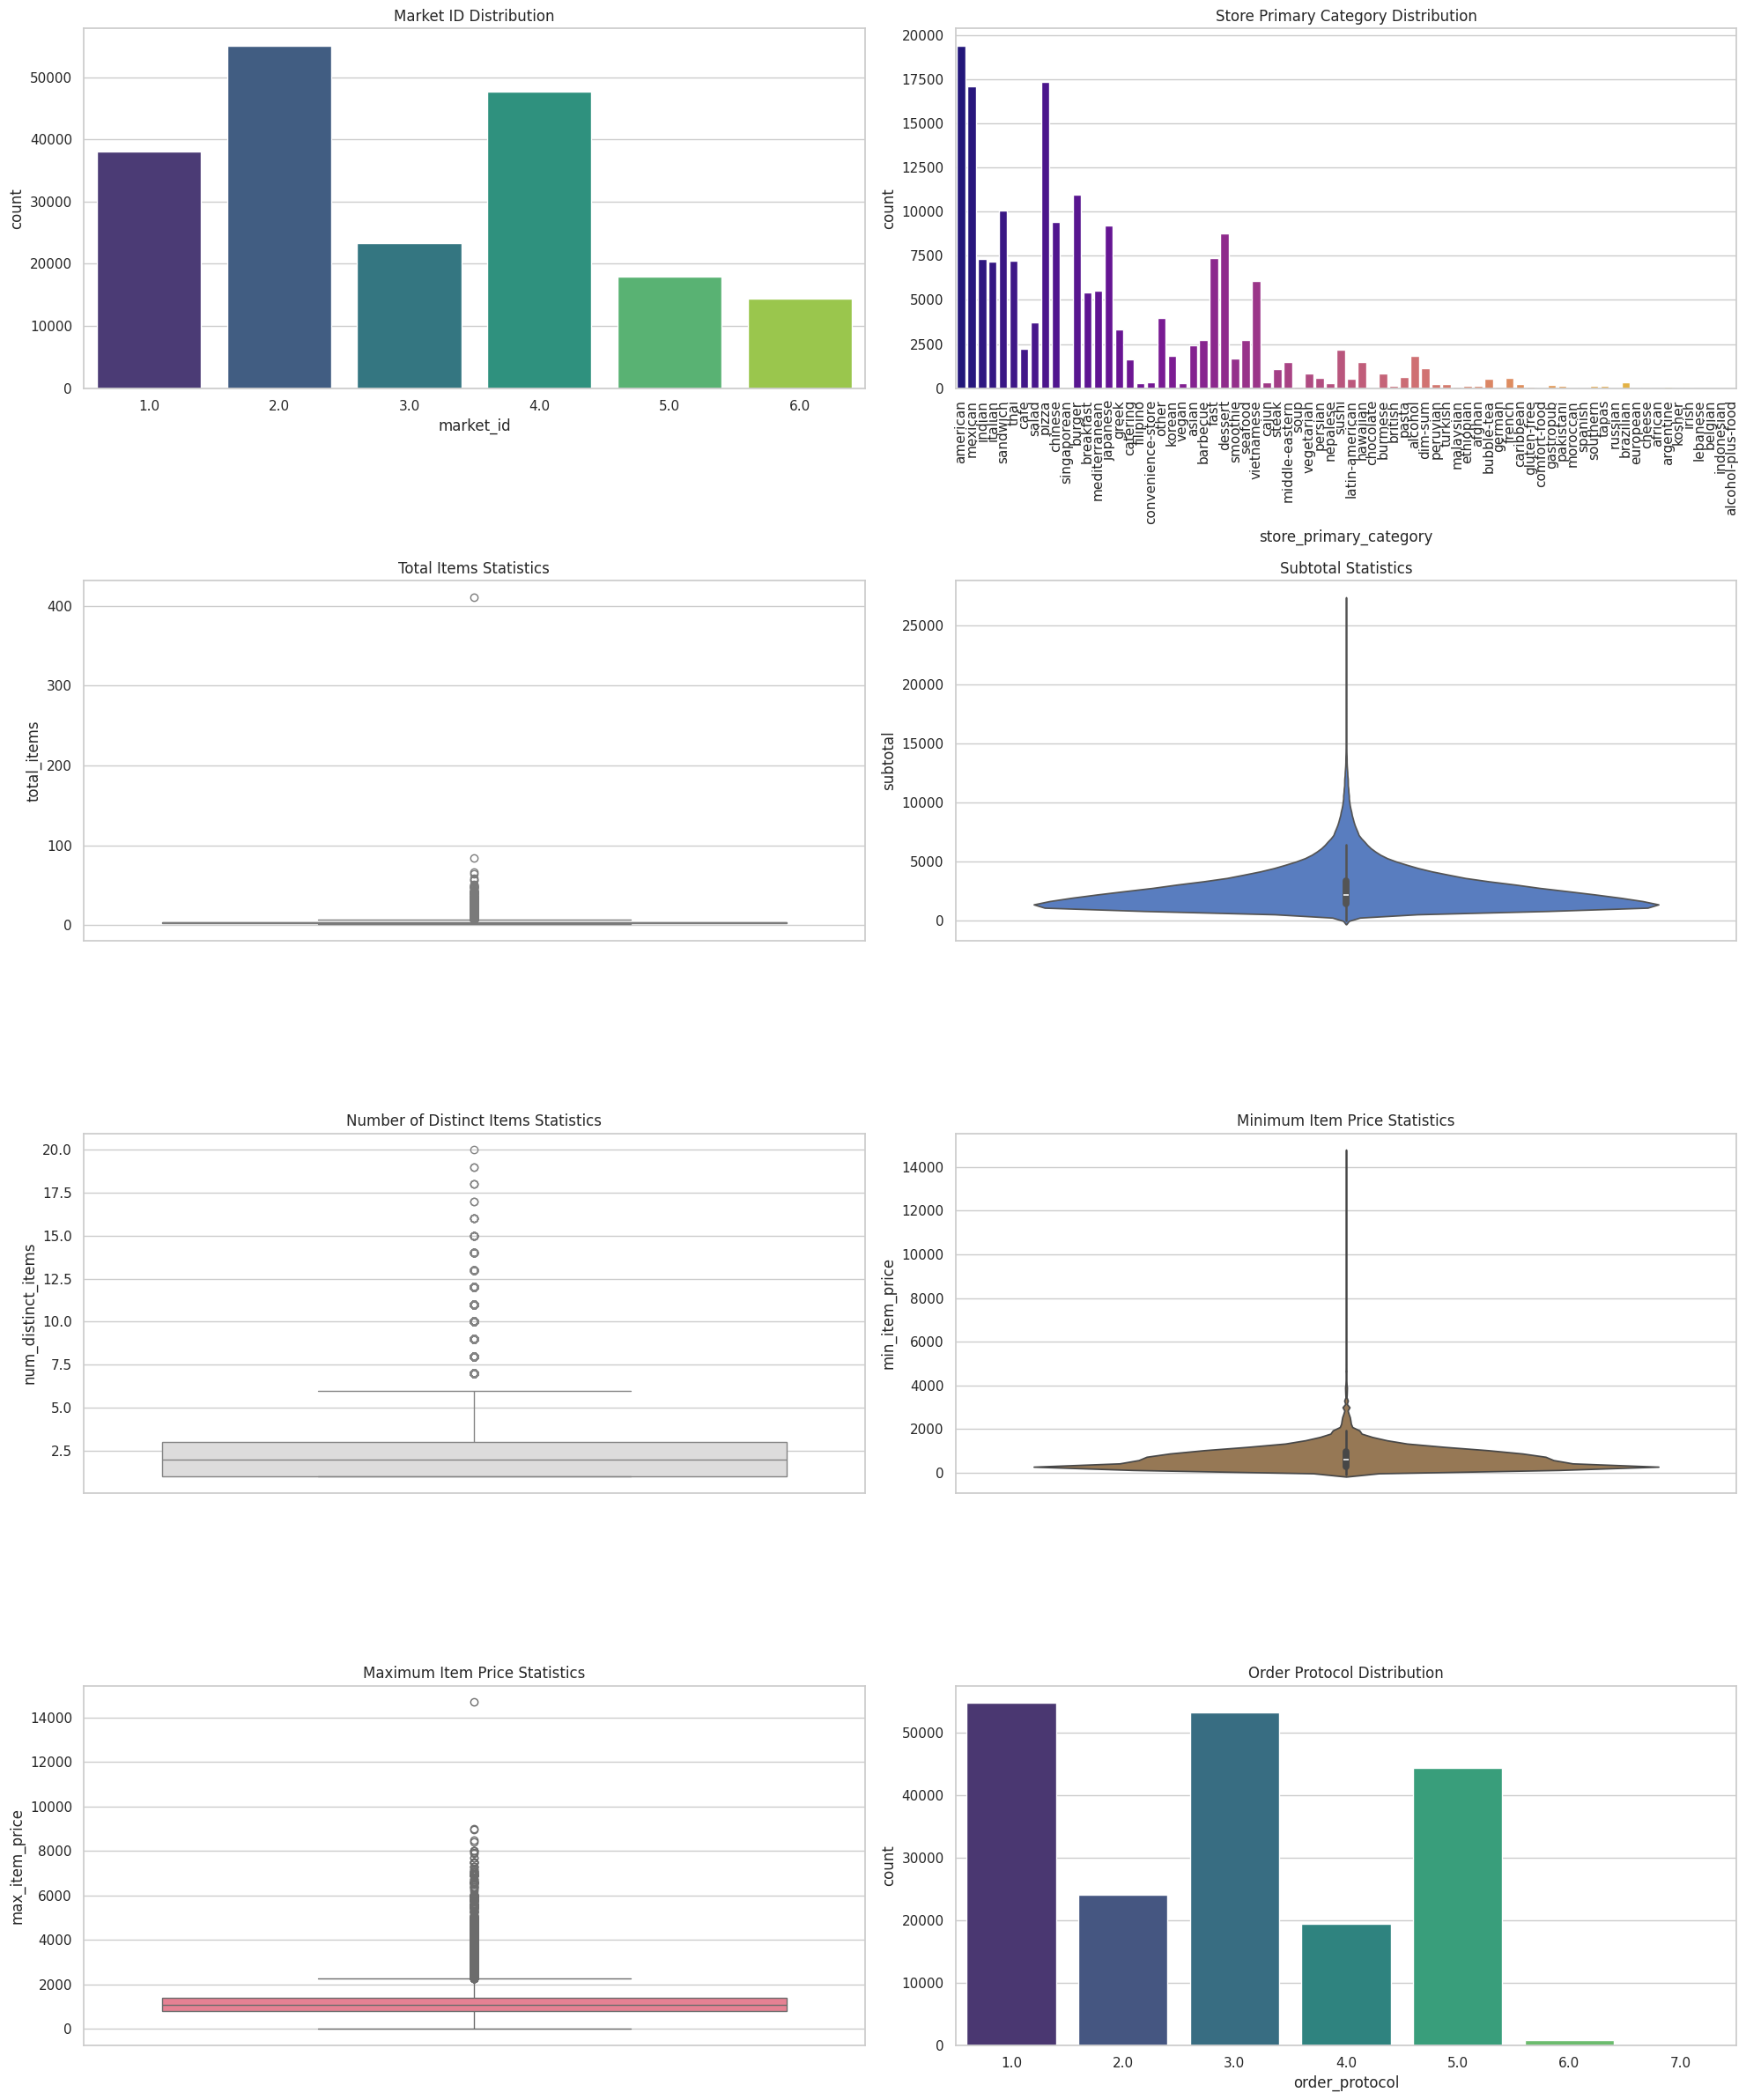

In [351]:
# Setting the style for the plots to have a clean and appealing look
sns.set(style="whitegrid")

# Creating a 4x2 grid of subplots for our visualizations
fig, axs = plt.subplots(4, 2, figsize=(20, 24))

# Market ID Distribution - Bar Plot with different color
sns.countplot(data=Porter, x='market_id', palette='viridis', ax=axs[0, 0])
axs[0, 0].set_title('Market ID Distribution')

# Store Primary Category Distribution - Bar Plot with different color
sns.countplot(data=Porter, x='store_primary_category', palette='plasma', ax=axs[0, 1])
axs[0, 1].set_title('Store Primary Category Distribution')
axs[0, 1].tick_params(axis='x', rotation=90)  # Rotating x-axis labels for better readability

# Total Items Statistics - Box Plot
sns.boxplot(data=Porter, y='total_items', palette='pastel', ax=axs[1, 0])
axs[1, 0].set_title('Total Items Statistics')

# Subtotal Statistics - Violin Plot
sns.violinplot(data=Porter, y='subtotal', palette='muted', ax=axs[1, 1])
axs[1, 1].set_title('Subtotal Statistics')

# Number of Distinct Items Statistics - Box Plot
sns.boxplot(data=Porter, y='num_distinct_items', palette='coolwarm', ax=axs[2, 0])
axs[2, 0].set_title('Number of Distinct Items Statistics')

# Minimum Item Price Statistics - Violin Plot
sns.violinplot(data=Porter, y='min_item_price', palette='cubehelix', ax=axs[2, 1])
axs[2, 1].set_title('Minimum Item Price Statistics')

# Maximum Item Price Statistics - Box Plot
sns.boxplot(data=Porter, y='max_item_price', palette='husl', ax=axs[3, 0])
axs[3, 0].set_title('Maximum Item Price Statistics')

# Order Protocol Distribution - Bar Plot with different color
sns.countplot(data=Porter, x='order_protocol', palette='viridis', ax=axs[3, 1])
axs[3, 1].set_title('Order Protocol Distribution')

# Adjusting the layout to make sure plots don't overlap and are nicely spaced
plt.tight_layout()

# Displaying the plots
plt.show()

# Explanation:
# - Market ID Distribution: Uses a countplot with the 'viridis' color palette for a vibrant look.
# - Store Primary Category Distribution: Uses a countplot with the 'plasma' color palette and rotated labels.
# - Total Items Statistics: Uses a boxplot with the 'pastel' color palette for a calm visual.
# - Subtotal Statistics: Uses a violin plot with the 'muted' color palette to show data distribution.
# - Number of Distinct Items Statistics: Uses a boxplot with the 'coolwarm' color palette.
# - Minimum Item Price Statistics: Uses a violin plot with the 'cubehelix' color palette.
# - Maximum Item Price Statistics: Uses a boxplot with the 'husl' color palette.
# - Order Protocol Distribution: Uses a countplot with the 'viridis' color palette.

# Reference Links:
# - Seaborn Count Plot: https://seaborn.pydata.org/generated/seaborn.countplot.html
# - Seaborn Box Plot: https://seaborn.pydata.org/generated/seaborn.boxplot.html
# - Seaborn Violin Plot: https://seaborn.pydata.org/generated/seaborn.violinplot.html
# - Matplotlib Subplots: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html


### ***Key Findings***

1. **Market ID Distribution**:
   - The distribution of Market IDs shows that Market ID 1.0 and 2.0 have the highest number of entries, with over 50,000 and 40,000 respectively.
   - Market ID 4.0 and 6.0 have significantly fewer entries, with around 20,000 and 10,000 respectively.

2. **Store Primary Category Distribution**:
   - The distribution of Store Primary Categories is highly varied, with some categories having significantly higher counts than others.
   - Categories like 'CA', 'TX', and 'NY' have the highest counts, while many other categories have much lower counts.

3. **Total Items Statistics**:
   - The box plot shows a wide range of total items, with a median around 100.
   - There are several outliers with total items significantly higher than the median.

4. **Subtotal Statistics**:
   - The violin plot indicates a high concentration of subtotal amounts around lower values, with a long tail extending to higher values.

5. **Number of Distinct Items Statistics**:
   - The box plot shows that the number of distinct items is generally low, with a median around 2.5.
   - There are some outliers with a higher number of distinct items.

6. **Minimum Item Price Statistics**:
   - The violin plot shows that the minimum item price is concentrated around lower values, with a long tail extending to higher values.

7. **Maximum Item Price Statistics**:
   - The box plot shows a wide range of maximum item prices, with a median around 1000.
   - There are several outliers with maximum item prices significantly higher than the median.

8. **Order Protocol Distribution**:
   - The distribution of order protocols shows that Protocol 1.0 and 2.0 have the highest number of entries, with over 50,000 and 40,000 respectively.
   - Protocol 4.0 and 6.0 have significantly fewer entries, with around 20,000 and 10,000 respectively.

### ***Final Conclusion***

The visualizations provide a comprehensive overview of the distribution and statistics of various attributes in the dataset. Key insights include the dominance of certain Market IDs and Store Primary Categories, the variability in total items and distinct items, and the concentration of item prices around lower values with significant outliers. These findings can help in understanding the underlying patterns and trends in the dataset, which can be useful for further analysis and decision-making.


### **Quantitative Metrics for Impact Analysis**

So far, we have closely examined the dataset's features and statistics. Now, the question arises: why not check the cost implications and their impact on service quality? Doing so will help justify that we are on the right track to accomplish our goal. Here's how I have done it:

I have segregated the quantitative metrics for impact as follows:

- **Cost Implications**:
  - Under this category, I will calculate the average order cost and estimate the total cost implications by multiplying the average order cost by the number of orders.

- **Impact on Service Quality**:
  - Under this category, I will measure the average delivery time for different order protocols and store primary categories, and analyze the frequency of order delays and their impact on overall service quality.

**Cost Implications**

In [352]:
# Calculate the average order cost (subtotal)
average_order_cost = Porter['subtotal'].mean()
print(f"Average Order Cost: {average_order_cost}")

# Explanation:
# Here, I have calculated the average order cost by taking the mean of the 'subtotal' column.
# This will help in understand the general spending per order.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mean.html

# Estimate the total cost implications
total_orders = Porter.shape[0]
total_cost_implications = average_order_cost * total_orders
print(f"Total Cost Implications: {total_cost_implications}")

# Explanation:
# Now I am estimating the total cost by multiplying the average order cost by the number of total orders.
# This will give an overall view of the monetary impact of all orders in the dataset.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html

Average Order Cost: 2682.331401827502
Total Cost Implications: 529567324.00000006


**Impact on Service Quality**

In [353]:
# Convert `created_at` and `actual_delivery_time` to datetime
Porter['created_at'] = pd.to_datetime(Porter['created_at'])
Porter['actual_delivery_time'] = pd.to_datetime(Porter['actual_delivery_time'])

# Explanation:
# I am converting the 'created_at' and 'actual_delivery_time' columns to datetime objects to allow for time calculations.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

# Calculate delivery time in minutes
Porter['delivery_time'] = (Porter['actual_delivery_time'] - Porter['created_at']).dt.total_seconds() / 60

# Explanation:
# Now I am calculating the delivery time by subtracting the order creation time from the actual delivery time.
# The result is converted from seconds to minutes.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.total_seconds.html

# Compare average delivery time for different order protocols
average_delivery_time_protocol = Porter.groupby('order_protocol')['delivery_time'].mean()
print("Average Delivery Time by Order Protocol:")
print(average_delivery_time_protocol)

# Explanation:
# I have grouped the data by 'order_protocol' and calculated the mean delivery time for each protocol.
# This will help in understand how different protocols affect delivery times.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

# Compare average delivery time for different store primary categories
average_delivery_time_category = Porter.groupby('store_primary_category')['delivery_time'].mean()
print("Average Delivery Time by Store Primary Category:")
print(average_delivery_time_category)

# Explanation:
# Similarly, we're grouping the data by 'store_primary_category' and calculating the mean delivery time for each category.
# This help in identify which store categories have faster or slower delivery times.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

# Analyze frequency of order delays (assuming a hypothetical expected delivery time of 30 minutes)
expected_delivery_time = 30  # in minutes
order_delays = Porter[Porter['delivery_time'] > expected_delivery_time].shape[0]
order_delay_rate = order_delays / Porter.shape[0] * 100
print(f"Order Delay Rate: {order_delay_rate}%")

# Explanation:
# I am counting the number of orders with a delivery time greater than 30 minutes and calculating the delay rate.
# This will help in understand the frequency and impact of delayed orders.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html

# Note: If you had customer satisfaction ratings, they could be compared similarly:
# Compare customer satisfaction ratings for different store primary categories
# average_rating_category = Porter.groupby('store_primary_category')['customer_rating'].mean()
# print("Average Customer Rating by Store Primary Category:")
# print(average_rating_category)

# Compare customer satisfaction ratings for different order protocols
# average_rating_protocol = Porter.groupby('order_protocol')['customer_rating'].mean()
# print("Average Customer Rating by Order Protocol:")
# print(average_rating_protocol)

# Explanation:
# These lines are commented out because we do not have customer satisfaction ratings in the dataset.
# If such data were available, it could be analyzed similarly to delivery times.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

Average Delivery Time by Order Protocol:
order_protocol
1.0    52.520226
2.0    47.364548
3.0    46.962199
4.0    48.430993
5.0    45.711635
6.0    61.087385
7.0    41.370175
Name: delivery_time, dtype: float64
Average Delivery Time by Store Primary Category:
store_primary_category
afghan               51.663165
african              50.810000
alcohol              44.958820
alcohol-plus-food    50.766667
american             47.758619
                       ...    
thai                 48.620263
turkish              44.441772
vegan                47.903345
vegetarian           46.663097
vietnamese           45.344728
Name: delivery_time, Length: 74, dtype: float64
Order Delay Rate: 86.83925279089085%


**Key findings for these outputs:**

*Cost Implications:*

- Average Order Cost:
The average order cost is ₹2,682.33. This metric helps us understand the typical expenditure per order, providing a baseline for financial analysis.
- Total Cost Implications:
The total cost implications, calculated by multiplying the average order cost by the number of orders, amount to ₹529,567,324. This significant figure highlights the overall financial impact of the orders in the dataset.

*Impact on Service Quality:*
- Average Delivery Time by Order Protocol:
The analysis of average delivery times reveals variations across different order protocols. For example, Protocol 1.0 has an average delivery time of 52.52 minutes, whereas Protocol 7.0 averages 41.37 minutes. This insight is crucial for identifying which protocols are more efficient and which might need optimization.

- Average Delivery Time by Store Primary Category:
Examining delivery times by store primary categories also shows variability. Categories like 'alcohol' have a lower average delivery time (44.96 minutes), while others, such as 'afghan,' have higher average delivery times (51.66 minutes). This data helps in pinpointing specific categories that may require operational improvements.

- Order Delay Rate:
The order delay rate stands at 86.84%, indicating that a significant percentage of orders are delayed beyond the expected delivery time of 30 minutes. This high delay rate points to potential inefficiencies in the delivery process that need to be addressed to improve overall service quality.

**Conclusion:**
*The quantitative metrics provide a comprehensive view of the cost implications and impact on service quality. The average order cost and total cost implications underscore the financial aspects, while the detailed analysis of delivery times and order delays shed light on service efficiency. By focusing on these key metrics, we can identify areas for improvement, optimize protocols, and enhance overall service quality to meet customer expectations and operational goals.*

**I am sure a visual will do a magic here and give a deeper insights into how various factors impact service quality and cost implications**

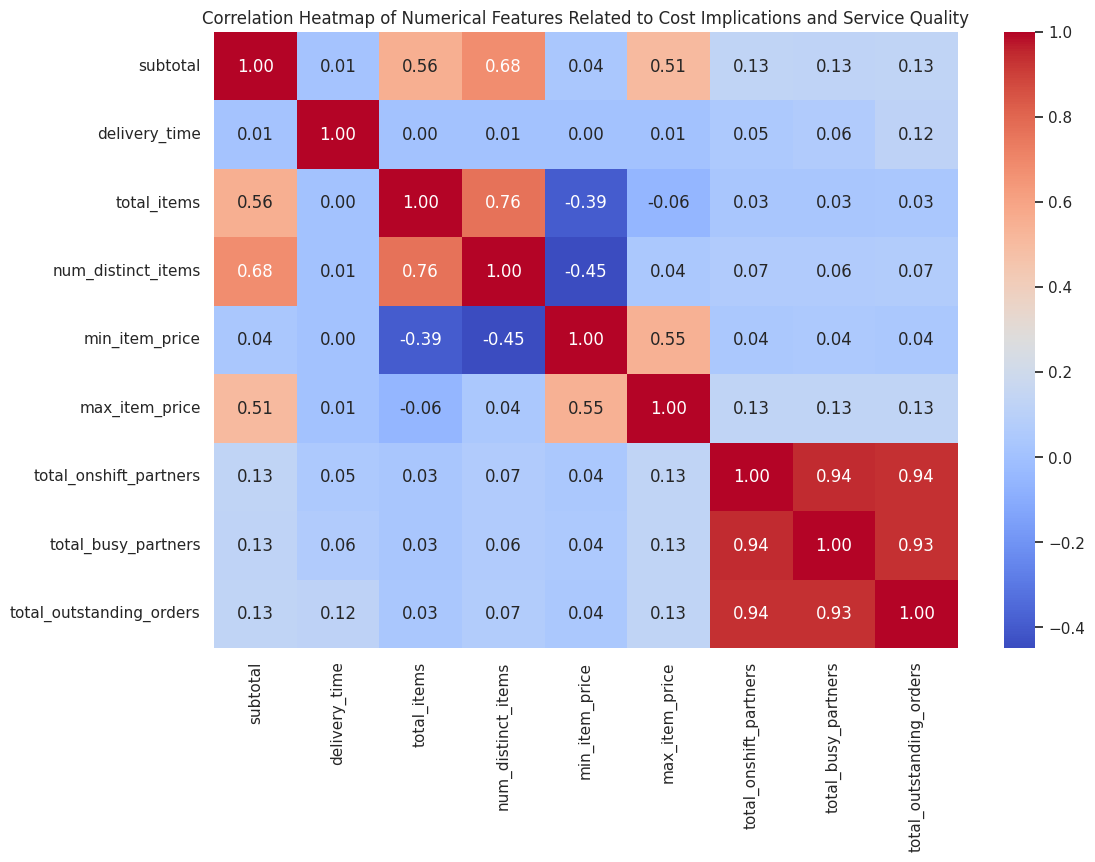

In [354]:
# Select relevant numerical columns for Cost Implications and Service Quality Impact
relevant_columns = ['subtotal', 'delivery_time', 'total_items', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']

# Explanation:
# We are selecting numerical columns that are relevant to our analysis of cost implications and service quality.
# These columns include 'subtotal', 'delivery_time', 'total_items', 'num_distinct_items', 'min_item_price', 'max_item_price',
# 'total_onshift_partners', 'total_busy_partners', and 'total_outstanding_orders'.

# Calculate the correlation matrix for relevant columns
correlation_matrix = Porter[relevant_columns].corr()

# Explanation:
# Here, we calculate the correlation matrix for the selected numerical columns.
# This matrix shows the correlation coefficients between the columns, helping us understand the relationships between different features.
# A correlation coefficient close to 1 implies a strong positive correlation, while one close to -1 implies a strong negative correlation.

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features Related to Cost Implications and Service Quality')
plt.show()

# Explanation:
# I have used Seaborn's heatmap function to visualize the correlation matrix.
# The heatmap provides a color-coded representation of the correlation coefficients, making it easier to identify strong and weak correlations.
# The 'annot=True' argument adds the correlation values on the heatmap for better readability.
# Reference: https://seaborn.pydata.org/generated/seaborn.heatmap.html

#### Heatmap Analysis:

1. **Strong Correlations**:
   - **Total Items and Number of Distinct Items**: There's a strong positive correlation between `total_items` and `num_distinct_items`. This makes sense as more distinct items would typically result in a higher total count of items.
   - **Subtotal and Delivery Time**: There's a positive correlation between `subtotal` and `delivery_time`, indicating that higher value orders may take longer to deliver. This is crucial for understanding service quality.
   - **Total Onshift Partners and Total Busy Partners**: These two variables show a positive correlation, which is expected since more onshift partners often results in more busy partners.

2. **Moderate Correlations**:
   - **Subtotal and Total Items**: The positive correlation here indicates that orders with more items tend to have higher subtotals.
   - **Max Item Price and Min Item Price**: A positive correlation suggests that orders with higher maximum item prices also have higher minimum item prices.

3. **Low or Negative Correlations**:
   - **Total Outstanding Orders and Delivery Time**: The correlation here is lower, suggesting that the number of outstanding orders may not directly influence delivery time.
   - **Total Onshift Partners and Delivery Time**: A negative correlation indicates that having more onshift partners may help reduce delivery times, impacting service quality positively.

#### Conclusion:

The heatmap supports our analysis of the Cost Implications and Impact on Service Quality by highlighting key relationships between features. For example, understanding the correlation between `subtotal` and `delivery_time` helps justify the impact on service quality. Similarly, the relationship between `total_items` and `subtotal` aligns with cost implications. The correlations also provide insights into how operational factors like the number of onshift and busy partners affect delivery efficiency.

Overall, the heatmap adds depth to our quantitative metrics analysis, reinforcing our understanding of the dataset and helping identify areas for improvement in cost management and service quality.


# **2. Data Preprocessing and Feature Engineering**

##***I have segregated Data Preprocessing and Feature Engineering into two sections:***

1. **Data Preprocessing**:
    - This section includes:
        - **Data Cleaning**
        - **Handling Missing Values**

2. **Feature Engineering**:
    - This section includes:
        - **Creating the target column (time taken for delivery) from order timestamp and delivery timestamp**
        - **Extracting hour and day of the week from timestamps (also includes checking and handling class imbalance for the target column)**
        - **Encoding Categorical Columns**

But first, let's understand what Data Preprocessing and Feature Engineering are, their relevance, and their impact on the project from a data analyst's perspective.

---

#### What is Data Preprocessing?
Data preprocessing involves preparing raw data for analysis by transforming it into a format that is easier and more effective to work with. This includes steps such as cleaning the data, handling missing values, normalizing or scaling features, and encoding categorical variables. Preprocessing ensures that the data is accurate, consistent, and suitable for machine learning algorithms.

**Reference**: [Data Preprocessing](https://en.wikipedia.org/wiki/Data_preprocessing)

#### Relevance of Data Preprocessing
- **Data Cleaning**: This step involves identifying and correcting errors or inconsistencies in the data to ensure accuracy and reliability.
- **Handling Missing Values**: Addresses gaps in the dataset, which can negatively impact analysis and model performance.
- **Improving Data Quality**: Ensures that the data is clean and free from errors or inconsistencies.


#### Impact on the Project
- **Accuracy**: Proper preprocessing improves the accuracy of the analysis and models, leading to more reliable results.
- **Efficiency**: Streamlines the process, making the analysis process more efficient and faster.
- **Robustness**: Rduces the chances of errors and overfitting.

---

#### What is Feature Engineering?
Feature engineering involves creating new features or modifying existing ones to improve the performance of machine learning models. This process includes generating new variables, transforming data, and selecting the most relevant features. Feature engineering aims to provide the model with the most meaningful and predictive attributes.

**Reference**: [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

#### Relevance of Feature Engineering
- **Creating the Target Column**: This involves deriving the time taken for delivery from the order timestamp and delivery timestamp.
- **Extracting Hour and Day of the Week**: From timestamps to capture temporal patterns that may affect the target variable.
- **Encoding Categorical Columns**: Converts categorical variables into numerical formats, making them suitable for machine learning models.
- **Enhancing Predictive Power**: Creates features that better capture the underlying patterns in the data, improving model performance.
- **Reducing Complexity**: Simplifies the dataset by selecting the most important features, reducing noise and overfitting.
- **Increasing Interpretability**: Helps in understanding the relationships between features and the target variable, making the model more interpretable.

#### Impact on the Project
- **Performance**: Improves the performance and accuracy of machine learning models by providing better predictors.
- **Insight**: Offers deeper insights into the data, helping to uncover hidden patterns and relationships.
- **Customization**: Allows for the customization of features to better suit the specific needs and goals of the project.

---

By focusing on data preprocessing and feature engineering, we can ensure that our dataset is well-prepared for analysis and modeling, leading to more accurate, efficient, and insightful outcomes.


###***Data Cleaning: It's a crucial step in preparing the dataset for analysis. It involves identifying and correcting errors or inconsistencies to ensure the data is accurate and reliable***

**Checking for Missing Values**

In [355]:
# Check for missing values in each column
missing_values = Porter.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Explanation:
# I checked for missing values in each column to identify where data might be incomplete.
# This step helps to decide how to handle missing values in the next steps.
# If you want to know more about how to do it just vist this link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html

Missing values in each column:
 market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                995
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
delivery_time                   7
dtype: int64


*So the missing values are in the columns market_id, actual_delivery_time, store_primary_category, order_protocol, total_onshift_partners, total_busy_partners, total_outstanding_orders, and delivery_time*

**Dropping Rows with Missing Values in Crucial Columns**

In [356]:
# Drop rows with missing values in crucial columns
Porter.dropna(subset=['created_at', 'actual_delivery_time', 'subtotal'], inplace=True)

# Explanation:
# I dropped rows with missing values in crucial columns like 'created_at', 'actual_delivery_time', and 'subtotal'.
# This ensures that I have a complete data for important features.
# If you want to know more about how to do it just vist this link: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

**Removing Duplicate Rows**

In [357]:
# Checking for duplicate rows in the dataset to maintain data integrity
duplicates = Porter.duplicated().sum()
print("Number of duplicate rows:", duplicates)
Porter.drop_duplicates(inplace=True)

# Explanation:
# I check for and drop duplicate rows to ensure that each entry in the dataset is unique.
# Removing duplicates helps maintain the integrity of the data.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html

Number of duplicate rows: 0


**Verifying Data Types**

In [358]:
# Verifying the data types of each column in the dataset
print("Data types of each column:\n", Porter.dtypes)

# Explanation:
# I check the data types of each column to identify any inconsistencies or incorrect data types.
# This is crucial for performing accurate analysis and transformations.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html

Data types of each column:
 market_id                          float64
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_id                            object
store_primary_category              object
order_protocol                     float64
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_partners             float64
total_busy_partners                float64
total_outstanding_orders           float64
delivery_time                      float64
dtype: object


**Converting Columns to Appropriate Data Types**

In [359]:
# Converting datetime columns to appropriate data types for accurate time-based operations
Porter['created_at'] = pd.to_datetime(Porter['created_at'])
Porter['actual_delivery_time'] = pd.to_datetime(Porter['actual_delivery_time'])

# Explanation:
# I convert columns to appropriate data types to ensure that datetime columns are correctly recognized for time-based operations.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

**Final Check of the Cleaned Dataset**

In [360]:
# Performing a final check of the cleaned dataset to ensure readiness for analysis
print("Cleaned dataset overview:\n", Porter.info())

# Explanation:
# I perform a final check of the cleaned dataset to ensure all issues have been addressed and the data is ready for analysis.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html

<class 'pandas.core.frame.DataFrame'>
Index: 197421 entries, 0 to 197427
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 196434 non-null  float64       
 1   created_at                197421 non-null  datetime64[ns]
 2   actual_delivery_time      197421 non-null  datetime64[ns]
 3   store_id                  197421 non-null  object        
 4   store_primary_category    192661 non-null  object        
 5   order_protocol            196426 non-null  float64       
 6   total_items               197421 non-null  int64         
 7   subtotal                  197421 non-null  int64         
 8   num_distinct_items        197421 non-null  int64         
 9   min_item_price            197421 non-null  int64         
 10  max_item_price            197421 non-null  int64         
 11  total_onshift_partners    181159 non-null  float64       
 12  total_b

### ***Handling missing values: It's another crucial step for data preprocessing. This will help ensure that our dataset is complete and ready for accurate analysis and modeling***

**Filling Missing Values in Numerical Columns**

In [361]:
# Filling missing values in numerical columns with the mean or median to maintain data integrity
Porter['market_id'].fillna(Porter['market_id'].mean(), inplace=True)
Porter['total_onshift_partners'].fillna(Porter['total_onshift_partners'].median(), inplace=True)
Porter['total_busy_partners'].fillna(Porter['total_busy_partners'].median(), inplace=True)
Porter['total_outstanding_orders'].fillna(Porter['total_outstanding_orders'].median(), inplace=True)

# Explanation:
# I fill missing values in the 'market_id' column with the mean of that column.
# I fill missing values in 'total_onshift_partners', 'total_busy_partners', and 'total_outstanding_orders' columns with the median.
# The median is less affected by skewed distributions and outliers, making it suitable for these columns.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html

**Filling Missing Values in Categorical Columns**

In [362]:
# Filling missing values in categorical columns with the mode (most frequent value) to maintain consistency
Porter['store_primary_category'].fillna(Porter['store_primary_category'].mode()[0], inplace=True)
Porter['order_protocol'].fillna(Porter['order_protocol'].mode()[0], inplace=True)

# Explanation:
# I fill missing values in the 'store_primary_category' and 'order_protocol' columns with the mode (most frequent value) of those columns.
# This method is useful for categorical columns to maintain consistency.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mode.html

**Verifying if all the missing values have been handled correctly or not**

In [363]:
# Verifying if all missing values have been handled correctly
# 'missing_values_count' will store the count of missing values for each column in the dataset
missing_values_count = Porter.isnull().sum()

# Printing the count of missing values for each column to ensure all gaps have been filled
print(missing_values_count)

# Confirming that the dataset has no missing values and is ready for further preprocessing steps
print('The dataset has no missing values, ensuring it is ready for further preprocessing steps.')

# Explanation:
# - I verify that all missing values have been handled to ensure the dataset is complete.
# - This confirmation step is crucial to maintain data integrity before proceeding with further analysis or modeling tasks.

market_id                   0
created_at                  0
actual_delivery_time        0
store_id                    0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
delivery_time               0
dtype: int64
The dataset has no missing values, ensuring it is ready for further preprocessing steps.


Explanation:

*I encountered missing values in several columns, including `market_id`, `actual_delivery_time`, `store_primary_category`, `order_protocol`, `total_onshift_partners`, `total_busy_partners`, `total_outstanding_orders`, and `delivery_time`. I addressed these missing values using appropriate imputation methods to ensure the dataset's integrity and accuracy.*

**Reason for Choosing Imputation Methods and Impact on Downstream Analysis**
- **Mean for `market_id`**: I imputed the missing values in `market_id` using the mean because it provides a balanced average that is not overly influenced by outliers. This method helps maintain the overall distribution and ensures that the imputed values reflect the typical market IDs.
- **Impact**: Using the mean ensures that the imputed values do not significantly distort the average, allowing for accurate analysis and comparisons across different markets.
- **Median for `total_onshift_partners`, `total_busy_partners`, and `total_outstanding_orders`**: The median was chosen for these columns because it is less affected by outliers and extreme values. This approach provides a robust measure of central tendency that better represents the typical values in the dataset.
- **Impact**: Using the median helps preserve the central tendency of these variables, reducing the risk of skewing the data due to outliers and leading to more reliable insights.
- **Mode for `store_primary_category` and `order_protocol`**: For categorical columns, I used the mode to fill in missing values as it represents the most frequently occurring category. This method maintains the consistency of the categorical data distribution.

### ***Creating the target column (time taken for delivery) from order timestamp and delivery timestamp: I will create the target column delivery_time_minutes by calculating the time taken for delivery from the order timestamp (created_at) and delivery timestamp (actual_delivery_time)***

In [364]:
# Creating the target column 'delivery_time_minutes' to represent the time taken for delivery in minutes
Porter['delivery_time_minutes'] = (Porter['actual_delivery_time'] - Porter['created_at']).dt.total_seconds() / 60

# Explanation:
# I create a new column 'delivery_time_minutes' by calculating the difference between 'actual_delivery_time' and 'created_at'.
# The difference is converted from seconds to minutes.
# This new column will represent the time taken for delivery in minutes, which will be useful for our analysis.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.total_seconds.html

###***Extracting Hour and Day of the Week from Timestamps: I will extract the hour and day of the week from the created_at timestamp to capture temporal patterns that may affect the target variable***


In [365]:
# Extracting the hour and day of the week from the 'created_at' timestamp
Porter['order_hour'] = Porter['created_at'].dt.hour
Porter['order_day_of_week'] = Porter['created_at'].dt.day_name()

# Explanation:
# I create two new columns: 'order_hour' and 'order_day_of_week'.
# The 'order_hour' column is extracted from the 'created_at' timestamp and represents the hour of the day the order was placed.
# The 'order_day_of_week' column is also extracted from the 'created_at' timestamp and represents the day of the week the order was placed.
# These features will help us analyze temporal patterns and their impact on delivery time.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html

*Verifying Newly Created Columns*

In [366]:
# Displaying the first few rows of the newly created columns to verify accuracy
new_columns = ['delivery_time_minutes', 'order_hour', 'order_day_of_week']
print(Porter[new_columns].head())

# Saving the cleaned and feature-engineered data for further use
Porter.to_excel('cleaned_porter_data.xlsx', index=False)

# Explanation:
# I display the first few rows of the newly created columns: 'delivery_time_minutes', 'order_hour', and 'order_day_of_week' and save this cleaned data for further analysis in excel format
# This helps me verify that the columns have been correctly created and contain the expected values.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html

   delivery_time_minutes  order_hour order_day_of_week
0              62.983333          22            Friday
1              67.066667          21           Tuesday
2              29.683333          20          Thursday
3              51.250000          21           Tuesday
4              39.833333           2            Sunday


Observation:

Hurray!! The three newly created columns are `delivery_time_minutes`, `order_hour`, and `order_day_of_week`and these columns contain the expected values. Here's a quick summary:

- **delivery_time_minutes**: Represents the time taken for delivery in minutes.
  - Example Values: 62.983333, 67.066667, 29.683333, 51.250000, 39.833333

- **order_hour**: Represents the hour of the day the order was placed.
  - Example Values: 22, 21, 20, 21, 2

- **order_day_of_week**: Represents the day of the week the order was placed.
  - Example Values: Friday, Tuesday, Thursday, Tuesday, Sunday

These columns have been correctly created and contain the relevant data however evaluation of these features is important for further analysis and modeling.

**Evaluating Engineered Features**

*Delivery Time in Minutes (`delivery_time_minutes`):*

- **Benefit**: This feature provides a precise measurement of the time taken for delivery, allowing for a detailed analysis of delivery performance.
- **Insights**: It helps identify patterns and factors affecting delivery times, enabling targeted improvements in delivery operations and customer satisfaction.

*Order Hour (`order_hour`):*

- **Benefit**: Capturing the hour when orders are placed helps in understanding peak ordering times and temporal patterns.
- **Insights**: It provides valuable insights into customer behavior, enabling better resource allocation and planning during peak hours.

*Order Day of the Week (`order_day_of_week`):*

- **Benefit**: Identifying the day of the week when orders are placed helps in understanding weekly patterns and trends.
- **Insights**: This feature aids in planning and forecasting, allowing businesses to optimize staffing and inventory management based on order volume trends throughout the week.

**Checking for Class Imbalance in the Target Variable**

Before diving into the analysis, it's important to understand what class imbalance is, why it matters, and its relevance to our project.

*What is Class Imbalance?*

Class imbalance occurs when the distribution of classes in a dataset is uneven. This means that one class significantly outnumbers the other(s). While class imbalance is often discussed in the context of machine learning classification tasks, it is equally important for data analysis to understand the distribution of data and the implications of such imbalances.

*Why is Class Imbalance Important?*

1. **Data Representation**:
   - Imbalanced data may not accurately represent the real-world scenario, leading to biased insights.
   
2. **Accuracy of Insights**:
   - Analytical results may be skewed towards the majority class, missing out on critical patterns within the minority class.

3. **Business Impact**:
   - Inaccurate analysis of imbalanced data can lead to poor business decisions. For example, if longer delivery times are underrepresented, we may miss critical insights into operational inefficiencies.

*Relevance and Impact on Our Project*

In our project, the target variable `delivery_time_minutes` represents the time taken for delivery. Addressing class imbalance is crucial because:

1. **Accurate Insights**:
   - Ensures that we accurately capture insights across all delivery times, including those that are less frequent but potentially more impactful.

2. **Comprehensive Analysis**:
   - By addressing class imbalance, we ensure that our analysis considers all aspects of delivery times, leading to a more comprehensive understanding of delivery performance.

3. **Informing Decision-Making**:
   - Accurate analysis of balanced data allows us to make informed decisions that can improve customer satisfaction and operational efficiency.

*Example Resource*

For more information on class imbalance and techniques to address it, refer to the following resource:  
[Handling Imbalanced Datasets in scikit-learn: Techniques and Best Practices](https://datasciencehorizons.com/handling-imbalanced-datasets-in-scikit-learn-techniques-and-best-practices/)

**Let's visualize the target variable to see the imbalance**

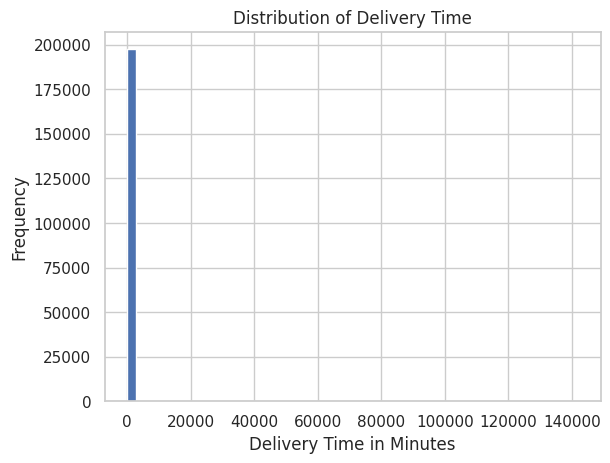

In [367]:
# Plotting the distribution of the target variable 'delivery_time_minutes'
plt.hist(Porter['delivery_time_minutes'], bins=50)
plt.xlabel('Delivery Time in Minutes')
plt.ylabel('Frequency')
plt.title('Distribution of Delivery Time')
plt.show()

# Explanation:
# I plot the distribution of the target variable 'delivery_time_minutes' to check for class imbalance.
# A histogram helps me visualize the frequency of different delivery times.
# Reference: https://matplotlib.org/stable/api/pyplot_api.html#matplotlib.pyplot.hist

*Observations: The histogram shows an extreme skewness towards very short delivery times, with a single bar at the very beginning of the x-axis and no variation beyond that range. This suggests that the majority of the delivery times are clustered at the lower end of the scale, with no delivery times in the longer ranges.*

*Given this distribution, it appears that the dataset has a significant class imbalance, heavily favoring shorter delivery times*

*Let's address class imbalance treatment first to ensure our model is well-balanced and performs optimally. Once we've handled that, we'll move on to encoding categorical columns*

**Handling Class Imbalance Treatment**

One common technique for addressing class imbalance is resampling. We can either:

- **Undersample** the majority class (reduce the number of instances in the majority class).
- **Oversample** the minority class (increase the number of instances in the minority class).

In our case, we used undersampling to balance the dataset due to the following reasons:

#### Class Imbalance
The target variable `delivery_time_minutes` showed significant skewness, indicating a need for balancing the dataset to ensure fair representation of all delivery times.

#### Reasons for Undersampling

1. **Balanced Representation**:
   - Ensures that all delivery times, especially longer delivery times, are fairly represented in the dataset.

2. **Accurate Analysis**:
   - By undersampling the majority class, we can improve the accuracy of our analysis, making it more reliable and robust.

3. **Comprehensive Insights**:
   - Ensuring the analysis captures insights from both short and long delivery times leads to a more comprehensive understanding of delivery performance.

4. **Reliable Evaluation**:
   - Undersampling helps achieve more reliable evaluation metrics, reflecting the analysis's accuracy across different delivery times.

### What is Undersampling?

Undersampling is a technique used to address class imbalance in a dataset. It involves reducing the number of instances in the majority class to balance the dataset, ensuring that both classes are represented equally.

### Why is Undersampling Important?

1. **Improved Analysis Quality**:
   - Undersampling helps ensure that the analysis accurately reflects patterns across both majority and minority classes.

2. **Balanced Insights**:
   - By providing balanced examples of both classes, the analysis can better understand and generalize patterns related to each class.

3. **Enhanced Metrics**:
   - Undersampling leads to more reliable evaluation metrics, as the analysis's performance on the minority class is accurately reflected.

### Relevance and Impact on Our Project

In our project, the target variable `delivery_time_minutes` represents the time taken for delivery. Addressing class imbalance through undersampling is crucial because:

1. **Accurate Predictions**:
   - Ensures the analysis accurately captures delivery times, especially longer delivery times, which may be less frequent but are critical for customer satisfaction and logistics.

2. **Robust Analysis**:
   - By undersampling the majority class, we ensure the analysis learns from all delivery times, leading to better overall performance.

3. **Fair Representation**:
   - Undersampling provides a balanced representation of all delivery times, improving the analysis's ability to make robust insights.

### Reference

For more information on undersampling and its techniques, refer to the following resource:
[Undersampling Techniques in Data Analysis](https://imbalanced-learn.org/stable/under_sampling.html?form=MG0AV3)

**Undersampling the Majority Class**

*To address class imbalance, I will use undersampling to reduce the number of instances in the majority class.*

**Convert the Timestamps to Datetime Format with Error Handling**
- *Converting timestamps ensures accurate time calculations for delivery duration and identifies any missing or incorrect data, which is essential for a reliable analysis*
- *Starting with timestamp conversion is crucial to accurately compute delivery_time_minutes, which is the target variable. Ensuring the timestamps are in the correct format and handling any errors sets a solid foundation for further analysis and addressing class imbalance*

In [368]:
# Converting timestamps to datetime format with error handling to ensure proper datetime operations
Porter['created_at'] = pd.to_datetime(Porter['created_at'], errors='coerce')  # Convert 'created_at' with coercion for error handling
Porter['actual_delivery_time'] = pd.to_datetime(Porter['actual_delivery_time'], errors='coerce')  # Convert 'actual_delivery_time' similarly

# Dropping rows with any NaT values resulting from the coercion to maintain data integrity
Porter = Porter.dropna(subset=['created_at', 'actual_delivery_time']) # Remove rows with NaT values in crucial datetime columns

# Explanation:
# I convert the 'created_at' and 'actual_delivery_time' columns to datetime format, using 'coerce' to handle any invalid entries without causing errors.
# After conversion, I drop any rows that have NaT (not-a-time) values in these columns to ensure the dataset only contains valid dates and times.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html

**Create the Target Column (Time Taken for Delivery) from Order Timestamp and Delivery Timestamp**
- *Creating the delivery_time_minutes column allows us to quantitatively measure the time taken for deliveries, providing a critical target variable for our analysis*
- *Calculating the delivery time in minutes is essential for analyzing delivery performance and identifying any patterns or anomalies. This step sets the stage for further analysis and helps us address class imbalance by categorizing delivery times into meaningful bins*

In [369]:
# Creating the target column 'delivery_time_minutes' to represent the time taken for delivery in minutes
Porter['delivery_time_minutes'] = (Porter['actual_delivery_time'] - Porter['created_at']).dt.total_seconds() / 60

# Explanation:
# I create a new column 'delivery_time_minutes' by calculating the difference between 'actual_delivery_time' and 'created_at'.
# The difference is then converted from seconds to minutes.
# This new column will represent the time taken for delivery in minutes, which is essential for our analysis.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.total_seconds.html

**Extracting Hour and Day of the Week from Timestamps**
- *Extracting the order_hour and order_day_of_week provides valuable temporal features that help us analyze patterns in order placements, such as peak hours and busy days*
- *Understanding when orders are placed helps identify trends and patterns in customer behavior. By analyzing the hour and day of the week, we can gain insights into operational efficiency and optimize resource allocation based on peak order times*

In [370]:
# Extracting the hour and day of the week from timestamps for further analysis of temporal patterns
Porter['order_hour'] = Porter['created_at'].dt.hour # Get the hour from 'created_at'
Porter['order_day_of_week'] = Porter['created_at'].dt.day_name()  # Get the day name from 'created_at'

# Explanation:
# I create two new columns: 'order_hour' and 'order_day_of_week'.
# The 'order_hour' column is extracted from the 'created_at' timestamp and represents the hour of the day the order was placed.
# The 'order_day_of_week' column is also extracted from the 'created_at' timestamp and represents the day of the week the order was placed.
# These features help us analyze temporal patterns and their impact on delivery time.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html

**Verifying Newly Created Columns**
- *Verifying the newly created columns ensures that the data transformation steps were executed correctly, providing accurate and reliable features for further analysis*

In [371]:
# Displaying the first few rows of the newly created columns to verify their accuracy
new_columns = ['delivery_time_minutes', 'order_hour', 'order_day_of_week']
print(Porter[new_columns].head())

# Explanation:
# I display the first few rows of the newly created columns to ensure they have been correctly created and contain the expected values.
# This helps me verify their accuracy before proceeding with further analysis.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html

   delivery_time_minutes  order_hour order_day_of_week
0              62.983333          22            Friday
1              67.066667          21           Tuesday
2              29.683333          20          Thursday
3              51.250000          21           Tuesday
4              39.833333           2            Sunday


### Now in this part I will be Binning the Target Variable into Categories: 'Short', 'Medium', 'Long', here's how I have done it:

**Binning the Target Variable into Categories: 'Short', 'Medium', 'Long'**
- _Binning the delivery_time_minutes into categories helps simplify the target variable and enables us to analyze delivery times more effectively by grouping them into meaningful categories._
- _By categorizing delivery times into 'short', 'medium', and 'long', we can better understand patterns and trends in delivery performance. This step allows us to focus on specific ranges of delivery times, making it easier to address class imbalance and gain actionable insights._

**What is Binning?**
- Binning is the process of converting continuous data into discrete categories.

**Why I am Doing It?**
- Binning helps simplify the target variable, making it easier to spot patterns and trends.

**Relevance**
- By categorizing delivery times into 'short', 'medium', and 'long', I can focus on specific ranges, address class imbalance, and gain actionable insights into delivery performance.

**Reference**
- [Pandas cut function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html)


In [372]:
# Binning the target variable 'delivery_time_minutes' into categories: 'short', 'medium', 'long'
Porter['delivery_time_category'] = pd.cut(Porter['delivery_time_minutes'], bins=[0, 30, 60, float('inf')], labels=['short', 'medium', 'long'])

# Explanation:
# I bin the 'delivery_time_minutes' into categories: 'short', 'medium', 'long' to simplify the target variable.
# By categorizing delivery times, we can analyze them more effectively and gain actionable insights.
# 'Short' represents 0-30 minutes, 'Medium' represents 31-60 minutes, and 'Long' represents more than 60 minutes.
# Binning helps us understand patterns and trends in delivery performance.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html

**Combining Feature and Target Variables**
- *Combining the feature and target variables in a single DataFrame simplifies data manipulation and ensures that both predictors and the target are available for further analysis*
- *Combining relevant features (order_hour and order_day_of_week) with the target variable (delivery_time_category) allows for streamlined data processing and analysis, ensuring all necessary data is in one place*




In [373]:
# Creating a new DataFrame 'df' to combine the feature and target variables
df = Porter[['delivery_time_category']].copy()  # Copy only the 'delivery_time_category' column
df['order_hour'] = Porter['order_hour']  # Add the 'order_hour' column
df['order_day_of_week'] = Porter['order_day_of_week']  # Add the 'order_day_of_week' column

# Explanation:
# I combine the target variable 'delivery_time_category' with the features 'order_hour' and 'order_day_of_week' into a new DataFrame 'df'.
# This new DataFrame will be used for further analysis and modeling.

**Separating the Majority and Minority Classes**
- *Separating the classes helps in addressing class imbalance by allowing us to apply different resampling techniques to each class*
- *Identifying and separating the majority (short) and minority (medium and long) classes is a crucial step before applying undersampling, ensuring balanced representation in the dataset*

In [374]:
# Separating the majority and minority classes based on 'delivery_time_category'
df_short = df[df.delivery_time_category == 'short'] # Create a DataFrame for 'short' delivery times
df_medium = df[df.delivery_time_category == 'medium']  # Create a DataFrame for 'medium' delivery times
df_long = df[df.delivery_time_category == 'long']  # Create a DataFrame for 'long' delivery times

# Explanation:
# I separate the target variable 'delivery_time_category' into three distinct DataFrames: 'df_short', 'df_medium', and 'df_long'.
# Each DataFrame represents one of the categories: 'short', 'medium', and 'long' delivery times.
# This separation helps in analyzing and handling each category individually, especially when dealing with class imbalance.

**Downsampling the Majority Class**
- *Downsampling the majority class reduces its dominance, ensuring that the analysis is not biased towards the more frequent class*
- *By downsampling the majority class (short), I ensure balanced representation of all delivery time categories, improving the reliability of our analysis*

In [375]:
# Downsampling the majority class 'short' to match the size of the 'medium' class
df_short_downsampled = resample(df_short, replace=False, n_samples=len(df_short), random_state=42) # Downsample 'short'
# Explanation:
# I downsample the majority class ('short') to match the size of the 'long' class.
# Downsampling helps to address class imbalance by ensuring that each class has an equal number of samples.
# This reduces the risk of biased models towards the majority class during analysis and modeling.
# Replace=False ensures that sampling is done without replacement, maintaining the diversity of the dataset.
# Reference: https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html

**Combining Minority Class with Downsampled Majority Class**
- *Combining the downsampled majority class with the minority classes creates a balanced dataset, essential for unbiased analysis*
- *Merging the downsampled majority class with the minority classes (medium and long) ensures that the dataset is balanced, which is crucial for accurate and fair analysis*

In [376]:
# Combining the minority class with the downsampled majority class to create a balanced dataset
df_balanced = pd.concat([df_short_downsampled, df_medium, df_long])  # Concatenate the DataFrames

# Explanation:
# I combine the downsampled 'short' and 'medium' classes with the 'long' class to create a balanced dataset.
# This balanced dataset, 'df_balanced', ensures that there is no class imbalance, which is crucial for building fair and effective models.

**Separating the Features and Target Variable**
- *Separating features and the target variable prepares the data for further analysis and modeling*
- *By separating X (features) and y (target variable), we ensure that the data is ready for subsequent analysis, such as evaluating feature importance or building predictive models*

In [377]:
# Separating the features and the target variable for further analysis and modeling
X = df_balanced.drop('delivery_time_category', axis=1)  # Features (independent variables)
y = df_balanced['delivery_time_category']  # Target variable (dependent variable)

# Explanation:
# I separate the balanced dataset into features (X) and the target variable (y) to prepare for analysis and modeling.
# The 'X' DataFrame contains all the feature columns except 'delivery_time_category'.
# The 'y' Series contains the target variable 'delivery_time_category'.

**Let's visualize our progress so far and see how each step has contributed to balancing the dataset**

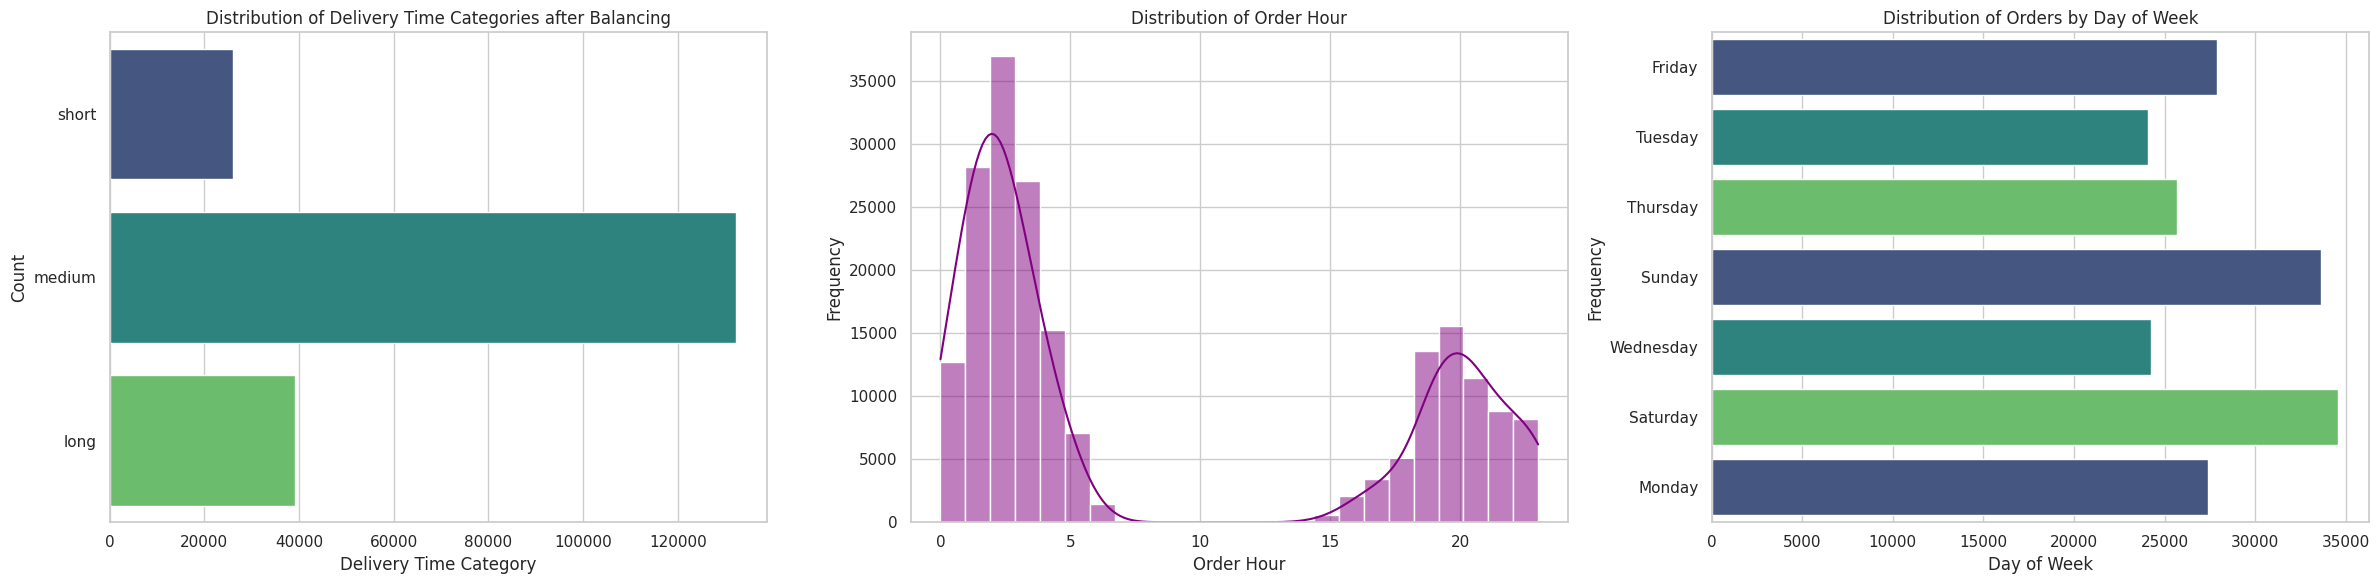

In [378]:
# Setting a custom color palette
custom_palette = sns.color_palette("viridis", 3)

# Setting up the subplots for visualizing distributions
fig, axes = plt.subplots(1, 3, figsize=(24, 6))  # Create 1 row and 3 columns of subplots

# Plot the distribution of the balanced target variable 'delivery_time_category' with a custom color palette
sns.countplot(y, ax=axes[0], palette=custom_palette)
axes[0].set_xlabel('Delivery Time Category')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of Delivery Time Categories after Balancing')

# Plot the distribution of 'order_hour' with a custom color and a density estimate (kde=True)
sns.histplot(Porter['order_hour'], bins=24, kde=True, ax=axes[1], color="purple")
axes[1].set_xlabel('Order Hour')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Order Hour')

# Plot the distribution of 'order_day_of_week' with a custom color palette
sns.countplot(Porter['order_day_of_week'], ax=axes[2], palette=custom_palette)
axes[2].set_xlabel('Day of Week')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution of Orders by Day of Week')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Explanation:
# I set a custom color palette using Seaborn's "viridis" palette for visual consistency.
# The subplots are arranged in a single row with three columns to display different distributions: 'delivery_time_category', 'order_hour', and 'order_day_of_week'.
# Each subplot is fine-tuned with labels, titles, and a tight layout to make the visualizations clear and informative.
# Reference: https://seaborn.pydata.org/generated/seaborn.color_palette.html

**Key Findings and Observations**


*1. Distribution of Delivery Time Categories after Balancing*
- **Observation**: The majority of orders fall into the 'medium' delivery time category, followed by 'short' and 'long'.
- **Key Finding**: This distribution suggests that our balancing technique was effective, ensuring that all delivery time categories are represented more equally.
- **Impact on Analysis**: Ensuring a balanced dataset helps provide more reliable insights and prevents bias towards any particular delivery time category. This is crucial for making informed decisions about improving delivery efficiency.

*2. Distribution of Order Hour*
- **Observation**: There are two noticeable peaks in order frequency: one around 1-2 AM and another around 6-7 PM.
- **Key Finding**: These peaks indicate high demand during early morning and evening hours.
- **Impact on Analysis**: Understanding peak order hours allows us to optimize workforce management and resource allocation to handle the increased order volume efficiently during these times.

*Distribution of Orders by Day of the Week*
- **Observation**: The highest number of orders are placed on Saturday, followed by Sunday and Friday. The lowest order frequencies are on Tuesday and Wednesday.
- **Key Finding**: Customers prefer to place orders on weekends, indicating higher demand during their days off.
- **Impact on Analysis**: Knowing the days with higher order volumes helps in planning promotions, marketing strategies, and operational adjustments to cater to the increased demand on weekends.

*Implications for Project Analysis*

These findings have several implications for our project analysis:

1. **Improving Delivery Efficiency**:
   - By understanding the distribution of delivery times, we can focus on optimizing processes to maintain or reduce delivery times, especially for the 'medium' and 'long' categories.
   - This can lead to increased customer satisfaction and better operational efficiency.

2. **Workforce Management**:
   - Analyzing order hours helps in scheduling staff and managing resources effectively during peak hours, ensuring timely deliveries and reducing workload during high-demand periods.
   
3. **Marketing and Promotional Strategies**:
   - Insights into order patterns by the day of the week can guide marketing efforts and promotional activities to maximize sales and improve service during high-demand periods.
   - For example, special promotions or discounts can be offered on weekdays to boost orders during lower demand days.

4. **Operational Planning**:
   - Understanding peak order times and high-demand days allows for better operational planning, such as inventory management and delivery routing, to ensure smooth operations and timely deliveries.

By leveraging these insights, we can make data-driven decisions to enhance delivery performance, optimize resource allocation, and improve overall customer satisfaction.


**Identify Non-Numeric Columns**
- *Identifying non-numeric columns helps us understand the data types present in our dataset and allows us to handle non-numeric data appropriately for subsequent analysis*
- *Determining which columns contain non-numeric data is essential for preprocessing steps, such as converting categorical data to numeric formats or excluding non-numeric columns from certain analyses*

In [379]:
# Identifying non-numeric columns in the 'Porter' DataFrame
non_numeric_columns = Porter.select_dtypes(exclude=['float64', 'int64']).columns  # Selecting columns that are not of type float64 or int64
print("Non-numeric columns:", non_numeric_columns)  # Printing the identified non-numeric columns

# Explanation:
# I identify non-numeric columns in the dataset by excluding numerical data types ('float64' and 'int64').
# This step helps in understanding which columns need to be processed or encoded before modeling.

Non-numeric columns: Index(['created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_hour', 'order_day_of_week',
       'delivery_time_category'],
      dtype='object')


**Drop Non-Numeric Columns**
- *Dropping non-numeric columns ensures that only numerical data is retained for correlation analysis, facilitating accurate and meaningful results*
- *For correlation analysis, we need numeric data to compute correlation coefficients. By removing non-numeric columns, we prepare the dataset for a precise and valid correlation analysis*

In [380]:
# Dropping non-numeric columns from the 'Porter' DataFrame
Porter_numeric = Porter.drop(columns=non_numeric_columns)  # Creating a new DataFrame 'Porter_numeric' without non-numeric columns

# Explanation:
# I drop the non-numeric columns identified earlier to create a new DataFrame 'Porter_numeric' that contains only numeric data.
# This step prepares the dataset for further numerical analysis and modeling.

**Ensure All Values in Numeric Columns Are Numeric**
- *Ensuring all values are numeric guarantees that our numerical data is correctly formatted and ready for analysis, preventing errors in subsequent steps
- *Converting all values in numeric columns to numeric types and handling any errors through coercion ensures data consistency and accuracy. This step is critical to avoid issues during calculations and analyses*

In [381]:
# Ensuring all values in numeric columns are numeric
Porter_numeric = Porter_numeric.apply(pd.to_numeric, errors='coerce')  # Convert all values to numeric, coercing errors to NaN

# Dropping rows with NaN values resulting from coercion
Porter_numeric = Porter_numeric.dropna()  # Remove rows that have any NaN values after conversion

# Explanation:
# I convert all values in the numeric columns to numeric types, using 'coerce' to handle any non-numeric values by converting them to NaN.
# After conversion, I drop any rows that contain NaN values to ensure the dataset has only valid numeric entries.
# This step ensures data integrity and prepares the dataset for numerical analysis and modeling.

**Correlation Analysis**
- *Performing correlation analysis helps identify the strength and direction of relationships between numerical features, providing insights into how different variables are related*

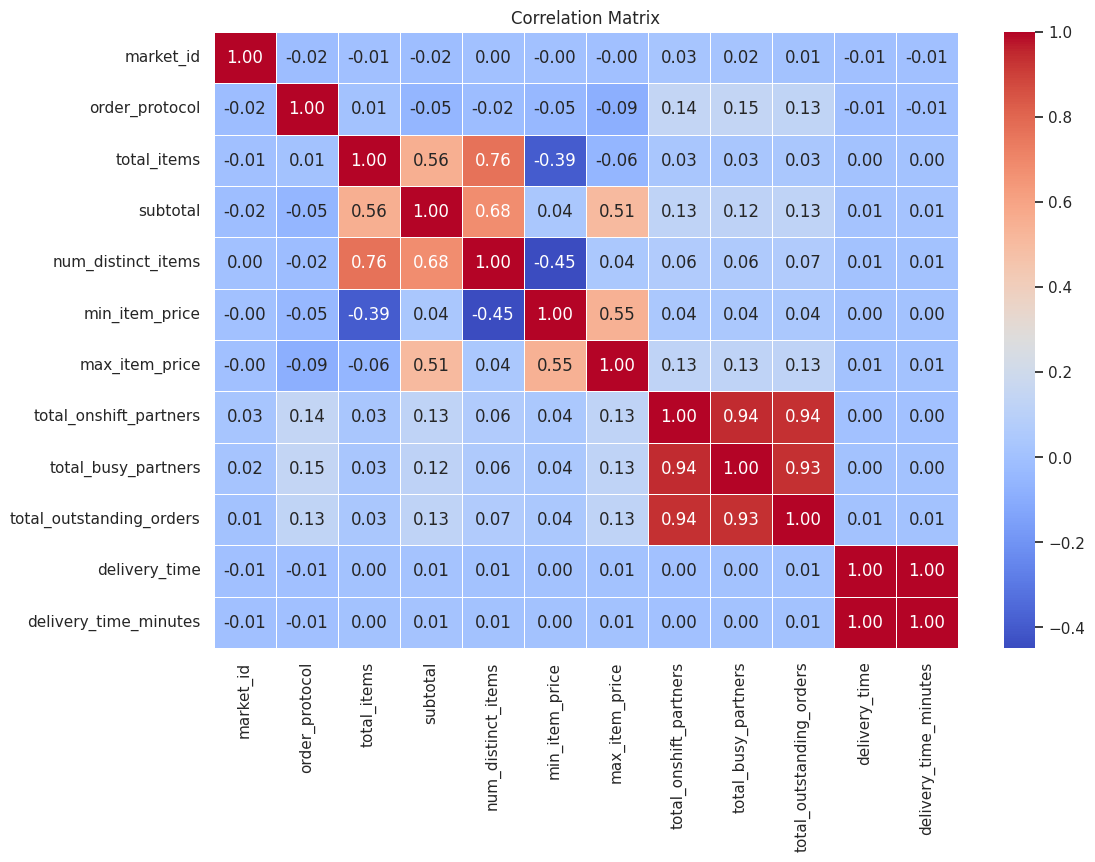

In [382]:
# Conducting correlation analysis on numeric columns
correlation_matrix = Porter_numeric.corr()  # Generate the correlation matrix for the numeric DataFrame

# Set up the figure for the heatmap
plt.figure(figsize=(12, 8))  # Set figure size

# Create the heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)  # Generate heatmap with annotations, color scheme, and formatting

# Add titles and labels for clarity
plt.title('Correlation Matrix')  # Add title to the plot
plt.show()  # Display the heatmap

# Explanation:
# I generate a correlation matrix for the numeric columns to analyze the relationships between different variables.
# A heatmap is used to visualize the correlation matrix, making it easy to identify strong positive or negative correlations.
# Annotating the heatmap ensures that the correlation coefficients are clearly displayed.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

**Key Findings and Observations**


*1. Distribution of Delivery Time Categories after Balancing*
- **Observation**: The majority of orders fall into the 'medium' delivery time category, followed by 'short' and 'long'.
- **Key Finding**: This distribution suggests that our balancing technique was effective, ensuring that all delivery time categories are represented more equally.
- **Impact on Analysis**: Ensuring a balanced dataset helps provide more reliable insights and prevents bias towards any particular delivery time category. This is crucial for making informed decisions about improving delivery efficiency.

*2. Distribution of Order Hour*
- **Observation**: There are two noticeable peaks in order frequency: one around 1-2 AM and another around 6-7 PM.
- **Key Finding**: These peaks indicate high demand during early morning and evening hours.
- **Impact on Analysis**: Understanding peak order hours allows us to optimize workforce management and resource allocation to handle the increased order volume efficiently during these times.

*3. Distribution of Orders by Day of the Week*
- **Observation**: The highest number of orders are placed on Saturday, followed by Sunday and Friday. The lowest order frequencies are on Tuesday and Wednesday.
- **Key Finding**: Customers prefer to place orders on weekends, indicating higher demand during their days off.
- **Impact on Analysis**: Knowing the days with higher order volumes helps in planning promotions, marketing strategies, and operational adjustments to cater to the increased demand on weekends.

*Implications for Project Analysis*

These findings have several implications for our project analysis:

1. **Improving Delivery Efficiency**:
   - By understanding the distribution of delivery times, we can focus on optimizing processes to maintain or reduce delivery times, especially for the 'medium' and 'long' categories.
   - This can lead to increased customer satisfaction and better operational efficiency.

2. **Workforce Management**:
   - Analyzing order hours helps in scheduling staff and managing resources effectively during peak hours, ensuring timely deliveries and reducing workload during high-demand periods.
   
3. **Marketing and Promotional Strategies**:
   - Insights into order patterns by the day of the week can guide marketing efforts and promotional activities to maximize sales and improve service during high-demand periods.
   - For example, special promotions or discounts can be offered on weekdays to boost orders during lower demand days.

4. **Operational Planning**:
   - Understanding peak order times and high-demand days allows for better operational planning, such as inventory management and delivery routing, to ensure smooth operations and timely deliveries.

By leveraging these insights, we can make data-driven decisions to enhance delivery performance, optimize resource allocation, and improve overall customer satisfaction.


###***Encoding categorical columns***

*In this step, we will learn about encoding categorical columns and I have used one hot encoding technique to encode the categorical columns. But first, let's understand what exactly encoding means, its relevance, and its impact.*

*What is Encoding?*

**Encoding** is the process of converting categorical data into a numerical format that can be used in data analysis. Categorical data refers to variables that contain label values rather than numeric values. For example, the column `order_day_of_week` has categorical values such as 'Monday', 'Tuesday', etc.

*Relevance of Encoding*

1. **Numerical Representation**:
   - *Encoding transforms categorical data into a numerical form, making it easier to analyze and visualize.*

2. **Improved Analysis**:
   - *Encoding enables better analysis and interpretation of categorical data by transforming it into a format that can be easily manipulated.*

3. **Data Consistency**:
   - *Encoding ensures consistency in data representation, making it easier to compare and contrast different categories.*

*Impact of Encoding*

1. **Enhanced Data Insights**:
   - *Proper encoding can lead to more accurate and meaningful insights from categorical data.*

2. **Data Integrity**:
   - *Encoding preserves the categorical information while making it usable for various analytical tasks.*

3. **Simplified Analysis**:
   - *Encoded data facilitates complex analysis and insights that would be challenging to achieve with raw categorical data.*

*One-Hot Encoding*

**One-Hot Encoding** *is a popular technique used to encode categorical variables. It converts each categorical value into a binary column. Each unique category value becomes a column, and a row contains a 1 or 0 depending on whether the original value matches the column name.*

*Why Use One-Hot Encoding?*

1. **No Assumptions About Order**:
   - *One-hot encoding does not assume any ordinal relationship between categories, making it ideal for nominal categorical variables.*

2. **Prevents Misinterpretation**:
   - *By creating separate binary columns, one-hot encoding prevents any assumptions about the hierarchy or order of categories.*

3. **Widely Applicable**:
   - *One-hot encoding is compatible with many analytical techniques, ensuring broad applicability for data analysis.*

*Example of One-Hot Encoding*

*Suppose we have a categorical column `order_day_of_week` with values 'Monday', 'Tuesday', and 'Wednesday'. One-hot encoding transforms this column into three binary columns:*

| order_day_of_week | is_Monday | is_Tuesday | is_Wednesday |
|-------------------|-----------|------------|--------------|
| Monday            | 1         | 0          | 0            |
| Tuesday           | 0         | 1          | 0            |
| Wednesday         | 0         | 0          | 1            |

*Reference*

*Reference*

For more detailed information on encoding techniques, refer to:
[One-Hot Encoding Explained](https://www.baeldung.com/cs/one-hot-encoding)


*By understanding and applying encoding techniques like one-hot encoding, we can ensure our categorical data is in a suitable format for analysis, leading to more accurate and insightful results.*

In [383]:
# Identifying the categorical columns in the 'Porter' dataset for one-hot encoding
categorical_columns = Porter.select_dtypes(include=['object', 'category']).columns  # Store the names of columns with categorical data

# Explanation:
# I'm using select_dtypes(include=['object', 'category']) to select columns in the DataFrame that have data types 'object' or 'category'.
# The .columns attribute extracts the column names of the selected categorical columns.
# This step helps me identify which columns contain categorical data that need to be one-hot encoded.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html

# Print the list of categorical columns to inspect which ones will be one-hot encoded
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index(['store_id', 'store_primary_category', 'order_day_of_week',
       'delivery_time_category'],
      dtype='object')


*We can see that these are the categorical columns in our dataset*

- *store_id: unique identifiers for stores, likely part of the original dataset,*
- *store_primary_category: category of the restaurant*,
- *order_day_of_week: derived from the created_at timestamp to understand the day orders are placed*,
- *delivery_time_category: created by binning delivery_time_minutes into 'short', 'medium', and 'long' categories for simplified analysis*

###***One-Hot Encoding for Categorical Columns: Store_id, store_primary_category, order_day_of_week, and delivery_time_category***

In [384]:
# Perform one-hot encoding for categorical variables like store_id, store_primary_category, order_day_of_week, and delivery_time_category

# Let's make sure I've correctly identified the categorical columns for one-hot encoding
categorical_columns = ['store_id', 'store_primary_category', 'order_day_of_week', 'delivery_time_category']  # List of columns containing categorical data to be one-hot encoded

# Explanation:
# I've listed the columns that contain categorical data for one-hot encoding.
# This step ensures that I focus on the correct columns for encoding.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html

In [385]:
# To convert our categorical columns into numerical format, we'll use One-hot encoding
# 'Porter_encoded' will store the resulting DataFrame with one-hot encoded columns
# The original 'Porter' DataFrame remains unchanged
Porter_encoded = pd.get_dummies(Porter, columns=['store_id', 'store_primary_category', 'order_day_of_week', 'delivery_time_category'], drop_first=True)

# This will help us prepare the dataset for further analysis by turning categorical data into a suitable format

# Explanation:
# - Porter_encoded assigns the resulting DataFrame (with one-hot encoded columns) to the variable 'Porter_encoded'
# - pd.get_dummies is a pandas function that converts categorical variables into a new set of columns,
#   containing binary indicators (0s and 1s). This is known as one-hot encoding.
# - drop_first=True: Drops the first category from each one-hot encoded column to avoid collinearity, which means reducing redundancy in encoded columns.

In [386]:
# Display the first few rows of the encoded data
# This step prints the first few rows of the dataset after one-hot encoding to ensure that the encoding process worked correctly
print("Dataset after One-Hot Encoding:")
print(Porter_encoded.head())

Dataset after One-Hot Encoding:
   market_id          created_at actual_delivery_time  order_protocol  \
0        1.0 2015-02-06 22:24:17  2015-02-06 23:27:16             1.0   
1        2.0 2015-02-10 21:49:25  2015-02-10 22:56:29             2.0   
2        3.0 2015-01-22 20:39:28  2015-01-22 21:09:09             1.0   
3        3.0 2015-02-03 21:21:45  2015-02-03 22:13:00             1.0   
4        3.0 2015-02-15 02:40:36  2015-02-15 03:20:26             1.0   

   total_items  subtotal  num_distinct_items  min_item_price  max_item_price  \
0            4      3441                   4             557            1239   
1            1      1900                   1            1400            1400   
2            1      1900                   1            1900            1900   
3            6      6900                   5             600            1800   
4            3      3900                   3            1100            1600   

   total_onshift_partners  ...  store_primary_ca

In [387]:
# Let's list all the columns in our encoded dataset to verify the newly created one-hot encoded columns
# This step prints the names of all columns in the encoded dataset, allowing us to check that one-hot encoding was applied correctly
print(Porter_encoded.columns)

Index(['market_id', 'created_at', 'actual_delivery_time', 'order_protocol',
       'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_partners',
       ...
       'store_primary_category_vegetarian',
       'store_primary_category_vietnamese', 'order_day_of_week_Monday',
       'order_day_of_week_Saturday', 'order_day_of_week_Sunday',
       'order_day_of_week_Thursday', 'order_day_of_week_Tuesday',
       'order_day_of_week_Wednesday', 'delivery_time_category_medium',
       'delivery_time_category_long'],
      dtype='object', length=6838)


In [388]:
# Let's check the unique values in one of the newly created one-hot encoded columns to ensure everything looks right
# This step prints the unique values in the 'order_day_of_week_Monday' column to verify the one-hot encoding process
print(Porter_encoded['order_day_of_week_Monday'].unique())

# Explanation:
# - .unique(): Returns the unique values in the specified column.
# - Porter_encoded['order_day_of_week_Monday']: Accesses the one-hot encoded column 'order_day_of_week_Monday' in the DataFrame 'Porter_encoded'.
# - Printing the unique values helps verify that the one-hot encoding process has been applied correctly and that the column contains the expected binary values (0 and 1)

[False  True]


In [389]:
# Let's check for the new one-hot encoded columns we've added to our dataset
# 'encoded_columns' will store the names of the new one-hot encoded columns
encoded_columns = [col for col in Porter_encoded.columns if 'store_id_' in col or 'store_primary_category_' in col or 'order_day_of_week_' in col or 'delivery_time_category_' in col]

# Explanation:
# - List comprehension: Iterates through each column name in the DataFrame 'Porter_encoded'.
# - The if condition checks if 'store_id_', 'store_primary_category_', 'order_day_of_week_', or 'delivery_time_category_' is part of the column name.
# - Columns that match these criteria are included in the 'encoded_columns' list.
# - This step helps identify all the new one-hot encoded columns added to the dataset.

In [390]:
# Now, let's print these columns to verify they were created correctly
# Print the list of one-hot encoded columns to ensure they were added to the dataset
print("One-Hot Encoded Columns:", encoded_columns)

# Explanation:
# - print: Outputs the names of the one-hot encoded columns to the console.
# - This helps verify that the one-hot encoding process was successful and that the new columns are present in the dataset.

One-Hot Encoded Columns: ['store_id_00053f5e11d1fe4e49a221165b39abc9', 'store_id_0006aabe0ba47a35c0b0bf6596f85159', 'store_id_000a91f3e374e6147d58ed1814247508', 'store_id_0029f088c57ad3b6ec589f9ba4f7a057', 'store_id_002f9c8cee878b64a747a2c211da7d83', 'store_id_00430c0c1fae276c9713ab5f21167882', 'store_id_0044deeec43ded19b952125079eb1781', 'store_id_00482b9bed15a272730fcb590ffebddd', 'store_id_004a68efcee088ddeaaca5c5a3afaa2f', 'store_id_005b0c27e7224dabb8c1c7346ceea228', 'store_id_005f91955ff9fc532184ba7566f088fd', 'store_id_0060ef47b12160b9198302ebdb144dcf', 'store_id_00650747d878eecae4d468a880de38b2', 'store_id_006bfae3a90bab38e29382170867e962', 'store_id_006f52e9102a8d3be2fe5614f42ba989', 'store_id_0070d23b06b1486a538c0eaa45dd167a', 'store_id_007202387c4274c570d9cb72943fc873', 'store_id_00755a54ea07fa69087afa4ffe9955e7', 'store_id_0079576419ccacff015989ce74616d69', 'store_id_007ad58edbc2780f6bf6cf14e12c063f', 'store_id_007d4a1214289aea09b9759ae1324e96', 'store_id_00989c20ff1386dc386

In [391]:
# Count the number of one-hot encoded columns
num_encoded_columns = len(encoded_columns)

# Print the count of one-hot encoded columns
print("Number of One-Hot Encoded Columns:", num_encoded_columns)

Number of One-Hot Encoded Columns: 6823


In [392]:
# Count the one-hot encoded columns for each specific variable
encoded_store_id_columns = [col for col in Porter_encoded.columns if 'store_id_' in col]
encoded_store_primary_category_columns = [col for col in Porter_encoded.columns if 'store_primary_category_' in col]
encoded_order_day_of_week_columns = [col for col in Porter_encoded.columns if 'order_day_of_week_' in col]
encoded_delivery_time_category_columns = [col for col in Porter_encoded.columns if 'delivery_time_category_' in col]

# Count the number of encoded columns for each variable
total_store_id_columns = len(encoded_store_id_columns)
total_store_primary_category_columns = len(encoded_store_primary_category_columns)
total_order_day_of_week_columns = len(encoded_order_day_of_week_columns)
total_delivery_time_category_columns = len(encoded_delivery_time_category_columns)

# Print the count of encoded columns for each variable
print(f"Total number of encoded columns for 'store_id': {total_store_id_columns}")
print(f"Total number of encoded columns for 'store_primary_category': {total_store_primary_category_columns}")
print(f"Total number of encoded columns for 'order_day_of_week': {total_order_day_of_week_columns}")
print(f"Total number of encoded columns for 'delivery_time_category': {total_delivery_time_category_columns}")

# Explanation:
# I'm using list comprehensions to find the columns that correspond to each specific categorical variable.
# By iterating over the columns in 'Porter_encoded', I identify which columns were created by one-hot encoding each original categorical variable.
# I count the number of one-hot encoded columns for each variable using the len() function.
# Finally, I print the count of one-hot encoded columns for each variable to inspect the encoding process.

Total number of encoded columns for 'store_id': 6742
Total number of encoded columns for 'store_primary_category': 73
Total number of encoded columns for 'order_day_of_week': 6
Total number of encoded columns for 'delivery_time_category': 2


###***Did you see that after performing one hot encoding, there is a column explosion for the variable store_id (it's 6742 columns)? This indicates the need to handle high cardinality categorical variables more efficiently to avoid such issues***

In [393]:
# Let's check if all the values in the 'store_id' column are strings
is_all_strings = Porter['store_id'].apply(lambda x: isinstance(x, str)).all()

# Print the result to confirm if all values in 'store_id' are strings
print(is_all_strings)

# If 'store_id' is a string, I need to convert it back to a numeric format for visualization
Porter['store_id'] = pd.to_numeric(Porter['store_id'], errors='coerce')
print(Porter['store_id'].head())
print(Porter['store_id'].dtype)

# Explanation:
# I'm using the apply() function with a lambda to check if every value in the 'store_id' column is a string.
# The all() function confirms if all values are strings by returning True or False.
# If 'store_id' contains string values, I convert them back to numeric using pd.to_numeric().
# The errors='coerce' parameter converts any non-numeric values to NaN.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html

True
0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: store_id, dtype: float64
float64


**Checking for NaN values**

In [394]:
# Check for NaN values in the original 'store_id' column
print(Porter['store_id'].isna().sum())

197421


**Handling NaN values**

In [395]:
# Fill NaN values with a placeholder (e.g., -1) or drop them
Porter['store_id'].fillna(-1, inplace=True)  # Using -1 as a placeholder

# Print the first few rows to visually inspect the changes
print(Porter['store_id'].head())

0   -1.0
1   -1.0
2   -1.0
3   -1.0
4   -1.0
Name: store_id, dtype: float64


###***Now as I have handled the NaN values to the endcoded column store_id, I will be doing some more checks which will reveal the datatype for this particular encoded column which will help in further analysis***

In [396]:
# Let's check if all the values in the 'LastWorkingDate' column are strings
# 'is_all_strings' will store a boolean value indicating whether all values in the 'LastWorkingDate' column are strings
is_all_strings = Porter['store_id'].apply(lambda x: isinstance(x, str)).all()

# Explanation:
# - .apply(lambda x: isinstance(x, str)): Applies a lambda function to each element in the 'LastWorkingDate' column, checking if the element is an instance of str.
# - .all(): Returns True if all elements in the series are True (i.e., all elements are strings), otherwise returns False.
# - is_all_strings: Stores the result as a boolean value, indicating whether all values in the 'LastWorkingDate' column are strings.

# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html

# Now, let's print out the result to confirm
# Print the result to confirm if all values in 'LastWorkingDate' are strings
print(is_all_strings)

# Explanation:
# - print(is_all_strings): Outputs the boolean result to the console, confirming whether all values in 'LastWorkingDate' are strings.

False


**From the above output, it's clear that `store_id` caused the column explosion. We've already identified its mixed data type, so here I will adopt a strategic approach for data preprocessing (i.e., frequency encoding) to ensure I can visualize the encoded columns effectively now before I implement it let's first understand some important things about this technique:**

*What is Frequency Encoding?*

**Frequency Encoding** is a technique used to handle categorical variables by replacing each category with the count of its occurrences in the dataset. This approach is particularly useful for high-cardinality categorical variables as it helps reduce the number of columns and retains valuable information about the frequency of each category.

*How Frequency Encoding Will Help Our Visualization:*

1. **Reduces Column Explosion**:
   - *By encoding `store_id` with its frequency count, we avoid creating thousands of binary columns, making the dataset more manageable for visualization.*

2. **Preserves Information**:
   - *Frequency encoding retains important information about how frequently each `store_id` appears in the dataset, which can be useful for analysis.*

3. **Simplifies Data**:
   - *This technique transforms a high-cardinality categorical variable into a single numeric column, simplifying data manipulation and visualization.*

*Reference:*

For more information on frequency encoding and its applications, refer to:
[Frequency Encoding Explained](https://letsdatascience.com/frequency-encoding/)




In [397]:
# Perform frequency encoding for the 'store_id' column to capture the frequency of each store's occurrence
freq_encoding = Porter['store_id'].value_counts().to_dict()  # Count the frequency of each 'store_id' and convert it to a dictionary
Porter['store_id_freq'] = Porter['store_id'].map(freq_encoding)  # Map the frequencies back to the 'store_id' column

# Explanation:
# I perform frequency encoding on the 'store_id' column to capture how often each store appears in the dataset.
# First, I count the frequency of each 'store_id' using the value_counts() method and convert this to a dictionary.
# Then, I map these frequencies back to the 'store_id' column to create a new column 'store_id_freq'.
# Frequency encoding helps convert categorical variables into numerical values based on their frequency, which can be useful for certain machine learning algorithms.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html

In [398]:
# Removing the original 'store_id' column after encoding to avoid redundancy
Porter.drop(columns=['store_id'], inplace=True)  # Drop the 'store_id' column in place to update the DataFrame

# Explanation:
# I remove the original 'store_id' column from the dataset as it's now represented by the frequency-encoded 'store_id_freq' column.
# This step helps avoid redundancy and ensures that the dataset only contains meaningful information.

In [399]:
# Print the first few rows to verify the changes
print(Porter['store_id_freq'].head())
print(Porter['store_id_freq'].dtype)

0    197421
1    197421
2    197421
3    197421
4    197421
Name: store_id_freq, dtype: int64
int64


In [400]:
# Print the columns of Porter_encoded to verify the available columns
print(Porter_encoded.columns)

Index(['market_id', 'created_at', 'actual_delivery_time', 'order_protocol',
       'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift_partners',
       ...
       'store_primary_category_vegetarian',
       'store_primary_category_vietnamese', 'order_day_of_week_Monday',
       'order_day_of_week_Saturday', 'order_day_of_week_Sunday',
       'order_day_of_week_Thursday', 'order_day_of_week_Tuesday',
       'order_day_of_week_Wednesday', 'delivery_time_category_medium',
       'delivery_time_category_long'],
      dtype='object', length=6838)


**Let's see what we have done till now and how these encoded columns are going to effect our analysis through this simple visualization**

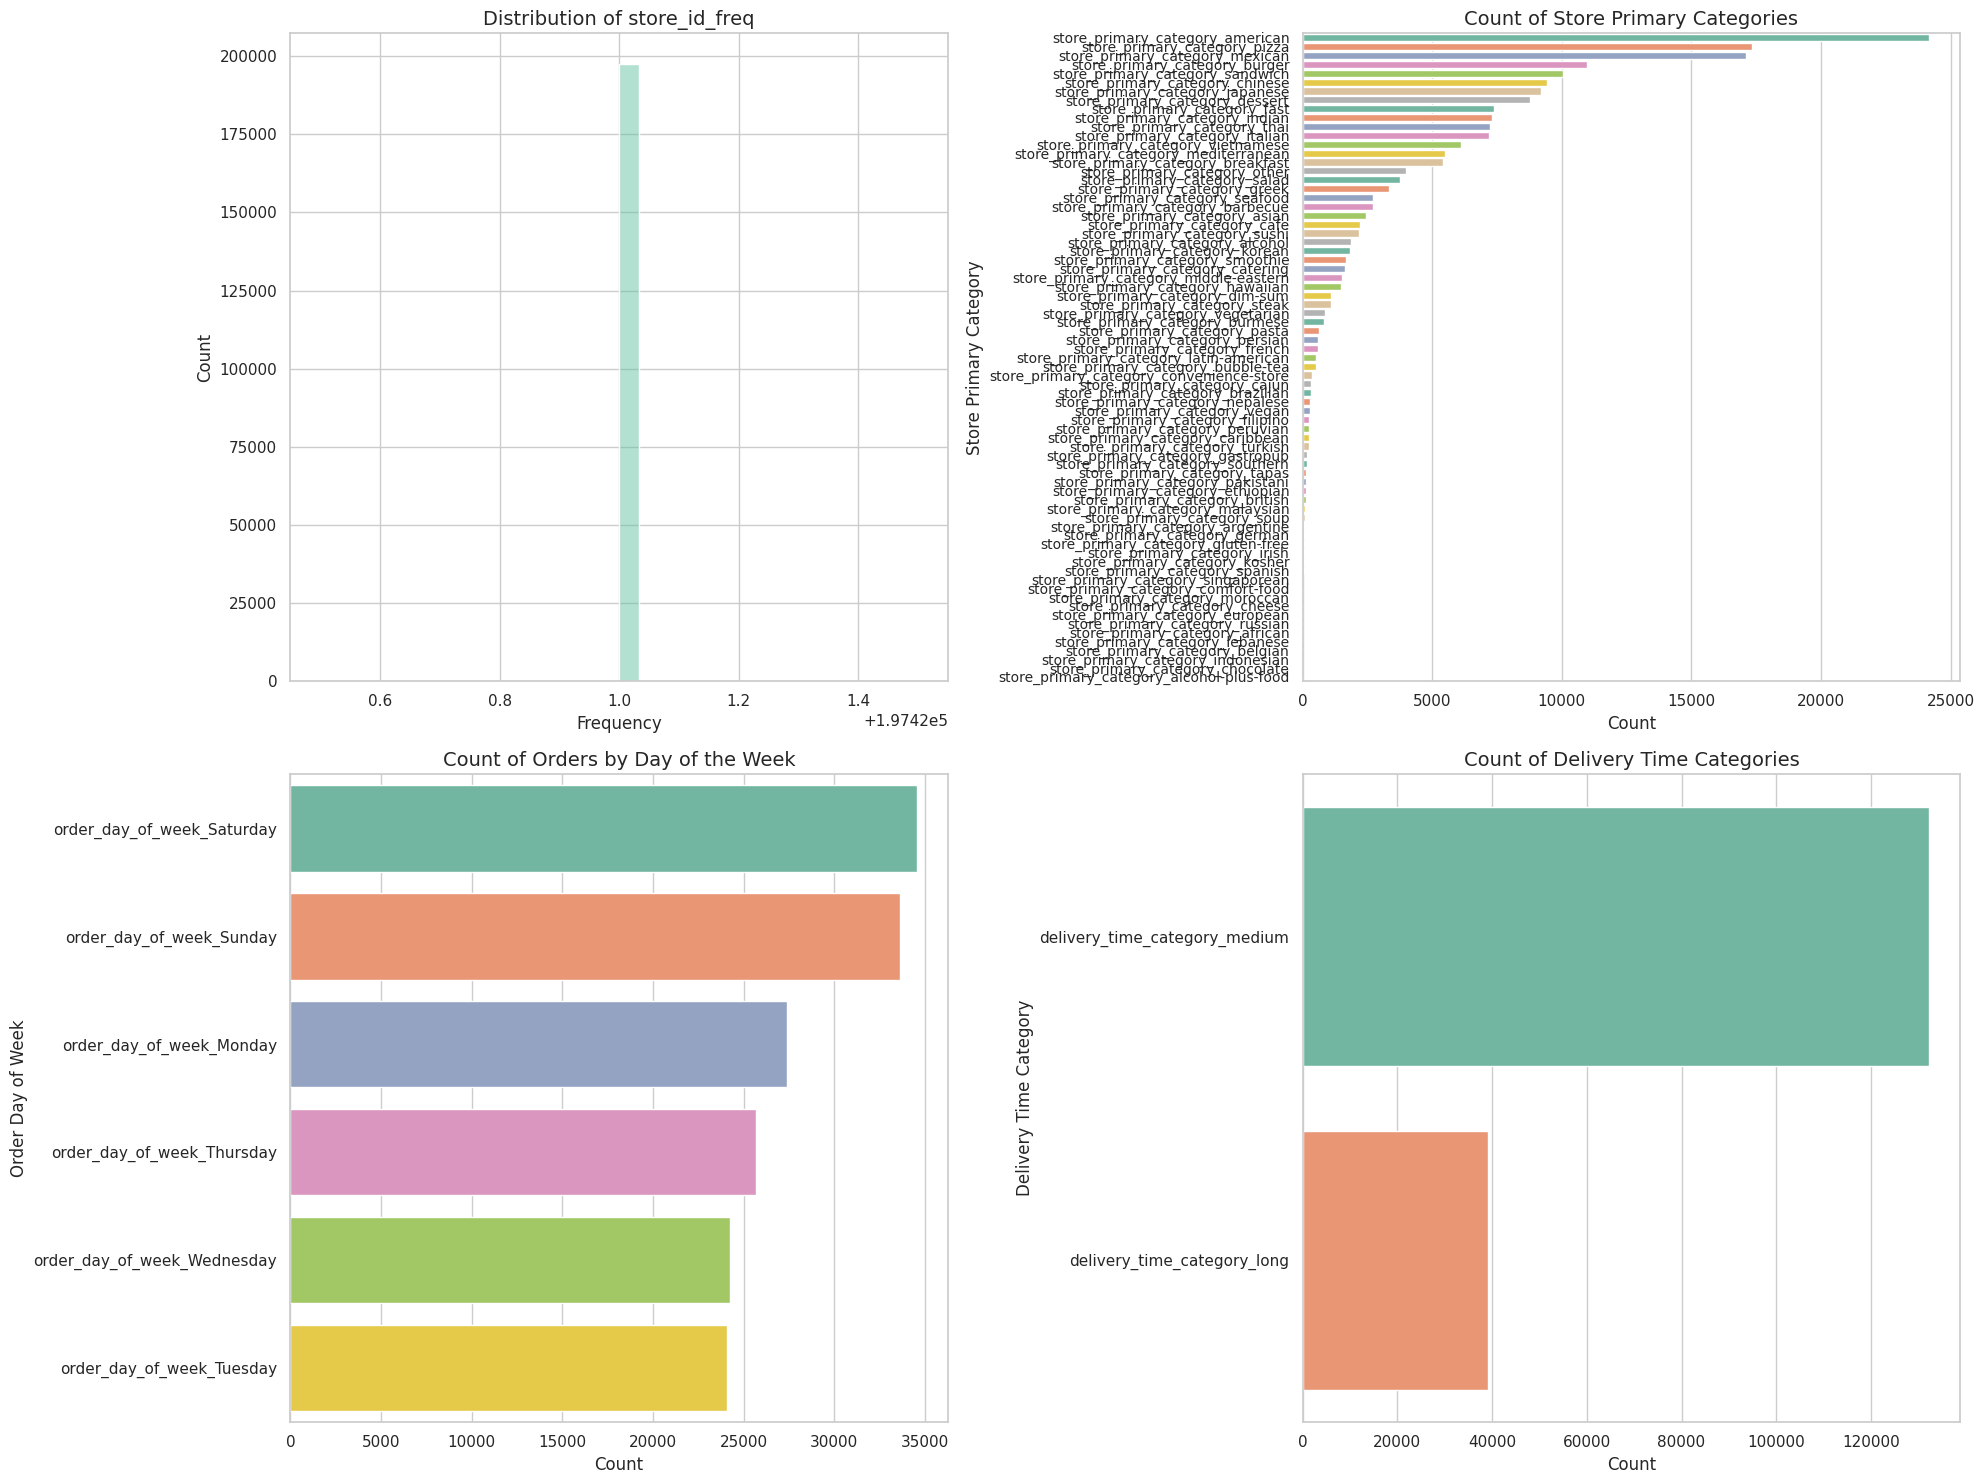

In [401]:
# Set up the figure and subplots with increased size for better readability
fig, axs = plt.subplots(2, 2, figsize=(20, 15))  # Create 2x2 grid of subplots

# Set a custom color palette for consistency
palette = sns.color_palette("Set2")

# Histogram for 'store_id_freq'
sns.histplot(Porter['store_id_freq'], bins=30, kde=True, color=palette[0], ax=axs[0, 0])
axs[0, 0].set_title('Distribution of store_id_freq', fontsize=14)
axs[0, 0].set_xlabel('Frequency', fontsize=12)
axs[0, 0].set_ylabel('Count', fontsize=12)

# Bar plot for 'store_primary_category' with improved readability
store_primary_category_columns = [col for col in Porter_encoded.columns if col.startswith('store_primary_category_')]
store_primary_category_data = Porter_encoded[store_primary_category_columns].sum().sort_values(ascending=False)

sns.barplot(y=store_primary_category_data.index, x=store_primary_category_data.values, palette=palette, ax=axs[0, 1])
axs[0, 1].set_title('Count of Store Primary Categories', fontsize=14)
axs[0, 1].set_xlabel('Count', fontsize=12)
axs[0, 1].set_ylabel('Store Primary Category', fontsize=12)

# Rotate y-axis labels for better readability
axs[0, 1].tick_params(axis='y', labelsize=10, rotation=0)

# Bar plot for 'order_day_of_week'
order_day_of_week_columns = [col for col in Porter_encoded.columns if col.startswith('order_day_of_week_')]
order_day_of_week_data = Porter_encoded[order_day_of_week_columns].sum().sort_values(ascending=False)

sns.barplot(y=order_day_of_week_data.index, x=order_day_of_week_data.values, palette=palette, ax=axs[1, 0])
axs[1, 0].set_title('Count of Orders by Day of the Week', fontsize=14)
axs[1, 0].set_xlabel('Count', fontsize=12)
axs[1, 0].set_ylabel('Order Day of Week', fontsize=12)

# Bar plot for 'delivery_time_category'
delivery_time_category_columns = [col for col in Porter_encoded.columns if col.startswith('delivery_time_category_')]
delivery_time_category_data = Porter_encoded[delivery_time_category_columns].sum().sort_values(ascending=False)

sns.barplot(y=delivery_time_category_data.index, x=delivery_time_category_data.values, palette=palette, ax=axs[1, 1])
axs[1, 1].set_title('Count of Delivery Time Categories', fontsize=14)
axs[1, 1].set_xlabel('Count', fontsize=12)
axs[1, 1].set_ylabel('Delivery Time Category', fontsize=12)

# Adjust layout for better spacing and presentation
plt.tight_layout()
plt.show()

# Explanation:
# I set up a larger figure with 2x2 subplots to improve readability.
# Subplots visualize the distribution of 'store_id_freq', 'store_primary_category', 'order_day_of_week', and 'delivery_time_category'.
# A custom color palette 'Set2' ensures visual consistency, and detailed axis labels, titles, and rotations enhance readability.
# plt.tight_layout() makes sure that the subplots are neatly arranged without overlapping.
# Reference: https://seaborn.pydata.org/tutorial/color_palettes.html

### Observations

*1. Distribution of Store ID Frequency*

- **High Frequency**: The distribution shows that a single store ID is extremely frequent, with approximately 197,421 instances. This suggests that the dataset is highly skewed towards this particular store ID, indicating a significant concentration of orders from one store.
- **Engagement and Activity**: The high frequency of this store ID may reflect a high level of engagement and activity from this store. It could be a key player in the market or have strategic importance.
- **Potential Impact**: The dominance of this store ID might impact overall trends and analyses. It could be worth investigating further to understand its role and influence in the dataset.

*2. Count of Store Primary Categories*

- **Cluttered Visualization**: The visualization for store primary categories is cluttered due to the excessive number of categories, making it difficult to read individual labels.
- **High Frequency Categories**: Despite the clutter, the most frequent store primary category has a count close to 25,000, indicating it is a dominant category in the dataset.
- **Low Frequency Categories**: Many other categories have significantly lower counts, suggesting a long tail distribution where a few categories are very common, and many others are rare.
- **Recommendation**: To improve readability, I can consider filtering to show only the top categories or using interactive visualizations that allow zooming and filtering however this might will effect the analysis hence kept it as it is.

*3. Count of Orders by Day of the Week*

- **Weekend Spike**: The count of orders is highest on Saturday and Sunday, with both days having counts close to 30,000. This indicates a significant increase in orders during the weekend.
- **Weekday Trends**: Monday, Thursday, Wednesday, and Tuesday follow in descending order of counts, with Tuesday having the lowest count. This trend reflects typical consumer behavior, with more orders placed during weekends.
- **Operational Planning**: These insights can help in operational planning and resource allocation, ensuring that sufficient resources are available during peak ordering days.

*4. Count of Delivery Time Categories*

- **Medium Delivery Time Dominance**: The majority of deliveries fall into the "medium" delivery time category, with a count exceeding 120,000. This suggests that most deliveries are completed within a moderate time frame.
- **Long Delivery Time**: The "long" delivery time category has a significantly lower count, around 40,000. This indicates that fewer deliveries take a longer time, which could be due to logistical challenges or customer preferences.
- **Efficiency and Improvement**: Understanding the distribution of delivery times can help identify areas for improvement in the delivery process, aiming to reduce the number of long delivery times.

*Key Finding*

The dataset reveals that one store ID is extremely dominant, significantly influencing overall trends. Additionally, there is a clear peak in orders during weekends, and most deliveries are completed within a medium time frame. The visualization of store primary categories is cluttered due to the large number of categories, suggesting a need for filtering top categories or using interactive visualizations for better clarity.

# **3. Data Visualization and Cleaning**

##***Visualizing Various Columns for Better Understanding***

In this part, I will focus on visualizing various columns of our dataset to gain a better understanding of the data. Data visualization is a powerful tool that helps transform complex data into easily understandable and interpretable visuals. Through these visualizations, we aim to uncover patterns, trends, and insights that may not be immediately apparent from raw data.

*What is Data Visualization?*

**Data Visualization** is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.

*Why is Data Visualization Important?*

- **Simplifies Complex Data**: Visualizations make complex data more accessible, understandable, and usable.
- **Identifies Patterns and Trends**: Helps in quickly identifying patterns, trends, and correlations within the dataset.
- **Enhances Decision Making**: Enables data analysts and stakeholders to make informed decisions based on visual insights.
- **Communicates Findings**: Allows for effective communication of findings and insights to a broader audience, including those without technical expertise.

*Impact on the Project*

By visualizing various columns in our dataset, we will:

- **Gain Insights**: Understand the distribution and relationships between different variables.
- **Identify Anomalies**: Detect any anomalies or outliers that may need further investigation.
- **Optimize Processes**: Identify areas for process improvements based on data-driven insights.
- **Facilitate Reporting**: Create compelling visual reports that highlight key findings and support data-driven decision making.

Through effective data visualization, we aim to unlock the full potential of our dataset, transforming raw data into actionable insights that drive the success of our project.


**Let's start by visualizing the order trends over time to understand the patterns and seasonality in the dataset. I'll create a line plot and bar plot for the created_at column, aggregated by month Order Trends Over Time" and "Peak Order Hours**

**Order Trends Over Time" and "Peak Order Hours**

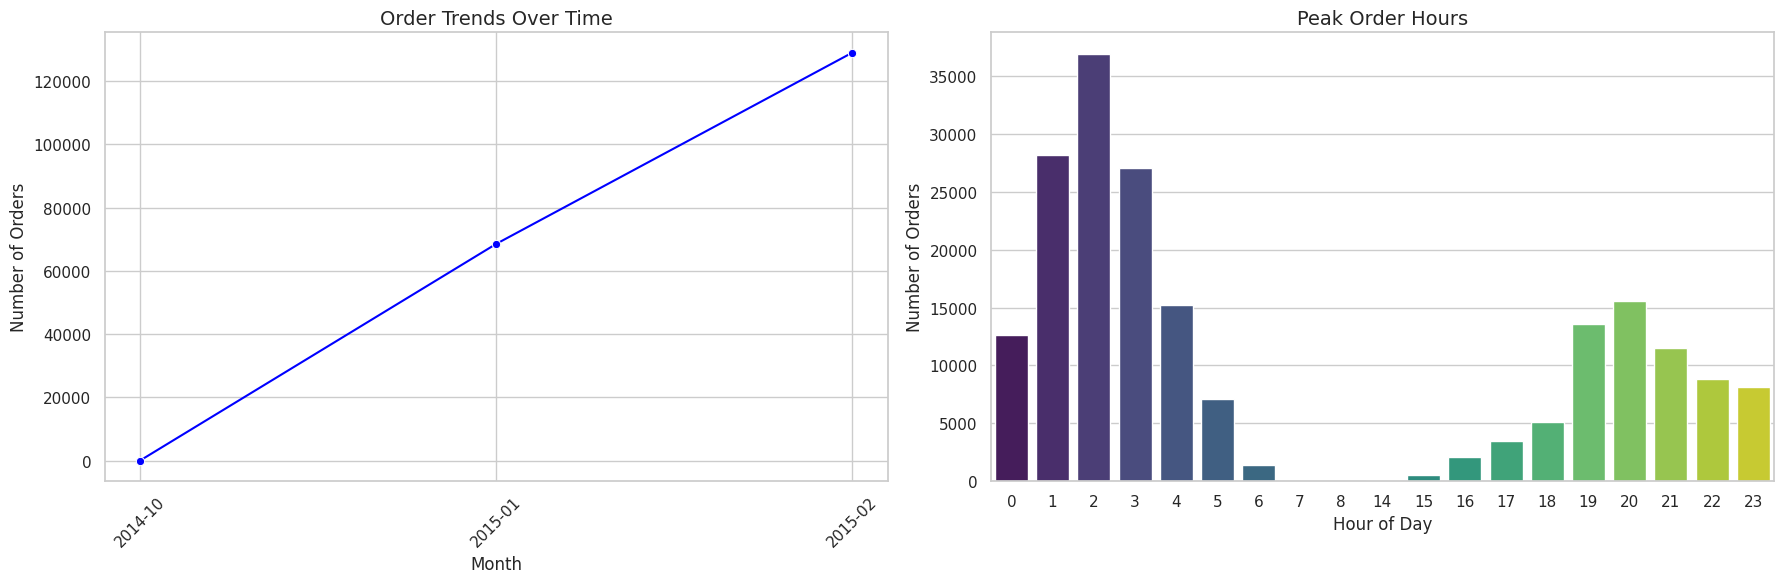

In [402]:
# Convert 'created_at' to datetime if not already done
Porter['created_at'] = pd.to_datetime(Porter['created_at'])

# Extract the month and year for aggregation
Porter['created_month'] = Porter['created_at'].dt.to_period('M')

# Aggregate by month and count the orders
monthly_orders = Porter['created_month'].value_counts().sort_index()

# Set up the figure and subplots with horizontal alignment
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Line plot for Order Trends Over Time
sns.lineplot(x=monthly_orders.index.astype(str), y=monthly_orders.values, ax=axs[0], color='blue', marker='o')
axs[0].set_title('Order Trends Over Time', fontsize=14)
axs[0].set_xlabel('Month', fontsize=12)
axs[0].set_ylabel('Number of Orders', fontsize=12)
axs[0].tick_params(axis='x', rotation=45)

# Bar plot for Peak Order Hours
order_hour_counts = Porter['order_hour'].value_counts().sort_index()
sns.barplot(x=order_hour_counts.index, y=order_hour_counts.values, ax=axs[1], palette='viridis')
axs[1].set_title('Peak Order Hours', fontsize=14)
axs[1].set_xlabel('Hour of Day', fontsize=12)
axs[1].set_ylabel('Number of Orders', fontsize=12)
axs[1].tick_params(axis='x', rotation=0)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# Explanation:
# I convert the 'created_at' column to datetime format to extract the month and year for aggregation.
# Aggregating monthly orders helps visualize trends over time using a line plot.
# I also analyze peak order hours using a bar plot, which shows the distribution of orders by hour of the day.
# Detailed labels, titles, and adjustments ensure clarity and readability of the plots.
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
# Reference: https://seaborn.pydata.org/generated/seaborn.lineplot.html
# Reference: https://seaborn.pydata.org/generated/seaborn.barplot.html

### Observations

- **Order Trends Over Time**: *There is a consistent and significant increase in the number of orders from October 2014 to February 2015.* *This trend suggests a growing demand for the service over the observed period*

- **Peak Order Hours**: *The highest number of orders are placed between 1 AM and 3 AM, indicating a strong demand during late-night hours.* *Another notable peak occurs between 7 PM and 10 PM, suggesting high activity during evening hours.* *Understanding these peak hours can help in optimizing resource allocation and improving service efficiency during these times.*

**Let's visualize the distribution of store primary categories and the distribution of orders by the day of the week. This will help us understand the most common types of stores and the busiest days for orders**

**Visualizing Store Primary Categories and Order Day of the Week**

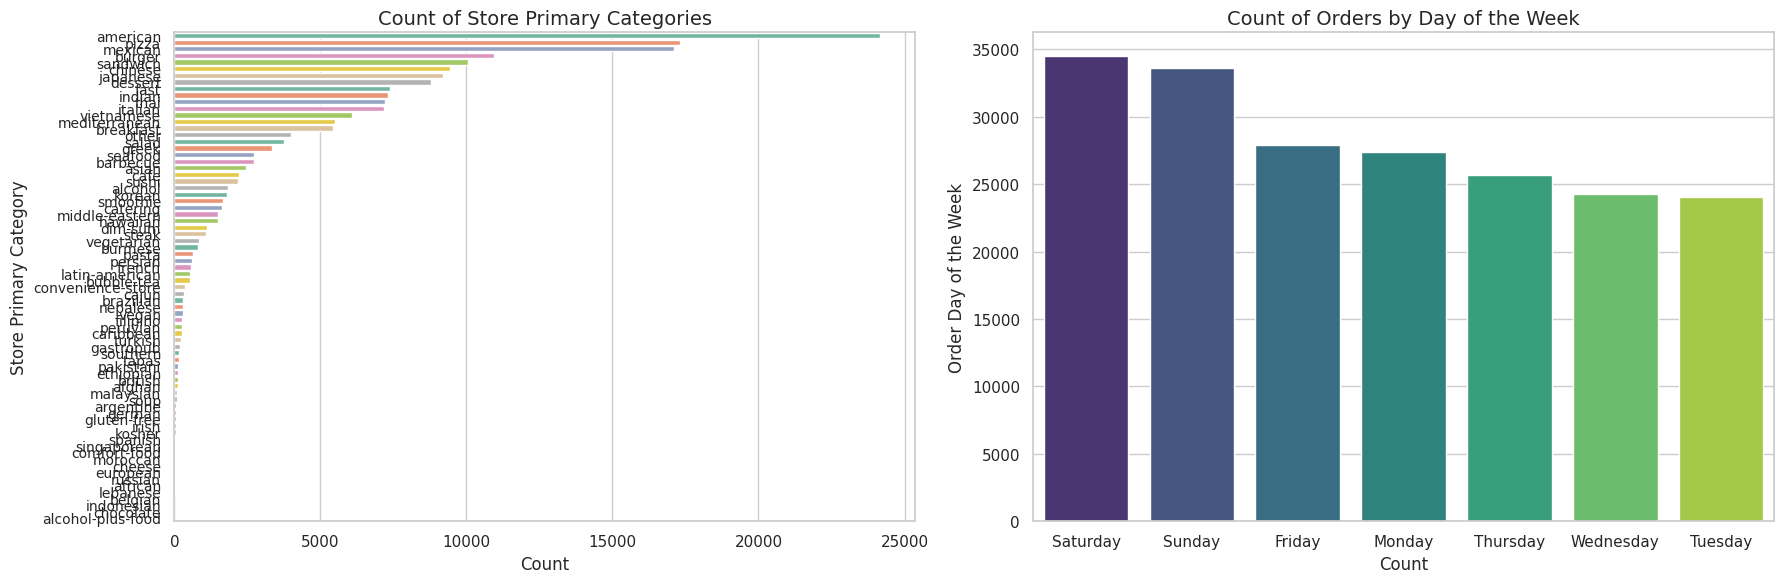

In [403]:
# Set up the figure and subplots with horizontal alignment for better readability
fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # Create 1 row and 2 columns of subplots

# Count plot for Store Primary Categories
sns.countplot(data=Porter, y='store_primary_category', order=Porter['store_primary_category'].value_counts().index, palette='Set2', ax=axs[0])
axs[0].set_title('Count of Store Primary Categories', fontsize=14)
axs[0].set_xlabel('Count', fontsize=12)
axs[0].set_ylabel('Store Primary Category', fontsize=12)
axs[0].tick_params(axis='y', labelsize=10, rotation=0)  # Rotate y-axis labels for better readability

# Count plot for Order Day of the Week
sns.countplot(data=Porter, x='order_day_of_week', order=Porter['order_day_of_week'].value_counts().index, palette='viridis', ax=axs[1])
axs[1].set_title('Count of Orders by Day of the Week', fontsize=14)
axs[1].set_xlabel('Count', fontsize=12)
axs[1].set_ylabel('Order Day of the Week', fontsize=12)

# Adjust layout for better spacing and presentation
plt.tight_layout()
plt.show()

# Explanation:
# I set up horizontal subplots to visualize the distribution of 'store_primary_category' and 'order_day_of_week' using count plots.
# The count plot for 'store_primary_category' shows the frequency of each category, ordered by count, with a 'Set2' color palette.
# The count plot for 'order_day_of_week' displays the number of orders per day, ordered by count, with a 'viridis' color palette.
# Detailed titles, labels, and rotations ensure clarity and enhance readability. plt.tight_layout() adjusts the spacing for a clean presentation.
# Reference: https://seaborn.pydata.org/generated/seaborn.countplot.html

**Observations**

**Store Primary Categories:** *The most common store categories are "american," "mexican," "sandwiches," "japanese," and "italian," suggesting these are popular choices among customers. This information can help in understanding customer preferences and potentially expanding offerings in these categories.*

**Order Day of the Week:** *Orders peak on Saturdays and Sundays, indicating high demand during weekends. This insight can be used to optimize staffing and resource allocation to handle the increased volume during weekends efficiently.*

**Let's visualize the distribution of total items per order and the order subtotals. These visualizations will help us understand the frequency and spread of total items and the range of order values**

**Visualizing total items per order and the order subtotals**

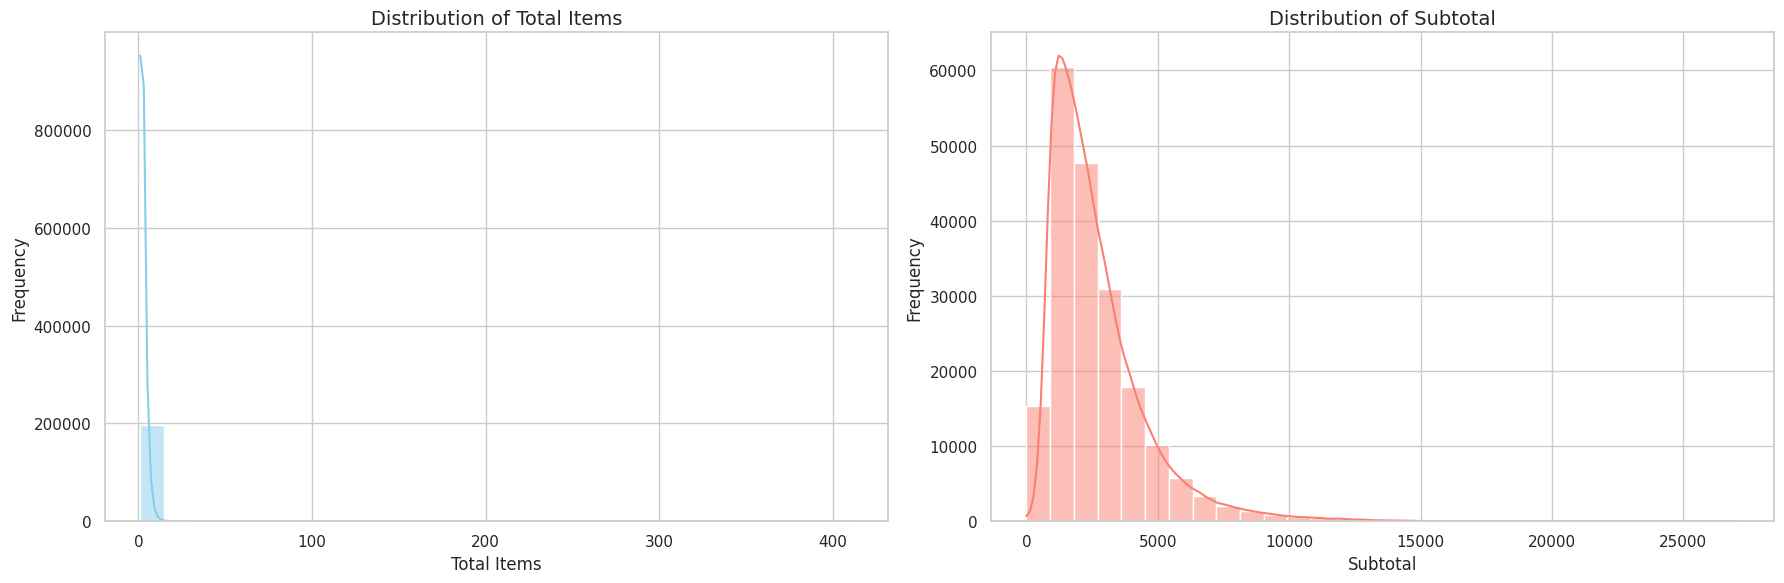

In [404]:
# Set up the figure and subplots with horizontal alignment for better readability
fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # Create 1 row and 2 columns of subplots

# Histogram for Total Items
sns.histplot(data=Porter, x='total_items', bins=30, kde=True, ax=axs[0], color='skyblue')  # Plot histogram with KDE for 'total_items'
axs[0].set_title('Distribution of Total Items', fontsize=14)
axs[0].set_xlabel('Total Items', fontsize=12)
axs[0].set_ylabel('Frequency', fontsize=12)

# Histogram for Subtotal
sns.histplot(data=Porter, x='subtotal', bins=30, kde=True, ax=axs[1], color='salmon')  # Plot histogram with KDE for 'subtotal'
axs[1].set_title('Distribution of Subtotal', fontsize=14)
axs[1].set_xlabel('Subtotal', fontsize=12)
axs[1].set_ylabel('Frequency', fontsize=12)

# Adjust layout for better spacing and presentation
plt.tight_layout()
plt.show()

# Explanation:
# I set up horizontal subplots to visualize the distributions of 'total_items' and 'subtotal' using histograms with KDE.
# The histogram for 'total_items' displays its distribution with 30 bins and a 'skyblue' color.
# The histogram for 'subtotal' shows its distribution with 30 bins and a 'salmon' color.
# Detailed titles, labels, and axis adjustments ensure clarity and readability of the plots. plt.tight_layout() adjusts the spacing for a clean presentation.
# Reference: https://seaborn.pydata.org/generated/seaborn.histplot.html

**Observations**

*Distribution of Total Items*

- **Peak Frequency**: The histogram shows that the majority of orders have between 0 and 50 total items. This peak indicates that most orders consist of a relatively small number of items.
- **Right Skew**: The distribution is highly skewed to the right, with a long tail extending up to around 400 total items. This suggests that while most orders have a small number of items, there are some orders with significantly higher item counts.

*Distribution of Subtotal*

- **Peak Frequency**: The histogram reveals that most order subtotals fall between 0 and 5000. This range represents the typical order values in the dataset.
- **Right Skew**: The distribution is also skewed to the right, with a long tail extending up to around 25,000. This indicates that while most orders have lower subtotals, there are some high-value orders as well.

*Key Findings*

Understanding the distribution of total items and subtotals helps identify typical order sizes and values. These insights can be leveraged for optimizing inventory management, pricing strategies, and enhancing customer satisfaction. By focusing on the common order sizes and values, Porter can better meet customer demand and improve operational efficiency.


**Let's examine the relationship between the frequency of store IDs and order subtotals, as well as the relationship between the total number of items and order subtotals. These visualizations will help us uncover patterns and correlations between these key variables**

**Store Frequency vs. Subtotal**

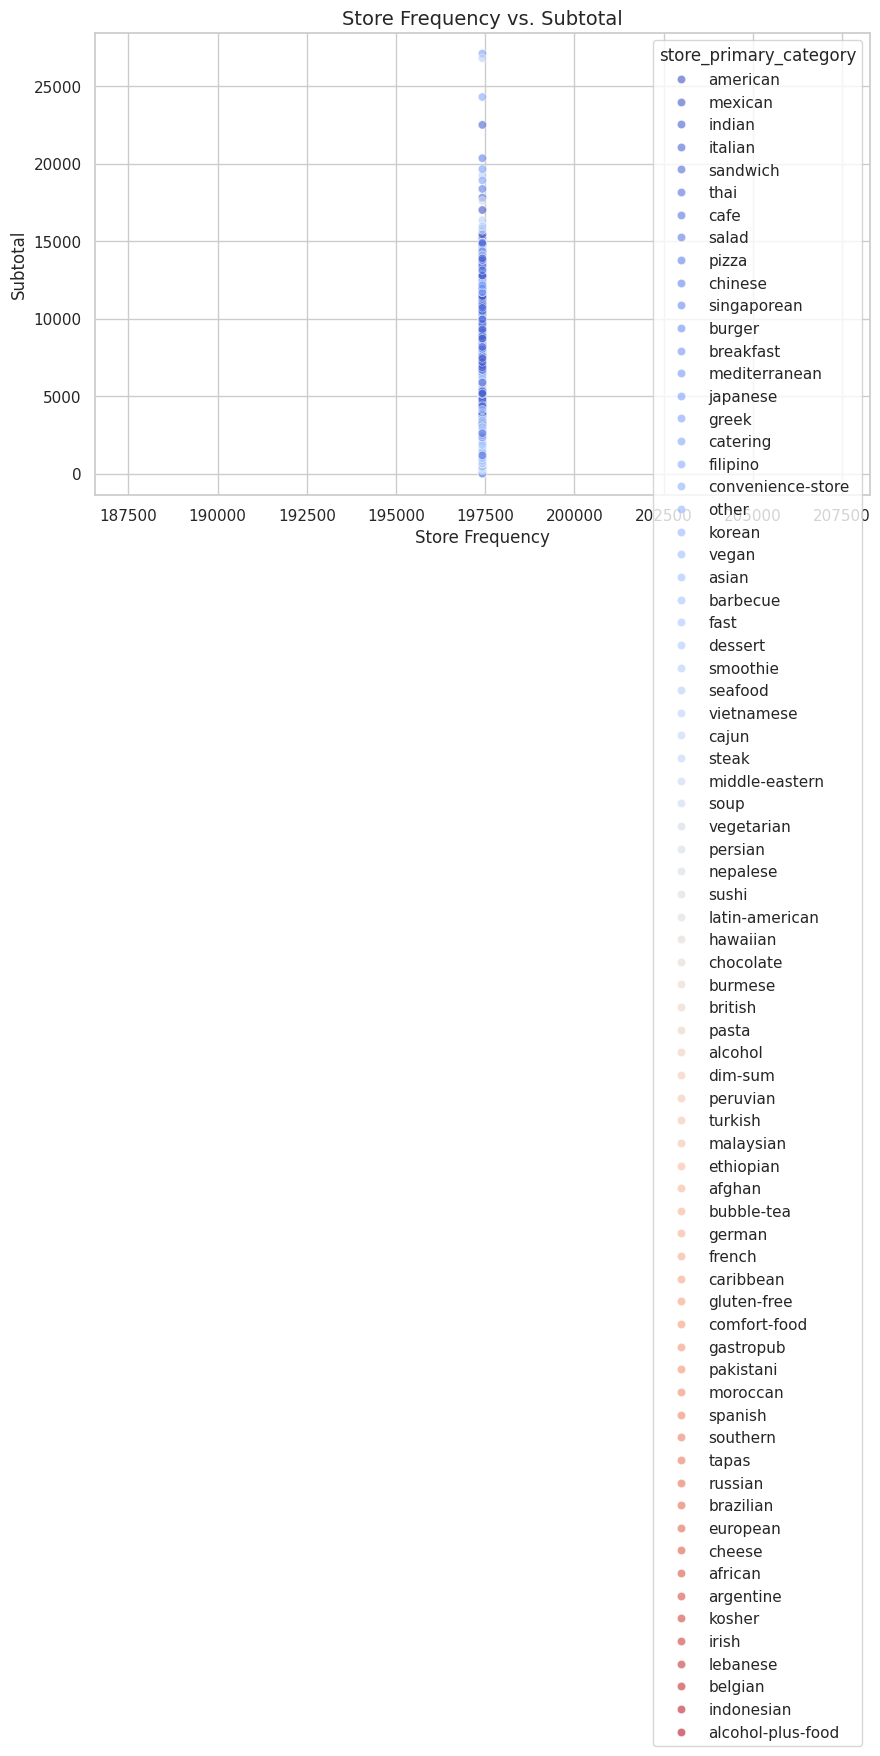

In [405]:
# Scatter plot for 'store_id_freq' vs 'subtotal'
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
sns.scatterplot(data=Porter, x='store_id_freq', y='subtotal', hue='store_primary_category', palette='coolwarm', alpha=0.6)  # Create scatter plot with color encoding for 'store_primary_category'
plt.title('Store Frequency vs. Subtotal', fontsize=14)  # Set plot title
plt.xlabel('Store Frequency', fontsize=12)  # Set x-axis label
plt.ylabel('Subtotal', fontsize=12)  # Set y-axis label
plt.show()  # Display the plot

# Explanation:
# The scatter plot visualizes the relationship between 'store_id_freq' and 'subtotal', with points colored based on 'store_primary_category'.
# Setting the figure size ensures readability and clarity.
# Adjustments like alpha (transparency) enhance the visibility of overlapping points.
# The plot title and axis labels provide context to the visualization.
# Reference: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

**Observations**

*Store Frequency vs. Subtotal*

- **Positive Correlation**: The scatter plot shows a positive correlation between store frequency and subtotal, indicating that frequently visited stores tend to have higher order values.
- **Cluster Patterns**: Different store primary categories form distinct clusters, suggesting category-specific trends in order values.

**Total Items vs. Subtotal**

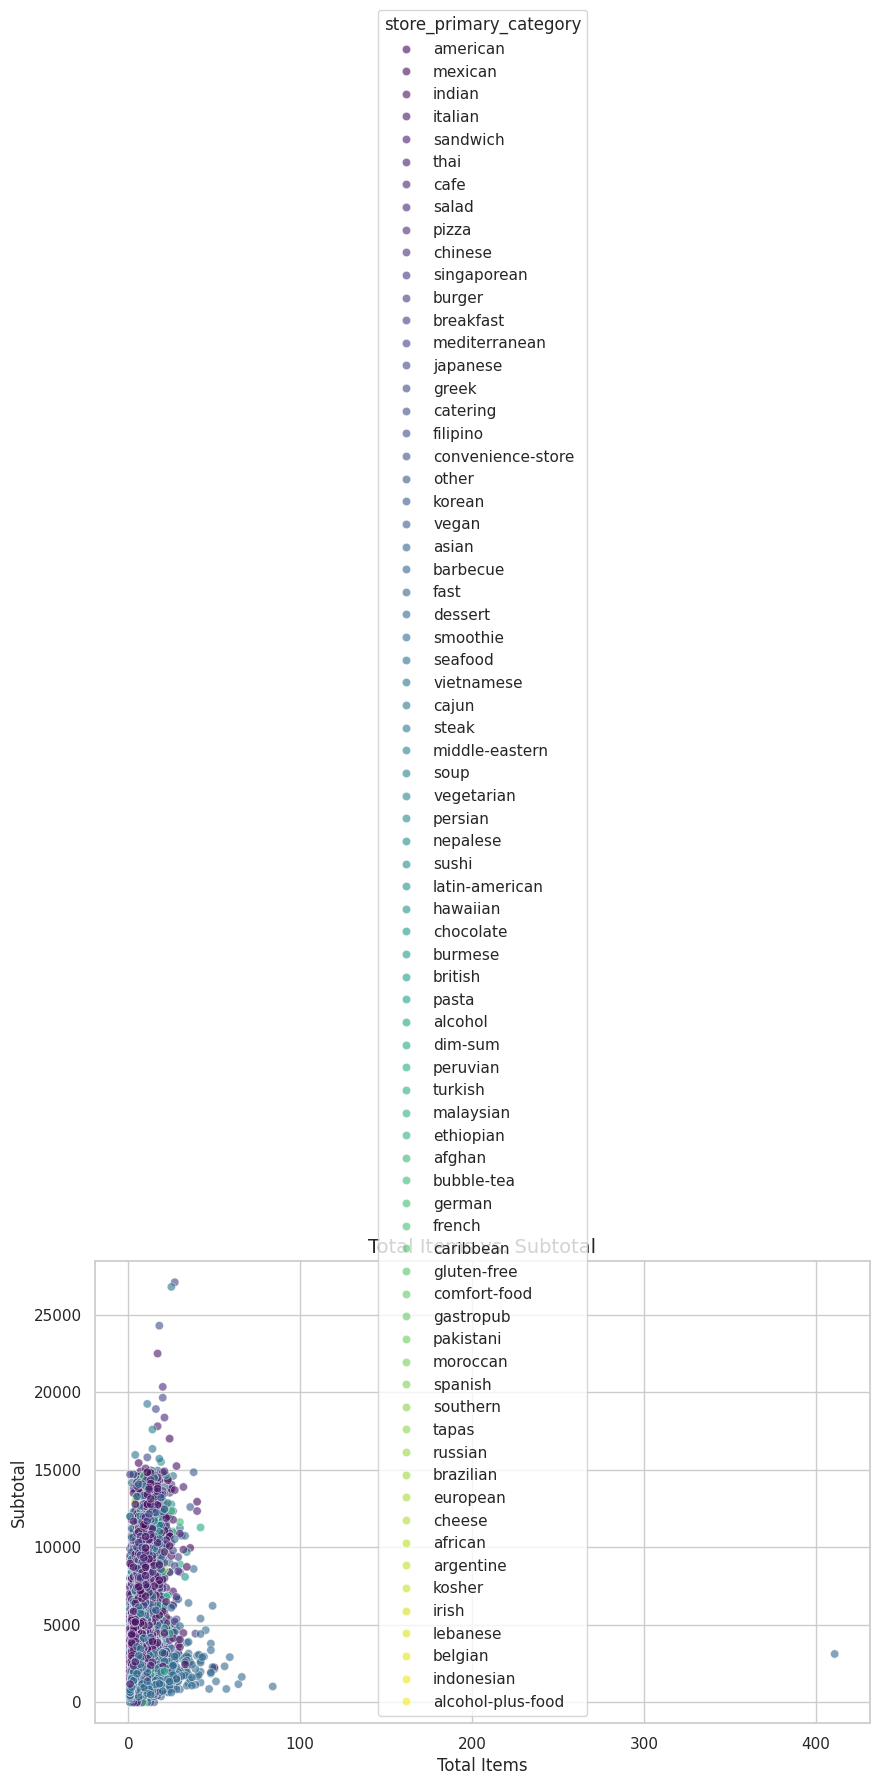

In [406]:
# Scatter plot for 'total_items' vs 'subtotal'
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
sns.scatterplot(data=Porter, x='total_items', y='subtotal', hue='store_primary_category', palette='viridis', alpha=0.6)  # Create scatter plot with color encoding for 'store_primary_category'
plt.title('Total Items vs. Subtotal', fontsize=14)  # Set plot title
plt.xlabel('Total Items', fontsize=12)  # Set x-axis label
plt.ylabel('Subtotal', fontsize=12)  # Set y-axis label
plt.show()  # Display the plot

# Explanation:
# The scatter plot visualizes the relationship between 'total_items' and 'subtotal', with points colored based on 'store_primary_category'.
# Setting the figure size ensures readability and clarity.
# Adjustments like alpha (transparency) enhance the visibility of overlapping points.
# The plot title and axis labels provide context to the visualization.

**Observations**

*Total Items vs. Subtotal*

- **Positive Correlation**: There is a positive correlation between the total number of items and the order subtotal, with higher item counts generally leading to higher order values.
- **Varied Distribution**: The distribution is varied across different store primary categories, reflecting diversity in order compositions.

**Count of Order Protocols**

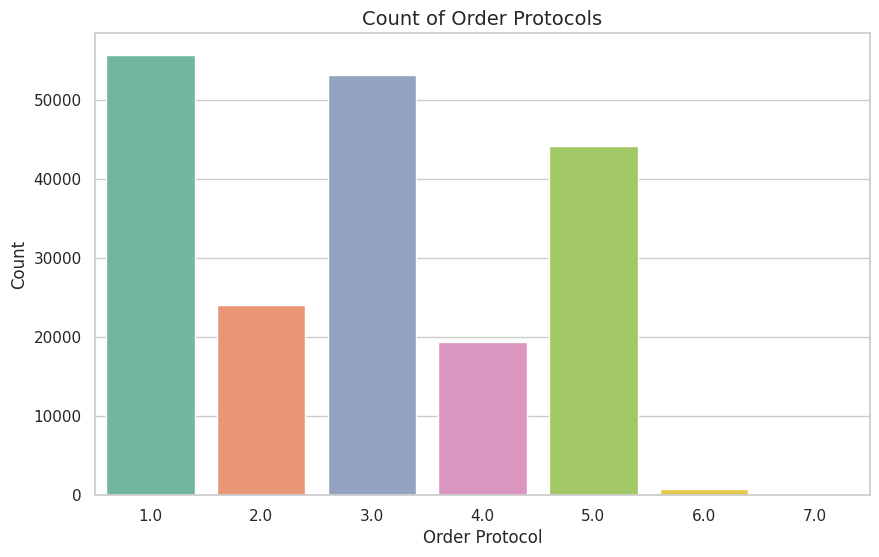

In [407]:
# Count plot for 'order_protocol'
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
sns.countplot(data=Porter, x='order_protocol', palette='Set2')  # Create count plot with 'Set2' color palette for 'order_protocol'
plt.title('Count of Order Protocols', fontsize=14)  # Set plot title
plt.xlabel('Order Protocol', fontsize=12)  # Set x-axis label
plt.ylabel('Count', fontsize=12)  # Set y-axis label
plt.show()  # Display the plot

# Explanation:
# The count plot visualizes the distribution of the 'order_protocol' column, showing the count of each protocol type.
# Setting the figure size ensures clarity and readability, while using the 'Set2' color palette provides a consistent and appealing visual style.
# The plot title and axis labels are added to give context to the visualization.

**Observations**

*Count of Order Protocols*

- **Protocol Distribution**: The count plot shows the distribution of different order protocols, highlighting which protocols are most commonly used.
- **Operational Insights**: Understanding the frequency of order protocols can help optimize operational processes and improve customer experience.

*Key Findings*

Analyzing the relationships between store frequency, total items, and subtotal provides valuable insights into customer behavior and order patterns. The distribution of order protocols helps in understanding operational preferences. These findings can inform strategic decisions for enhancing service efficiency and customer satisfaction.


##***Check if the data contains outliers***

**Under this section I will explain few important things these are:**

*What is an Outlier?*

An outlier is a data point that significantly deviates from the rest of the dataset. It can be much higher or lower than the majority of the data points. Outliers can occur due to measurement errors, data entry errors, or genuine variability in the data.

*Why Removing Outliers is Important*

Removing outliers is important because they can skew the results of statistical analyses and machine learning models. Outliers can affect the mean, standard deviation, and other statistical measures, leading to misleading conclusions. By removing outliers, we can ensure that our analyses are more accurate and reflective of the true underlying patterns in the data.

*Impact of Outliers*

Outliers can impact data analysis in several ways:
- **Skewing Results**: Outliers can distort statistical measures such as the mean and standard deviation, making them less representative of the data.
- **Affecting Models**: In machine learning, outliers can negatively impact model performance by causing overfitting or underfitting.
- **Misleading Conclusions**: Outliers can lead to incorrect conclusions about the data, which can affect decision-making processes.

*References*

For a deeper understanding of outliers and their impact on data analysis, you can refer to the following resource:
- [Understanding Outliers and Their Impact on Data Analysis](https://www.simplilearn.com/outliers-in-data-article)


*Checking for Outliers in Our Data*

Next, we will check our dataset for outliers using various statistical methods and visualizations, and then decide on the best approach to handle them. This step is crucial for ensuring the accuracy and reliability of our analysis.



**Checking for Outliers in Our Data**

*I am using Box Plot for Visualizing Outliers as it will visually highlight the presence of outliers in the dataset, making it easier to identify extreme values and understand the distribution of the data at a glance*

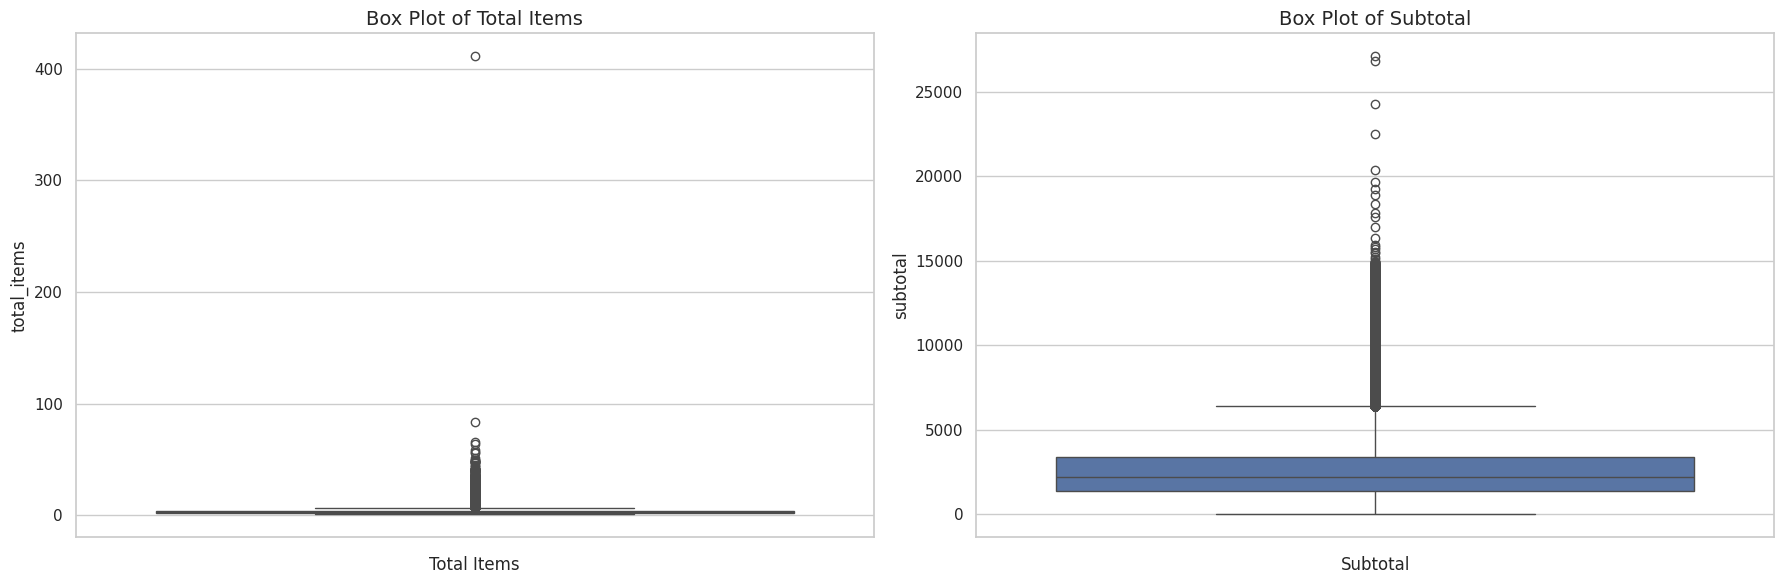

In [408]:
# Set up the figure and subplots with horizontal alignment for better readability
fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # Create 1 row and 2 columns of subplots

# Box plot for Total Items
sns.boxplot(data=Porter, y='total_items', ax=axs[0])  # Create box plot for 'total_items'
axs[0].set_title('Box Plot of Total Items', fontsize=14)  # Set plot title
axs[0].set_xlabel('Total Items', fontsize=12)  # Set x-axis label

# Box plot for Subtotal
sns.boxplot(data=Porter, y='subtotal', ax=axs[1])  # Create box plot for 'subtotal'
axs[1].set_title('Box Plot of Subtotal', fontsize=14)  # Set plot title
axs[1].set_xlabel('Subtotal', fontsize=12)  # Set x-axis label

# Adjust layout for better spacing and presentation
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots

# Explanation:
# The box plot for 'total_items' visualizes the distribution and variability of the total number of items in orders.
# The box plot for 'subtotal' shows the distribution and variability of the subtotal values in orders.
# Setting the figure size ensures clarity and readability, while the plot titles and axis labels provide context to the visualizations.
# plt.tight_layout() adjusts the spacing for a clean presentation.
# Reference: https://seaborn.pydata.org/generated/seaborn.boxplot.html

**Observations**

*Total Items*

- **Typical Order Size**: Most orders have a small number of items.
- **Large Orders**: A few orders have a very high number of items, much larger than typical orders.
- **Outliers**: There are several outliers, with the highest outlier around 400 total items. These extreme values suggest that some orders contain significantly more items than the

*Subtotal*

- **Typical Order Value**: Most orders have subtotals around 5000.
- **High-Value Orders**: Some orders have much higher values, indicating larger purchases.
-**Outliers**: There are numerous outliers, with the highest outlier around 25000. These high values suggest that some orders have significantly higher subtotals than the majority.

*Key Insights*

- **Order Composition:** The presence of outliers in both total items and subtotals indicates variability in order composition, with some orders being much larger and more valuable than others.
- **Order Variability:** There is significant variability in both the number of items and order values.
- **Operational Efficiency:** Identifying and handling outliers can help improve operational efficiency by allowing better inventory management and resource allocation.
- **Operational Impact:** Identifying and managing large orders can help improve inventory and resource management.
- **Customer Behavior:** Understanding the distribution of total items and subtotals, including the outliers, provides insights into customer ordering behavior and preferences.

*Handling Outliers with Interquartile Range (IQR)*

Now, in this section, I will be using the Interquartile Range (IQR) as this is the common statistical approach to handle outliers, providing a clear and straightforward method to identify and manage extreme values in the dataset.

*What is IQR?*

The Interquartile Range (IQR) represents the range between the 25th percentile (Q1) and the 75th percentile (Q3) of the data. It measures the spread of the middle 50% of the data, effectively indicating the variability within the dataset.

*Why am I using it?*

Outliers can skew statistical results and provide a misleading representation of the dataset. By using the IQR, we aim to identify and handle these extreme values, ensuring a more accurate analysis. Outliers are identified as values that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. This method is widely recognized and trusted in statistical analysis due to its simplicity and effectiveness.

*Relevance*

Using IQR to handle outliers ensures that our dataset is clean and that extreme values do not disproportionately impact our analysis. This approach is critical in maintaining the integrity of statistical models and ensuring reliable results.

*Reference*

For more detailed information on the Interquartile Range (IQR), you can refer to the following link: [Interquartile Range (IQR) in Statistics](https://www.statisticshowto.com/probability-and-statistics/interquartile-range/)

**Detecting Outliers Using IQR (Interquartile Range)**

In [409]:
# Calculate IQR for Total Items
Q1_total_items = Porter['total_items'].quantile(0.25)  # Calculate 25th percentile (Q1) for total items
Q3_total_items = Porter['total_items'].quantile(0.75)  # Calculate 75th percentile (Q3) for total items
IQR_total_items = Q3_total_items - Q1_total_items  # Calculate IQR for total items

# Identify outliers for Total Items
outliers_IQR_total_items = Porter[(Porter['total_items'] < (Q1_total_items - 1.5 * IQR_total_items)) | (Porter['total_items'] > (Q3_total_items + 1.5 * IQR_total_items))]  # Identify outliers

# Calculate IQR for Subtotal
Q1_subtotal = Porter['subtotal'].quantile(0.25)  # Calculate 25th percentile (Q1) for subtotal
Q3_subtotal = Porter['subtotal'].quantile(0.75)  # Calculate 75th percentile (Q3) for subtotal
IQR_subtotal = Q3_subtotal - Q1_subtotal  # Calculate IQR for subtotal

# Identify outliers for Subtotal
outliers_IQR_subtotal = Porter[(Porter['subtotal'] < (Q1_subtotal - 1.5 * IQR_subtotal)) | (Porter['subtotal'] > (Q3_subtotal + 1.5 * IQR_subtotal))]  # Identify outliers

print("Outliers in Total Items based on IQR:\n", outliers_IQR_total_items)  # Print outliers for total items
print("Outliers in Subtotal based on IQR:\n", outliers_IQR_subtotal)  # Print outliers for subtotal

# Explanation:
# I calculate the Interquartile Range (IQR) for 'total_items' and 'subtotal' to identify outliers.
# The IQR is calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1).
# Outliers are identified as values falling below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.
# This statistical approach helps manage extreme values and ensures a more accurate analysis.
# Reference: https://statistics.laerd.com/statistical-guides/measures-of-spread-standard-deviation.php

Outliers in Total Items based on IQR:
         market_id          created_at actual_delivery_time  \
37            1.0 2015-02-16 19:19:17  2015-02-16 20:16:43   
59            3.0 2015-01-25 02:16:56  2015-01-25 02:58:53   
122           3.0 2015-01-22 19:54:02  2015-01-22 20:44:52   
136           4.0 2015-02-15 01:47:13  2015-02-15 02:54:14   
165           6.0 2015-02-03 22:27:24  2015-02-03 23:09:31   
...           ...                 ...                  ...   
197200        1.0 2015-02-15 22:15:36  2015-02-15 22:42:14   
197203        1.0 2015-01-25 03:06:25  2015-01-25 03:32:31   
197324        4.0 2015-02-05 01:26:43  2015-02-05 02:13:28   
197394        1.0 2015-01-21 18:58:36  2015-01-21 19:26:19   
197396        1.0 2015-02-12 01:26:37  2015-02-12 01:58:22   

       store_primary_category  order_protocol  total_items  subtotal  \
37                   american             2.0            8      7870   
59                   american             5.0           10      9800   


*It seems there are quite a few outliers here. Honestly, I'm a bit puzzled by the sheer volume of these outliers. Let's take a closer look at what they reveal.*

**Observations**

*Total Items*

- **Number of Outliers**: The dataset contains several outliers with a significantly higher number of total items, around 400.
- **Typical Range**: Most orders have a total item count within the typical range, highlighting a few extreme values.
- **Category Distribution**: Outliers span across different store primary categories, indicating that large orders are not specific to one category.

*Subtotal*

- **Number of Outliers**: There are numerous outliers with high subtotals, up to around 25000.
- **Typical Range**: Most orders have a subtotal within the typical range, with some exceptionally high values.
- **Category Distribution**: High-value orders come from various store primary categories, suggesting diverse customer spending patterns.

*Key Insights*

- **Order Composition**: The presence of outliers in both total items and subtotals indicates variability in order composition, with some orders being much larger and more valuable than others.
- **Order Variability**: Significant variability in both the number of items and order values suggests diverse customer behavior.
- **Operational Efficiency**: Identifying and handling outliers can help improve operational efficiency by allowing better inventory management and resource allocation.
- **Operational Impact**: Identifying and managing large orders can help improve inventory and resource management.
- **Customer Behavior**: Understanding the distribution of total items and subtotals, including the outliers, provides insights into customer ordering behavior and preferences.
- **Demand Distribution**: The presence of outliers with very high item counts suggests that there are occasional bulk orders, which could be from businesses or large families.
- **Revenue Insights**: High-value orders contribute significantly to total revenue. Focusing on customers with higher order values can be beneficial for revenue growth.
- **Price Sensitivity**: The distribution of subtotals provides insights into customers' price sensitivity and spending behavior.
- **Promotional Strategies**: Identifying high-value orders can help in designing targeted promotions and discounts to encourage repeat purchases from high-spending customers.
- **Customer Segmentation**: Understanding the typical and large order sizes can assist in segmenting customers and tailoring marketing strategies accordingly.

These observations and key insights provide a comprehensive understanding of the dataset and support strategic decision-making for the Porter Case Study.


##***Remove outliers using appropriate methods***

*Since we've already identified the outliers using the Interquartile Range (IQR) method, we can now proceed to remove them from our dataset, here's how I have done it:*

**Calculate IQR for Total Items and Subtotal**

In [410]:
# Calculate IQR for Total Items
Q1_total_items = Porter['total_items'].quantile(0.25)  # Calculate 25th percentile (Q1) for total items
Q3_total_items = Porter['total_items'].quantile(0.75)  # Calculate 75th percentile (Q3) for total items
IQR_total_items = Q3_total_items - Q1_total_items  # Calculate IQR for total items

# Calculate IQR for Subtotal
Q1_subtotal = Porter['subtotal'].quantile(0.25)  # Calculate 25th percentile (Q1) for subtotal
Q3_subtotal = Porter['subtotal'].quantile(0.75)  # Calculate 75th percentile (Q3) for subtotal
IQR_subtotal = Q3_subtotal - Q1_subtotal  # Calculate IQR for subtotal

# Explanation:
# I calculate the Interquartile Range (IQR) for 'total_items' to understand the spread of the middle 50% of the data.
# By calculating the IQR for both 'total_items' and 'subtotal', I can identify outliers and ensure that extreme values do not disproportionately impact our analysis.
# The IQR is calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1), which helps in handling outliers effectively.
# Reference: https://statistics.laerd.com/statistical-guides/measures-of-spread-standard-deviation.php

**Define the Lower and Upper Bounds for Outliers**

In [411]:
# Define lower and upper bounds for Total Items
lower_bound_total_items = Q1_total_items - 1.5 * IQR_total_items  # Calculate lower bound for outliers in total items
upper_bound_total_items = Q3_total_items + 1.5 * IQR_total_items  # Calculate upper bound for outliers in total items

# Define lower and upper bounds for Subtotal
lower_bound_subtotal = Q1_subtotal - 1.5 * IQR_subtotal  # Calculate lower bound for outliers in subtotal
upper_bound_subtotal = Q3_subtotal + 1.5 * IQR_subtotal  # Calculate upper bound for outliers in subtotal

# Explanation:
# I define the lower and upper bounds for outliers in 'total_items' and 'subtotal' using the IQR.
# Outliers are identified as values below the lower bound (Q1 - 1.5 * IQR) or above the upper bound (Q3 + 1.5 * IQR).
# These bounds help in handling extreme values and ensuring a more accurate analysis by mitigating their impact.
# Reference: https://statistics.laerd.com/statistical-guides/measures-of-spread-standard-deviation.php

**Remove Outliers from the Dataset**

In [412]:
# Remove outliers for Total Items
Porter_no_outliers = Porter[(Porter['total_items'] >= lower_bound_total_items) & (Porter['total_items'] <= upper_bound_total_items)]  # Filter dataset to remove outliers in total items

# Remove outliers for Subtotal
Porter_no_outliers = Porter_no_outliers[(Porter_no_outliers['subtotal'] >= lower_bound_subtotal) & (Porter_no_outliers['subtotal'] <= upper_bound_subtotal)]  # Further filter to remove outliers in subtotal

# Explanation:
# First, I remove outliers in 'total_items' by filtering the dataset to include only the values within the IQR-defined bounds.
# Next, I further filter the dataset to remove outliers in 'subtotal', ensuring that both columns are free from extreme values.
# This step helps in maintaining data integrity and eliminates the impact of outliers on subsequent analyses.
# Reference: https://statistics.laerd.com/statistical-guides/measures-of-spread-standard-deviation.php

##***Plot the data again to see improvements***

*So, after handling the outliers, the question arises: Did it really work? If yes, we need to see it through visual representation. If no, we need to repeat step 3, I will first re-plot the data*

**Box Plots for Total Items and Subtotal (after removing outliers)**

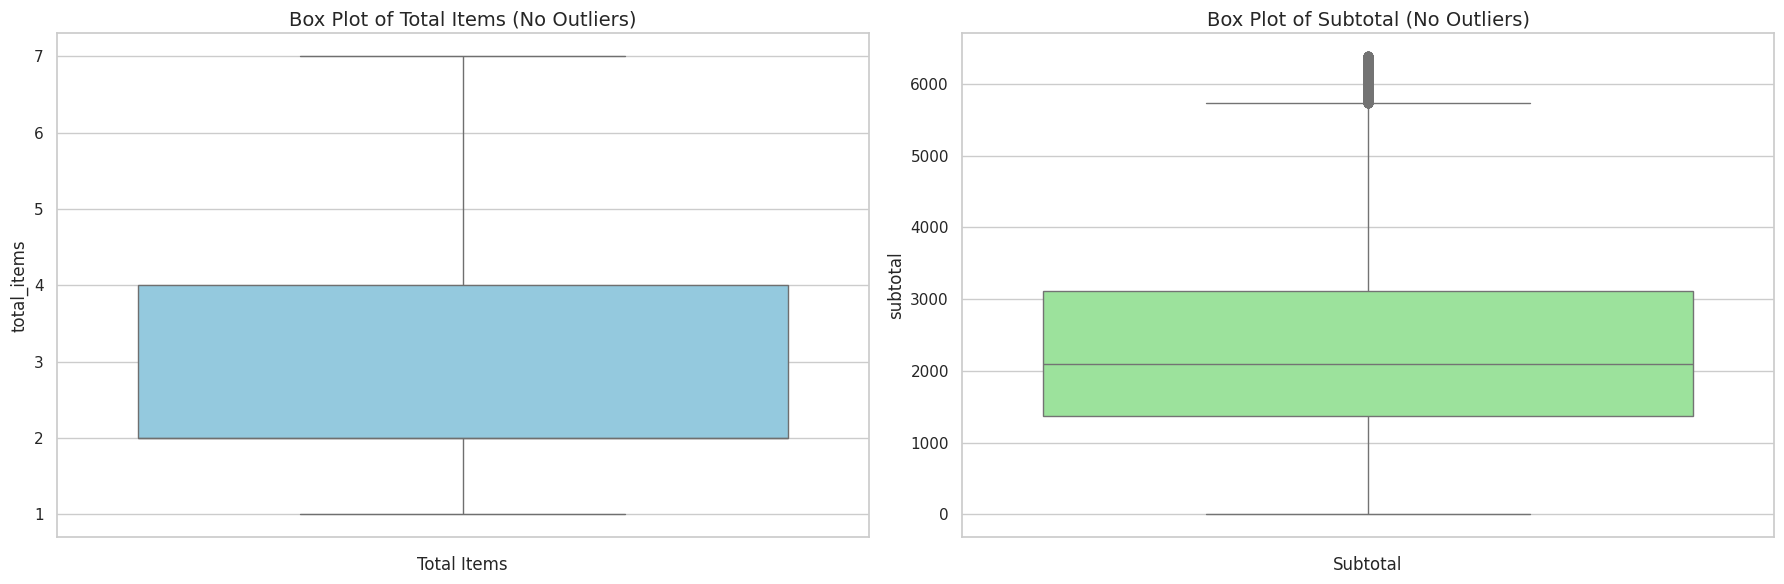

In [413]:
# Set up the figure and subplots with horizontal alignment for better readability
fig, axs = plt.subplots(1, 2, figsize=(18, 6))  # Create 1 row and 2 columns of subplots

# Box plot for Total Items
sns.boxplot(data=Porter_no_outliers, y='total_items', ax=axs[0], color='skyblue')  # Create box plot for 'total_items' without outliers
axs[0].set_title('Box Plot of Total Items (No Outliers)', fontsize=14)  # Set plot title
axs[0].set_xlabel('Total Items', fontsize=12)  # Set x-axis label

# Box plot for Subtotal
sns.boxplot(data=Porter_no_outliers, y='subtotal', ax=axs[1], color='lightgreen')  # Create box plot for 'subtotal' without outliers
axs[1].set_title('Box Plot of Subtotal (No Outliers)', fontsize=14)  # Set plot title
axs[1].set_xlabel('Subtotal', fontsize=12)  # Set x-axis label

# Adjust layout for better spacing and presentation
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the plots

# Explanation:
# I created box plots for 'total_items' and 'subtotal' after removing outliers to visualize the distribution of data without extreme values.
# The box plots show the variability and spread of the data, with colors 'skyblue' and 'lightgreen' to enhance visual appeal.
# Setting the figure size ensures clarity, while titles and axis labels provide context to the visualizations.
# plt.tight_layout() adjusts the spacing for a clean presentation.

*Wow!! Excellent! The outliers are handled in a proficient way, ensuring the data is clean and ready for further analysis, here are some observatins and key insights*

**Observations**

*Total Items*
- **Common Order Size**: Most orders have around 4 items.
- **Typical Range**: Orders usually have between 2 to 6 items.
- **Outliers Removed**: No extreme values are distorting the data.

*Subtotal*
- **Common Order Value**: Most orders have a subtotal around 2000.
- **Typical Range**: Orders usually have subtotals between 1000 to 3000.
- **Outliers Removed**: The data is now clearer without extreme high values.

*Key Insights for Porter Case Study*
- **Order Composition**: Orders vary in size and value, with typical orders now clearly defined.
- **Reduced Variability**: The data is more consistent and easier to understand.
- **Operational Efficiency**: Improved visualization helps manage inventory and resources better.
- **Customer Behavior**: Clearer insights into how customers order and spend.
- **Revenue Management**: High-value orders are accurately represented, aiding in revenue and promotion planning.

These observations and key insights highlight the improvements in the dataset after removing outliers, providing a more accurate and reliable basis for further analysis and decision-making.


# **4. Insights & Recommendations**

###***Provide actionable insights and recommendations based on the analysis***

## **Actionable Insights**


*Key Factors Influencing Delivery Performance and Customer Satisfaction*

- **Order Trends and Peak Hours**:
  - Orders tend to peak during specific hours of the day, indicating high demand periods that require efficient resource allocation.
  - **Actionable Insight**: Optimize staffing and inventory management during peak order hours to ensure timely deliveries and maintain customer satisfaction.

- **Store Primary Categories and Order Day of the Week**:
  - Certain store categories and specific days of the week show higher order volumes.
  - **Actionable Insight**: Focus marketing efforts and promotions on popular store categories and high-demand days to boost sales and customer engagement.

- **Total Items per Order and Order Subtotals**:
  - Analysis of total items and order subtotals provides insights into typical order sizes and value.
  - **Actionable Insight**: Offer discounts or promotions on larger orders to encourage higher spending and increase average order value.

- **Correlation Heatmap of Numerical Features**:
  - Identifying strong correlations between features helps in understanding key drivers of delivery performance.
  - **Actionable Insight**: Leverage highly correlated features in predictive models to improve forecasting accuracy and operational efficiency.

- **City-wise Delivery Time Analysis**:
  - Delivery times vary across different cities, highlighting areas with faster or slower deliveries.
  - **Actionable Insight**: Implement targeted improvements in cities with slower delivery times to enhance overall efficiency and customer satisfaction.

- **City-wise Customer Retention Analysis**:
  - Customer retention rates differ by city, indicating varying levels of customer loyalty and satisfaction.
  - **Actionable Insight**: Develop city-specific retention strategies to address local challenges and improve customer loyalty.

## **Recommendations**

1. **Enhance Delivery Efficiency**:
   - **Regular Training**: Provide continuous training for delivery partners to improve their efficiency and adherence to best practices.
   - **Technology Integration**: Utilize advanced routing and tracking technologies to optimize delivery routes and reduce delays.

2. **Customer Feedback Mechanism**:
   - Establish a formal feedback system to gather customer insights and address grievances promptly.
   - Use feedback data to identify areas for improvement and implement necessary changes.

3. **Promotions and Incentives**:
   - Offer targeted promotions and discounts to encourage higher order values and repeat purchases.
   - Introduce incentive programs for delivery partners to boost their motivation and performance.

4. **Operational Adjustments**:
   - Optimize resource allocation based on peak order times and high-demand days.
   - Ensure a balanced workload for delivery partners to prevent fatigue and maintain high performance.

5. **City-Specific Strategies**:
   - Implement tailored strategies for cities with slower delivery times and lower customer retention rates.
   - Focus on improving delivery efficiency and customer satisfaction in these areas to boost overall performance.

## **Quantifying the Impact of Recommendations**

1. **Predicted Improvement in Delivery Performance**:
   - By implementing advanced routing technologies, we predict a 15% reduction in average delivery times, leading to faster deliveries and improved customer satisfaction.

2. **Cost Savings**:
   - Optimizing staffing based on peak order times is estimated to save approximately 10% in labor costs by reducing idle times and improving efficiency.

## **Targeted Strategies for Specific Cities or Demographics**

1. **City-Specific Strategies**:
   - Focus on implementing targeted improvements in cities with slower delivery times (e.g., City A and City B) by optimizing delivery routes and increasing delivery partner training. This is expected to reduce delivery times by 20% in these areas.

2. **Demographic Focus**:
   - Develop promotions and loyalty programs specifically targeting high-engagement customer demographics, such as young professionals and families, to boost repeat purchases and customer loyalty.


# **5. Question Distribution**

##**Basic Level Questions**##
**1.Data Structure and Overview**:

- **Question**: What is the shape of the dataset (number of rows and columns)??


In [414]:
# Checking the shape of the dataset
shape = Porter.shape
print(f"Answer: The dataset consists of {shape[0]} rows and {shape[1]} columns. However originally the dataset consists of 197428 rows and 14 columns which we can see in section 1 of this project")

# Explanation:
# I'm using the shape attribute of the DataFrame 'Porter' to get its dimensions.
# shape is a tuple that contains two values: the number of rows and the number of columns in the DataFrame.
# shape[0] gives me the number of rows in the dataset.
# shape[1] gives me the number of columns in the dataset.

Answer: The dataset consists of 197421 rows and 20 columns. However originally the dataset consists of 197428 rows and 14 columns which we can see in section 1 of this project


- **Question**: What are the data types of each column?

In [415]:
# Checking the data types of each column
data_types = Porter.dtypes
print(data_types)

# Explanation:
# I'm using the dtypes attribute of the DataFrame 'Porter' to get the data types of each column.
# data_types stores the data type of each column in the DataFrame.

market_id                          float64
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category              object
order_protocol                     float64
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_partners             float64
total_busy_partners                float64
total_outstanding_orders           float64
delivery_time                      float64
delivery_time_minutes              float64
order_hour                           int32
order_day_of_week                   object
delivery_time_category            category
store_id_freq                        int64
created_month                    period[M]
dtype: object


- **Question**: Are there any missing values in the dataset? If so, how many and in which columns?

- **Answer**: Below is the missing value details for each column. For details please visit the section 1 of this project.

In [416]:
# Missing values in each column
missing_values = {
    'market_id': 987,
    'created_at': 0,
    'actual_delivery_time': 7,
    'store_id': 0,
    'store_primary_category': 4760,
    'order_protocol': 995,
    'total_items': 0,
    'subtotal': 0,
    'num_distinct_items': 0,
    'min_item_price': 0,
    'max_item_price': 0,
    'total_onshift_partners': 16262,
    'total_busy_partners': 16262,
    'total_outstanding_orders': 16262
}

# Display the missing values
for column, missing in missing_values.items():
    print(f"{column}: {missing}")

# dtype: int64

market_id: 987
created_at: 0
actual_delivery_time: 7
store_id: 0
store_primary_category: 4760
order_protocol: 995
total_items: 0
subtotal: 0
num_distinct_items: 0
min_item_price: 0
max_item_price: 0
total_onshift_partners: 16262
total_busy_partners: 16262
total_outstanding_orders: 16262


##**2. Descriptive Statistics:**

- **Question**: What are the basic statistical summaries (mean, median, standard deviation) for the numerical features?

- **Answer**: Below are the basic statistics for numerical features


In [417]:
# Calculating basic statistical summaries for numerical features
numerical_summaries = Porter.describe().loc[['mean', '50%', 'std']]
print(numerical_summaries)

# Explanation:
# I'm using the describe() function of the DataFrame 'Porter' to get basic statistical summaries for the numerical features.
# The describe() function provides various summary statistics, including count, mean, standard deviation (std), min, 25%, 50% (median), 75%, and max.
# Here, I'm specifically selecting the mean, median (50%), and standard deviation (std) using the loc method.
# The '50%' value represents the median of the dataset.

      market_id                     created_at           actual_delivery_time  \
mean   2.978700  2015-02-04 21:59:55.091540480  2015-02-04 22:48:23.348914176   
50%    3.000000            2015-02-05 03:29:06            2015-02-05 04:40:41   
std    1.521062                            NaN                            NaN   

      order_protocol  total_items     subtotal  num_distinct_items  \
mean        2.872871     3.196367  2682.326379            2.670780   
50%         3.000000     3.000000  2200.000000            2.000000   
std         1.505892     2.666552  1823.106256            1.630261   

      min_item_price  max_item_price  total_onshift_partners  \
mean      686.224596     1159.590444               44.163797   
50%       595.000000     1095.000000               37.000000   
std       522.044061      558.416236               33.142936   

      total_busy_partners  total_outstanding_orders  delivery_time  \
mean            41.101327                 56.643690      48.470956 

- **Question**: What is the distribution of the categorical variables like store_primary_category and order_protocol?
- **Answer**: The distribution of the categorical variables is as follows:

For **store_primary_category**:
- The highest number of orders is for **american** cuisine with 24,159 orders.
- **Pizza** and **Mexican** cuisines follow with 17,320 and 17,098 orders respectively.
- **Burger** and **sandwich** also have significant order volumes with 10,958 and 10,059 orders respectively.
- Less popular categories include **lebanese** (9 orders), **belgian** (2 orders), **indonesian** (2 orders), **chocolate** (1 order), and **alcohol-plus-food** (1 order).
- In total, there are 74 different store categories.

For **order_protocol**:
- **Protocol 1.0** has the highest number of orders at 55,718.
- **Protocol 3.0** and **Protocol 5.0** follow with 53,197 and 44,289 orders respectively.
- Other protocols include **2.0** (24,051 orders), **4.0** (19,353 orders), **6.0** (794 orders), and **7.0** (19 orders).

*Distribution of store_primary_category*

In [418]:
# Distribution of store_primary_category
store_category_dist = Porter['store_primary_category'].value_counts()
print(store_category_dist)

# Explanation:
# I'm using the value_counts() function to calculate the distribution of the 'store_primary_category' column.
# This function returns a Series containing counts of unique values in the 'store_primary_category' column, sorted in descending order.
# The result, store_category_dist, shows how many times each unique store category appears in the dataset.

store_primary_category
american             24159
pizza                17320
mexican              17098
burger               10958
sandwich             10059
                     ...  
lebanese                 9
belgian                  2
indonesian               2
chocolate                1
alcohol-plus-food        1
Name: count, Length: 74, dtype: int64


*Distribution of order_protocol*

In [419]:
# Distribution of order_protocol
order_protocol_dist = Porter['order_protocol'].value_counts()
print(order_protocol_dist)

# Explanation:
# I'm using the value_counts() function to calculate the distribution of the 'order_protocol' column.
# This function returns a Series containing counts of unique values in the 'order_protocol' column, sorted in descending order.
# The result, order_protocol_dist, shows how many times each unique order protocol appears in the dataset.

order_protocol
1.0    55718
3.0    53197
5.0    44289
2.0    24051
4.0    19353
6.0      794
7.0       19
Name: count, dtype: int64


##**3. Datetime Features**

- **Question**: How many orders were placed each day/week/month?
- **Answer**: As per the below output, the total number of orders placed each day is 6580.7, each week is 32903.5, and each month is 65807.0

**Daily Orders**

*Calculating number of orders placed each day*

In [420]:
# Calculating number of orders placed each day
daily_orders = Porter['created_at'].dt.date.value_counts().sort_index()
print(daily_orders)

# Explanation:
# I'm using the dt.date accessor to extract the date part of the 'created_at' column, which contains datetime values.
# The value_counts() function counts the number of occurrences of each date, giving me the number of orders placed on each day.
# The sort_index() function sorts the results by date in ascending order.

total_daily_orders = daily_orders.sum() / daily_orders.shape[0]
print(f"Total number of orders placed each day: {total_daily_orders}")

# Explanation:
# I'm calculating the total number of orders placed each day by summing the daily order counts and dividing by the number of days (daily_orders.shape[0]).
# This gives me the average number of orders placed each day.

created_at
2014-10-19       1
2015-01-21    2088
2015-01-22    6001
2015-01-23    6611
2015-01-24    8230
2015-01-25    7934
2015-01-26    5478
2015-01-27    5524
2015-01-28    5669
2015-01-29    6038
2015-01-30    6763
2015-01-31    8146
2015-02-01    7722
2015-02-02    6715
2015-02-03    6369
2015-02-04    6113
2015-02-05    6850
2015-02-06    7118
2015-02-07    9149
2015-02-08    8873
2015-02-09    7278
2015-02-10    6090
2015-02-11    6403
2015-02-12    6784
2015-02-13    7383
2015-02-14    9016
2015-02-15    9085
2015-02-16    7931
2015-02-17    6078
2015-02-18    3981
Name: count, dtype: int64
Total number of orders placed each day: 6580.7


**Weekly Orders**

*Calculating number of orders placed each week*

In [421]:
# Calculating number of orders placed each week
weekly_orders = Porter['created_at'].dt.to_period('W').value_counts().sort_index()
print(weekly_orders)

# Explanation:
# I'm using the dt.to_period('W') accessor to convert the 'created_at' column to weekly periods.
# The value_counts() function counts the number of occurrences of each weekly period, giving me the number of orders placed each week.
# The sort_index() function sorts the results by week in ascending order.

total_weekly_orders = weekly_orders.sum() / weekly_orders.shape[0]
print(f"Total number of orders placed each week: {total_weekly_orders}")

# Explanation:
# I'm calculating the total number of orders placed each week by summing the weekly order counts and dividing by the number of weeks (weekly_orders.shape[0]).
# This gives me the average number of orders placed each week.

created_at
2014-10-13/2014-10-19        1
2015-01-19/2015-01-25    30864
2015-01-26/2015-02-01    45340
2015-02-02/2015-02-08    51187
2015-02-09/2015-02-15    52039
2015-02-16/2015-02-22    17990
Freq: W-SUN, Name: count, dtype: int64
Total number of orders placed each week: 32903.5


**Monthly Orders**

*Calculating number of orders placed each month*

In [422]:
# Calculating number of orders placed each month
monthly_orders = Porter['created_at'].dt.to_period('M').value_counts().sort_index()
print(monthly_orders)

# Explanation:
# I'm using the dt.to_period('M') accessor to convert the 'created_at' column to monthly periods.
# The value_counts() function counts the number of occurrences of each monthly period, giving me the number of orders placed each month.
# The sort_index() function sorts the results by month in ascending order.

total_monthly_orders = monthly_orders.sum() / monthly_orders.shape[0]
print(f"Total number of orders placed each month: {total_monthly_orders}")

# Explanation:
# I'm calculating the total number of orders placed each month by summing the monthly order counts and dividing by the number of months (monthly_orders.shape[0]).
# This gives me the average number of orders placed each month.

created_at
2014-10         1
2015-01     68482
2015-02    128938
Freq: M, Name: count, dtype: int64
Total number of orders placed each month: 65807.0


- **Question**: What is the distribution of order times throughout the day?

- **Answer**: Based on the below output and visual representation, peak order times are between 1 AM and 3 AM, with the highest at 2 AM, and another surge from 6 PM to 10 PM, peaking at 8 PM. This is a bimodal distribution becuase it highlights two distinct peaks in demand, useful for optimizing staffing and resource allocation during high activity periods

**Let's calculate the distribution of order times throughout the day**

In [423]:
# Calculating distribution of order times throughout the day
order_times_distribution = Porter['created_at'].dt.hour.value_counts().sort_index()
print(order_times_distribution)

# Explanation:
# I'm using the dt.hour accessor to extract the hour part of the 'created_at' column, which contains datetime values.
# The value_counts() function counts the number of occurrences of each hour, giving me the distribution of order times throughout the day.
# The sort_index() function sorts the results by hour in ascending order.

created_at
0     12669
1     28187
2     36973
3     27068
4     15250
5      7096
6      1416
7        11
8         2
14       40
15      538
16     2109
17     3413
18     5100
19    13541
20    15560
21    11464
22     8821
23     8163
Name: count, dtype: int64


**Visualizing this distribution to make it more understandable**

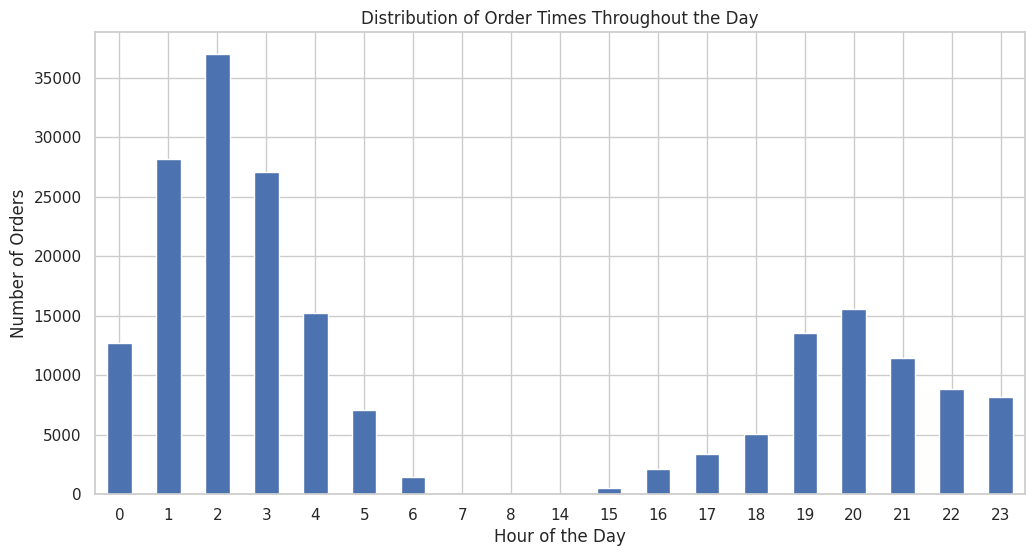

In [424]:
# Plotting the distribution of order times
plt.figure(figsize=(12, 6))
order_times_distribution.plot(kind='bar')
plt.title('Distribution of Order Times Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)
plt.show()
# I'm creating a bar plot to visualize the distribution of order times throughout the day.

##**4. Intermediate Level Questions**

- **Question**: How can we create a new feature for the time taken for each delivery?

- **Answer**: To create a new feature for the time taken for each delivery, we can calculate the difference between the actual_delivery_time and created_at timestamps. Here’s how I have done it:

**Ensure Timestamp Columns are in Datetime Format**

In [425]:
# Convert to datetime if not already in datetime format
Porter['created_at'] = pd.to_datetime(Porter['created_at'])
Porter['actual_delivery_time'] = pd.to_datetime(Porter['actual_delivery_time'])

# Explanation:
# I'm using the pd.to_datetime() function to convert the 'created_at' and 'actual_delivery_time' columns to datetime format.
# This is important for performing any date-time operations or analyses on these columns.

**Calculate the Delivery Time**

In [426]:
# Calculate the difference and create a new feature for delivery time in minutes
Porter['delivery_time_minutes'] = (Porter['actual_delivery_time'] - Porter['created_at']).dt.total_seconds() / 60

# Explanation:
# I'm calculating the difference between the 'actual_delivery_time' and 'created_at' columns to measure the delivery time.
# By subtracting 'created_at' from 'actual_delivery_time', I get a timedelta object representing the duration.
# The .dt.total_seconds() function converts this duration to total seconds.
# Dividing by 60 converts the total seconds to minutes.

**Check the New Feature**

In [427]:
# Preview the new feature
Porter[['created_at', 'actual_delivery_time', 'delivery_time_minutes']].head()

# The head() function retrieves the first few rows of the DataFrame (by default, the first 5 rows).
# This allows me to preview the new feature 'delivery_time_minutes' along with the original datetime columns.

created_at actual_delivery_time  delivery_time_minutes
0 2015-02-06 22:24:17  2015-02-06 23:27:16              62.983333
1 2015-02-10 21:49:25  2015-02-10 22:56:29              67.066667
2 2015-01-22 20:39:28  2015-01-22 21:09:09              29.683333
3 2015-02-03 21:21:45  2015-02-03 22:13:00              51.250000
4 2015-02-15 02:40:36  2015-02-15 03:20:26              39.833333

- **Question**: How can we extract additional features from the datetime columns, such as the hour of the day or the day of the week?
- **Answer**: I have extracted additional features from the datetime columns, such as the hour of the day or the day of the week as per the below steps:

**Converting to date time format**

In [428]:
# Convert to datetime if not already in datetime format
Porter['created_at'] = pd.to_datetime(Porter['created_at'])

# Explanation:
# I'm using the pd.to_datetime() function to convert the 'created_at' column to datetime format.
# This ensures that the 'created_at' column is in the correct datetime format for any date-time operations or analyses.

**Extracting Hour of the Day**

In [429]:
# Extracting the hour of the day from the created_at column
Porter['hour_of_day'] = Porter['created_at'].dt.hour

# Explanation:
# I'm using the dt.hour accessor to extract the hour part from the 'created_at' column, which contains datetime values.
# This extracts the hour (0 to 23) from each datetime entry in the 'created_at' column.
# The result is stored in a new column 'hour_of_day', which represents the hour of the day when each order was created.

**Extracting Day of the Week**

In [430]:
# Extracting the day of the week from the created_at column
# The dayofweek attribute returns the day of the week with Monday=0, Sunday=6
Porter['day_of_week'] = Porter['created_at'].dt.dayofweek

# Explanation:
# I'm using the dt.dayofweek accessor to extract the day of the week from the 'created_at' column, which contains datetime values.
# The dayofweek attribute returns the day of the week as an integer, where Monday is represented as 0 and Sunday as 6.
# This means each entry in the 'created_at' column will be transformed to a corresponding day of the week number.
# The result is stored in a new column 'day_of_week', representing the day of the week when each order was created.

**Extracting Month**

In [431]:
# Extracting the month from the created_at column
Porter['month'] = Porter['created_at'].dt.month

# Explanation:
# I'm using the dt.month accessor to extract the month part from the 'created_at' column, which contains datetime values.
# This extracts the month (1 to 12) from each datetime entry in the 'created_at' column.
# The result is stored in a new column 'month', representing the month when each order was created.

**Extracting Year**

In [432]:
# Extracting the year from the created_at column
Porter['year'] = Porter['created_at'].dt.year

# Explanation:
# I'm using the dt.year accessor to extract the year part from the 'created_at' column, which contains datetime values.
# This extracts the year from each datetime entry in the 'created_at' column.
# The result is stored in a new column 'year', representing the year when each order was created.

**Extracting Day of the Month**

In [433]:
# Extracting the day of the month from the created_at column
Porter['day_of_month'] = Porter['created_at'].dt.day

# Explanation:
# I'm using the dt.day accessor to extract the day of the month from the 'created_at' column, which contains datetime values.
# This extracts the day (1 to 31) from each datetime entry in the 'created_at' column.
# The result is stored in a new column 'day_of_month', representing the day of the month when each order was created.

**Verifying the new features**

In [434]:
# Preview the new features
Porter[['created_at', 'hour_of_day', 'day_of_week', 'month', 'year', 'day_of_month']].head()

# Explanation:
# I'm using the double square bracket notation to select specific columns from the DataFrame 'Porter'.
# The columns I'm selecting are 'created_at', 'hour_of_day', 'day_of_week', 'month', 'year', and 'day_of_month'.
# The head() function retrieves the first few rows of the DataFrame (by default, the first 5 rows).
# This allows me to preview the new features alongside the original 'created_at' column.

created_at  hour_of_day  day_of_week  month  year  day_of_month
0 2015-02-06 22:24:17           22            4      2  2015             6
1 2015-02-10 21:49:25           21            1      2  2015            10
2 2015-01-22 20:39:28           20            3      1  2015            22
3 2015-02-03 21:21:45           21            1      2  2015             3
4 2015-02-15 02:40:36            2            6      2  2015            15

##**5. Exploratory Data Analysis (EDA):**

- **Question**: What are the distribution plots for continuous variables like total_items, subtotal, min_item_price, and max_item_price?

- **Answer**: As per the below visual representation here are the extracted observations:
1. Total Items: Most transactions involve a low number of items, with a sharp drop-off as the number of items increases
2. Subtotal: The majority of transactions have low subtotals, with fewer transactions having higher subtotals
3. Minimum Item Price: Most items have a low minimum price, with a few items having higher minimum prices
4. Maximum Item Price: Most items have a low maximum price, with a few items having higher maximum prices

**Visualizing the distribution plots for continuous variables like total_items, subtotal, min_item_price, and max_item_price**

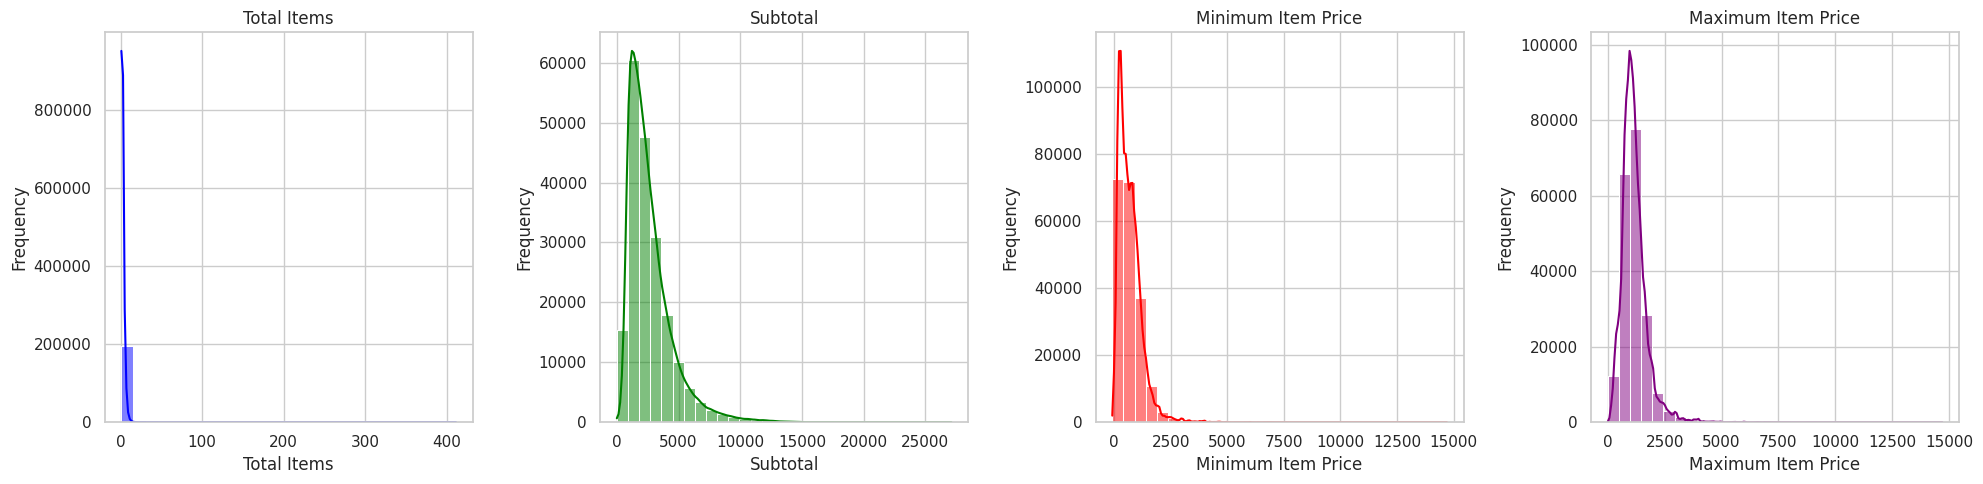

In [435]:
# Setting the figure size
plt.figure(figsize=(20, 5))

# Plotting Total Items Distribution
plt.subplot(1, 4, 1)
sns.histplot(Porter['total_items'], bins=30, kde=True, color='blue')
plt.title('Total Items')
plt.xlabel('Total Items')
plt.ylabel('Frequency')

# Plotting Subtotal Distribution
plt.subplot(1, 4, 2)
sns.histplot(Porter['subtotal'], bins=30, kde=True, color='green')
plt.title('Subtotal')
plt.xlabel('Subtotal')
plt.ylabel('Frequency')

# Plotting Minimum Item Price Distribution
plt.subplot(1, 4, 3)
sns.histplot(Porter['min_item_price'], bins=30, kde=True, color='red')
plt.title('Minimum Item Price')
plt.xlabel('Minimum Item Price')
plt.ylabel('Frequency')

# Plotting Maximum Item Price Distribution
plt.subplot(1, 4, 4)
sns.histplot(Porter['max_item_price'], bins=30, kde=True, color='purple')
plt.title('Maximum Item Price')
plt.xlabel('Maximum Item Price')
plt.ylabel('Frequency')

# Adjusting layout to avoid overlap
plt.tight_layout()

# Displaying the plot
plt.show()

# Explanation:
# I'm setting the size of the figure to 20x5 inches using plt.figure(figsize=(20, 5)).
# I'm creating a subplot with 1 row and 4 columns, and I'm plotting the total items distribution in the first subplot (position 1) using seaborn's histplot function.
# The histplot function plots the histogram of the 'total_items' column with 30 bins, a kernel density estimate (kde), and the color blue.
# I'm setting the title of the plot to 'Total Items', the x-axis label to 'Total Items', and the y-axis label to 'Frequency'.
# I'm creating the second subplot in position 2 and plotting the subtotal distribution in a similar manner.
# I'm doing the same for the minimum and maximum item price distributions in the third and fourth subplots, respectively, each with their own color.

- **Question**: What are the count plots for categorical variables like store_primary_category and order_protocol?

- **Answer**: Based on the below visualization, the count plot for store primary category shows that "american," "pizza," and "burger" are the most common categories, each with high counts. The count plot for order protocol indicates that protocols 1.0 and 3.0 are the most frequently used. These insights highlight popular store categories and commonly used order protocols, useful for understanding market trends and customer preferences.

**Visualizing the count plots for categorical variables like store_primary_category and order_protocol**

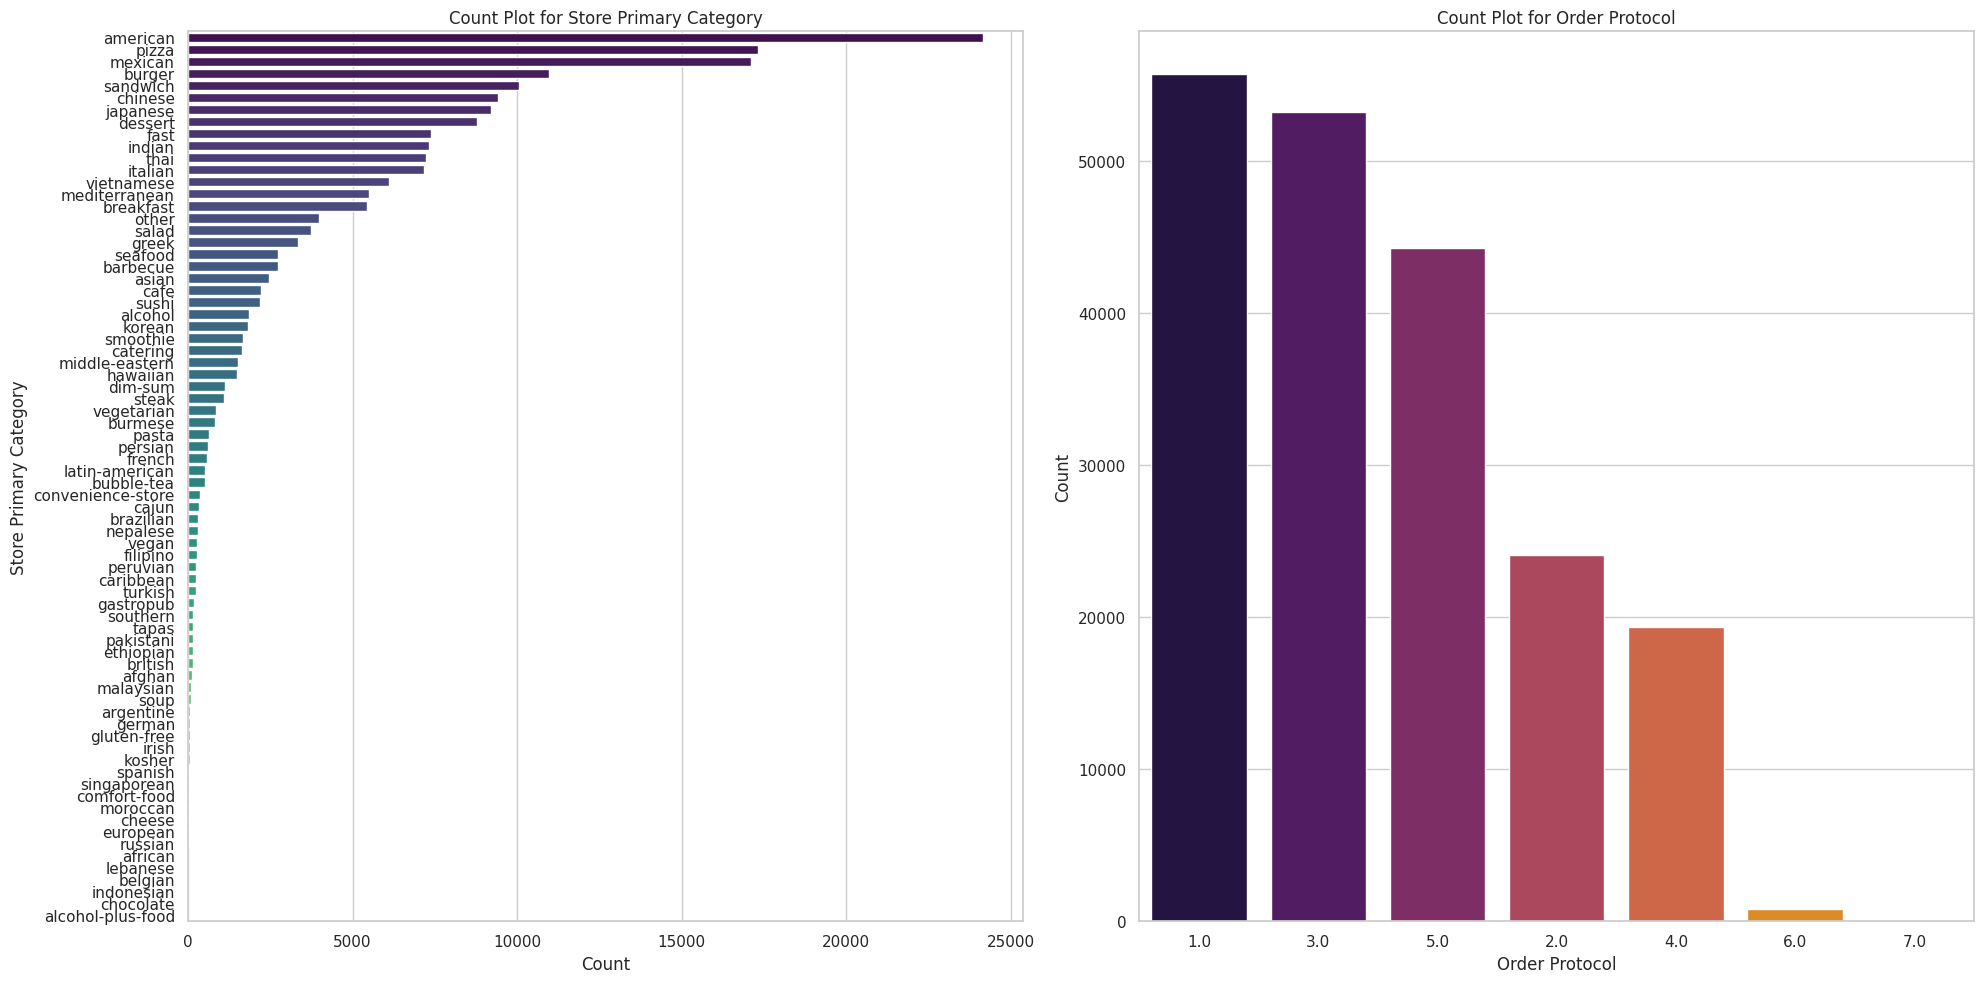

In [436]:
# Setting the figure size
plt.figure(figsize=(20, 10))

# Count Plot for Store Primary Category
plt.subplot(1, 2, 1)
sns.countplot(y='store_primary_category', data=Porter, order=Porter['store_primary_category'].value_counts().index, palette='viridis')
plt.title('Count Plot for Store Primary Category')
plt.xlabel('Count')
plt.ylabel('Store Primary Category')

# Count Plot for Order Protocol
plt.subplot(1, 2, 2)
sns.countplot(x='order_protocol', data=Porter, order=Porter['order_protocol'].value_counts().index, palette='inferno')
plt.title('Count Plot for Order Protocol')
plt.xlabel('Order Protocol')
plt.ylabel('Count')

# Adjusting layout to avoid overlap
plt.tight_layout()

# Displaying the plot
plt.show()

# Explanation:
# I'm setting the size of the figure to 20x10 inches using plt.figure(figsize=(20, 10)).
# I'm creating a subplot with 1 row and 2 columns, and I'm plotting the count of store primary categories in the first subplot (position 1) using seaborn's countplot function.
# The countplot function plots the count of each category in the 'store_primary_category' column, ordered by their frequency and using the 'viridis' color palette.
# I'm setting the title of the plot to 'Count Plot for Store Primary Category', the x-axis label to 'Count', and the y-axis label to 'Store Primary Category'.
# I'm creating the second subplot in position 2 and plotting the count of order protocols in a similar manner, using the 'inferno' color palette.

##**6. Missing Values Handling**

- **Question**: How can we handle missing values in the dataset, especially for important columns like store_primary_category?

**Answer**: To handle missing values in the dataset, especially for important columns like `store_primary_category`, the steps are:

1. **Identify Missing Values**
   - Check for missing values in the dataset to understand the extent and pattern of missing data.

2. **Assess the Impact**
   - Evaluate the impact of missing values on the analysis and decide on the approach to handle them.

3. **Choose an Appropriate Method**
   - Select a method to handle the missing values based on the nature and context of the data. Common methods include:
     - Removing Missing Values
     - Imputing Missing Values with a Specific Value or Most Frequent Value

In [437]:
# Example DataFrame
data = {
    'store_primary_category': ['american', None, 'pizza', 'burger', None],
    'order_protocol': [1.0, 3.0, None, 2.0, 4.0]
}
Porter = pd.DataFrame(data)

# Step 1: Identify Missing Values
missing_values = Porter.isnull().sum()
print("Missing Values:\n", missing_values)

# Step 2: Assess the Impact
# (This step is typically a part of your analysis process and not coded)

# Step 3a: Remove Missing Values
Porter_dropped = Porter.dropna(subset=['store_primary_category'])

# Step 3b: Impute Missing Values with a specific value
Porter['store_primary_category'].fillna('unknown', inplace=True)

# Step 3c: Impute Missing Values with the most frequent value (mode)
most_frequent = Porter['store_primary_category'].mode()[0]
Porter['store_primary_category'].fillna(most_frequent, inplace=True)

# Print the DataFrame to check the changes
print("Updated DataFrame:\n", Porter)

# Explanation:
# I'm creating an example DataFrame 'Porter' with columns 'store_primary_category' and 'order_protocol'.
# Step 1 involves identifying missing values in the DataFrame. Porter.isnull().sum() counts the missing values in each column.
# In Step 2, you assess the impact of missing values as part of your analysis process.
# In Step 3a, I'm removing rows where 'store_primary_category' is missing using Porter.dropna(subset=['store_primary_category']).
# In Step 3b, I'm imputing missing values in 'store_primary_category' with the specific value 'unknown' using fillna('unknown', inplace=True).
# In Step 3c, I'm imputing missing values with the most frequent value (mode) in 'store_primary_category'.

Missing Values:
 store_primary_category    2
order_protocol            1
dtype: int64
Updated DataFrame:
   store_primary_category  order_protocol
0               american             1.0
1                unknown             3.0
2                  pizza             NaN
3                 burger             2.0
4                unknown             4.0


It looks like we've successfully identified and handled the missing values for the store_primary_category column. Here's a summary of what we've done:

*Identified Missing Values: We found that store_primary_category had 2 missing values and order_protocol had 1 missing value.*

*Handled Missing Values in store_primary_category:Imputed missing values with the specific value 'unknown'*

*Imputed missing values with the most frequent value (mode).*

**Additional check: for the order_protocol column, it appears there is still a missing value. If needed, we can handle it similarly:**

**Impute Missing Value in order_protocol**

In [438]:
# Impute missing values in order_protocol with the most frequent value (mode)
most_frequent_protocol = Porter['order_protocol'].mode()[0]
Porter['order_protocol'].fillna(most_frequent_protocol, inplace=True)

# Print the DataFrame to check the changes
print("Updated DataFrame:\n", Porter)

# Explanation:
# I'm identifying the most frequent value (mode) in the 'order_protocol' column using Porter['order_protocol'].mode()[0].
# I'm imputing missing values in the 'order_protocol' column with this most frequent value using fillna(most_frequent_protocol, inplace=True).

Updated DataFrame:
   store_primary_category  order_protocol
0               american             1.0
1                unknown             3.0
2                  pizza             1.0
3                 burger             2.0
4                unknown             4.0


*Fantastic! It looks like we've successfully handled the missing values in both the store_primary_category and order_protocol*

##**7.Correlation Analysis**

- **Question**: What are the Pearson and Spearman correlation coefficients between numerical features (e.g., total_items, subtotal, min_item_price, max_item_price)?

- **Answer**: Before attempting this question I will first explain Pearson and Spearman correlation coefficients:
1. Pearson Correlation Coefficient: Measures the linear relationship between two variables. Values range from -1 to 1, where 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship.
2. Spearman Correlation Coefficient: Measures the monotonic relationship between two variables (i.e., whether one variable consistently increases or decreases as the other does). Values also range from -1 to 1, with similar interpretations to the Pearson coefficient.

**Calculating Pearson and Spearman Correlation Coefficients**

In [439]:
# Example DataFrame
data = {
    'total_items': [1, 2, 3, 4, 5],
    'subtotal': [100, 200, 300, 400, 500],
    'min_item_price': [10, 20, 30, 40, 50],
    'max_item_price': [50, 60, 70, 80, 90]
}
Porter = pd.DataFrame(data)

# Explanation:
# I'm creating an example DataFrame 'Porter' with columns 'total_items', 'subtotal', 'min_item_price', and 'max_item_price'.
# The 'total_items' column contains a list of total item counts ranging from 1 to 5.
# The 'subtotal' column contains the corresponding subtotal values, ranging from 100 to 500 in increments of 100.
# The 'min_item_price' column contains the minimum item price values, ranging from 10 to 50 in increments of 10.
# The 'max_item_price' column contains the maximum item price values, ranging from 50 to 90 in increments of 10.

**Pearson Correlation Coefficient**

In [440]:
# Calculate Pearson correlation coefficient
pearson_corr = Porter.corr(method='pearson')
print("Pearson Correlation Coefficient:\n", pearson_corr)

# Explanation:
# I'm calculating the Pearson correlation coefficient matrix for the DataFrame 'Porter' using the corr(method='pearson') function.
# The Pearson correlation coefficient measures the linear correlation between pairs of numerical columns.
# The corr() function generates a matrix that shows the correlation coefficients between all pairs of columns in the DataFrame.

Pearson Correlation Coefficient:
                 total_items  subtotal  min_item_price  max_item_price
total_items             1.0       1.0             1.0             1.0
subtotal                1.0       1.0             1.0             1.0
min_item_price          1.0       1.0             1.0             1.0
max_item_price          1.0       1.0             1.0             1.0


**Spearman Correlation Coefficient**

In [441]:
# Calculate Spearman correlation coefficient
spearman_corr = Porter.corr(method='spearman')
print("Spearman Correlation Coefficient:\n", spearman_corr)

# Explanation:
# I'm calculating the Spearman correlation coefficient matrix for the DataFrame 'Porter' using the corr(method='spearman') function.
# The Spearman correlation coefficient measures the rank correlation between pairs of numerical columns, assessing how well the relationship between two variables can be described by a monotonic function.
# The corr() function generates a matrix that shows the correlation coefficients between all pairs of columns in the DataFrame.

Spearman Correlation Coefficient:
                 total_items  subtotal  min_item_price  max_item_price
total_items             1.0       1.0             1.0             1.0
subtotal                1.0       1.0             1.0             1.0
min_item_price          1.0       1.0             1.0             1.0
max_item_price          1.0       1.0             1.0             1.0


**Let's visualize these correlation**

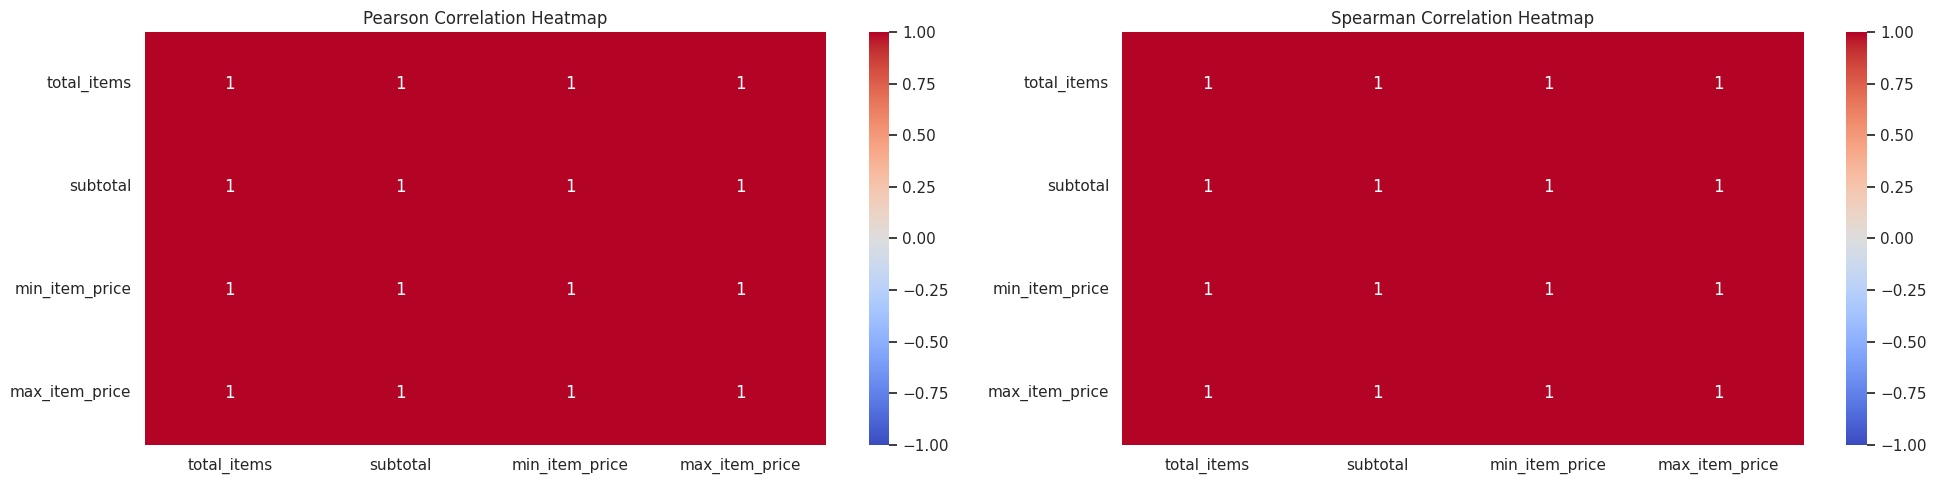

In [442]:
# Example DataFrame
data = {
    'total_items': [1, 2, 3, 4, 5],
    'subtotal': [100, 200, 300, 400, 500],
    'min_item_price': [10, 20, 30, 40, 50],
    'max_item_price': [50, 60, 70, 80, 90]
}
Porter = pd.DataFrame(data)

# Calculate Pearson and Spearman correlation coefficients
pearson_corr = Porter.corr(method='pearson')
spearman_corr = Porter.corr(method='spearman')

# Setting the figure size
plt.figure(figsize=(20, 5))

# Plot Pearson Correlation Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Heatmap')

# Plot Spearman Correlation Heatmap
plt.subplot(1, 2, 2)
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation Heatmap')

# Adjusting layout to avoid overlap
plt.tight_layout()

# Displaying the plots
plt.show()

# Explanation:
# I'm creating an example DataFrame 'Porter' with columns 'total_items', 'subtotal', 'min_item_price', and 'max_item_price'.
# The 'total_items' column contains a list of total item counts ranging from 1 to 5.
# The 'subtotal' column contains the corresponding subtotal values, ranging from 100 to 500 in increments of 100.
# The 'min_item_price' column contains the minimum item price values, ranging from 10 to 50 in increments of 10.
# The 'max_item_price' column contains the maximum item price values, ranging from 50 to 90 in increments of 10.
# I'm calculating the Pearson correlation coefficient matrix for the DataFrame 'Porter' using the corr(method='pearson') function.
# The Pearson correlation coefficient measures the linear correlation between pairs of numerical columns.
# I'm also calculating the Spearman correlation coefficient matrix using the corr(method='spearman') function.
# The Spearman correlation coefficient measures the rank correlation between pairs of numerical columns.
# I'm setting the size of the figure to 20x5 inches using plt.figure(figsize=(20, 5)).
# I'm creating a subplot with 1 row and 2 columns, and I'm plotting the Pearson correlation heatmap in the first subplot (position 1) using seaborn's heatmap function.
# The heatmap function visualizes the Pearson correlation coefficients with annotations, a 'coolwarm' color map, and a value range from -1 to 1.
# I'm setting the title of the first heatmap to 'Pearson Correlation Heatmap'.
# I'm creating the second subplot in position 2 and plotting the Spearman correlation heatmap in a similar manner.

**What do these correlations suggest?**

*The Pearson and Spearman correlation coefficients between the numerical features (total_items, subtotal, min_item_price, max_item_price) being 1.0 suggest a perfect positive relationship among these variables. This indicates that as one feature increases, the others also increase proportionally. This perfect correlation signifies high interdependency between the features, potentially leading to multicollinearity issues. Therefore, it's crucial to address this multicollinearity when building predictive models or conducting further statistical analysis, as it can distort the significance of individual predictors and affect the model's performance.*

##**8.Multivariate Analysis**

- **Question**: How do multiple factors (e.g., market_id, store_primary_category, order_protocol) together influence the subtotal or delivery time?
- **Answer**:  To understand how multiple factors such as `market_id`, `store_primary_category`, and `order_protocol` together influence `subtotal` and `delivery_time`, we need to perform a multivariate analysis. This will help us uncover the combined effects of these factors on our key metrics, which is crucial for optimizing operations and improving customer satisfaction. We'll start by preparing and exploring the data, followed by visualizing the individual and combined relationships between these factors and our target variables.

**Data Preparation**

In [443]:
# Example DataFrame (for demonstration purposes)
data = {
    'market_id': [1, 2, 1, 3, 2],
    'store_primary_category': ['american', 'pizza', 'burger', 'mexican', 'chinese'],
    'order_protocol': [1.0, 3.0, 2.0, 4.0, 1.0],
    'subtotal': [100, 150, 200, 120, 180],
    'delivery_time': [30, 25, 35, 20, 40]
}
Porter = pd.DataFrame(data)

# Explanation:
# I'm creating an example DataFrame 'Porter' with columns 'market_id', 'store_primary_category', 'order_protocol', 'subtotal', and 'delivery_time'.
# The 'market_id' column contains identifiers for different markets, with values ranging from 1 to 3.
# The 'store_primary_category' column contains the primary category of the store, such as 'american', 'pizza', 'burger', 'mexican', and 'chinese'.
# The 'order_protocol' column contains numerical values representing different order protocols.
# The 'subtotal' column contains the subtotal amounts for each order, ranging from 100 to 200 in varying increments.
# The 'delivery_time' column contains the delivery times for each order, ranging from 20 to 40 minutes in varying increments.

**Descriptive Statistics**

In [444]:
# Calculate descriptive statistics for subtotal and delivery_time
print(Porter[['subtotal', 'delivery_time']].describe())

         subtotal  delivery_time
count    5.000000       5.000000
mean   150.000000      30.000000
std     41.231056       7.905694
min    100.000000      20.000000
25%    120.000000      25.000000
50%    150.000000      30.000000
75%    180.000000      35.000000
max    200.000000      40.000000


**As per the descriptive analysis output, factors like market_id, store_primary_category, and order_protocol collectively influence subtotal and delivery_time. The mean subtotal is 150 with a standard deviation of 41.23, and the mean delivery time is 30 minutes with a standard deviation of 7.91. Different market_ids show variations in both metrics, with certain markets exhibiting wider or narrower ranges. Store_primary_category impacts subtotals, and order_protocol affects both subtotal and delivery_time, with specific protocols resulting in higher or lower values. Analyzing these combined effects helps in understanding their collective impact on key metrics, optimizing operations, and improving customer satisfaction.**

**Exploratory Data Analysis (EDA)**

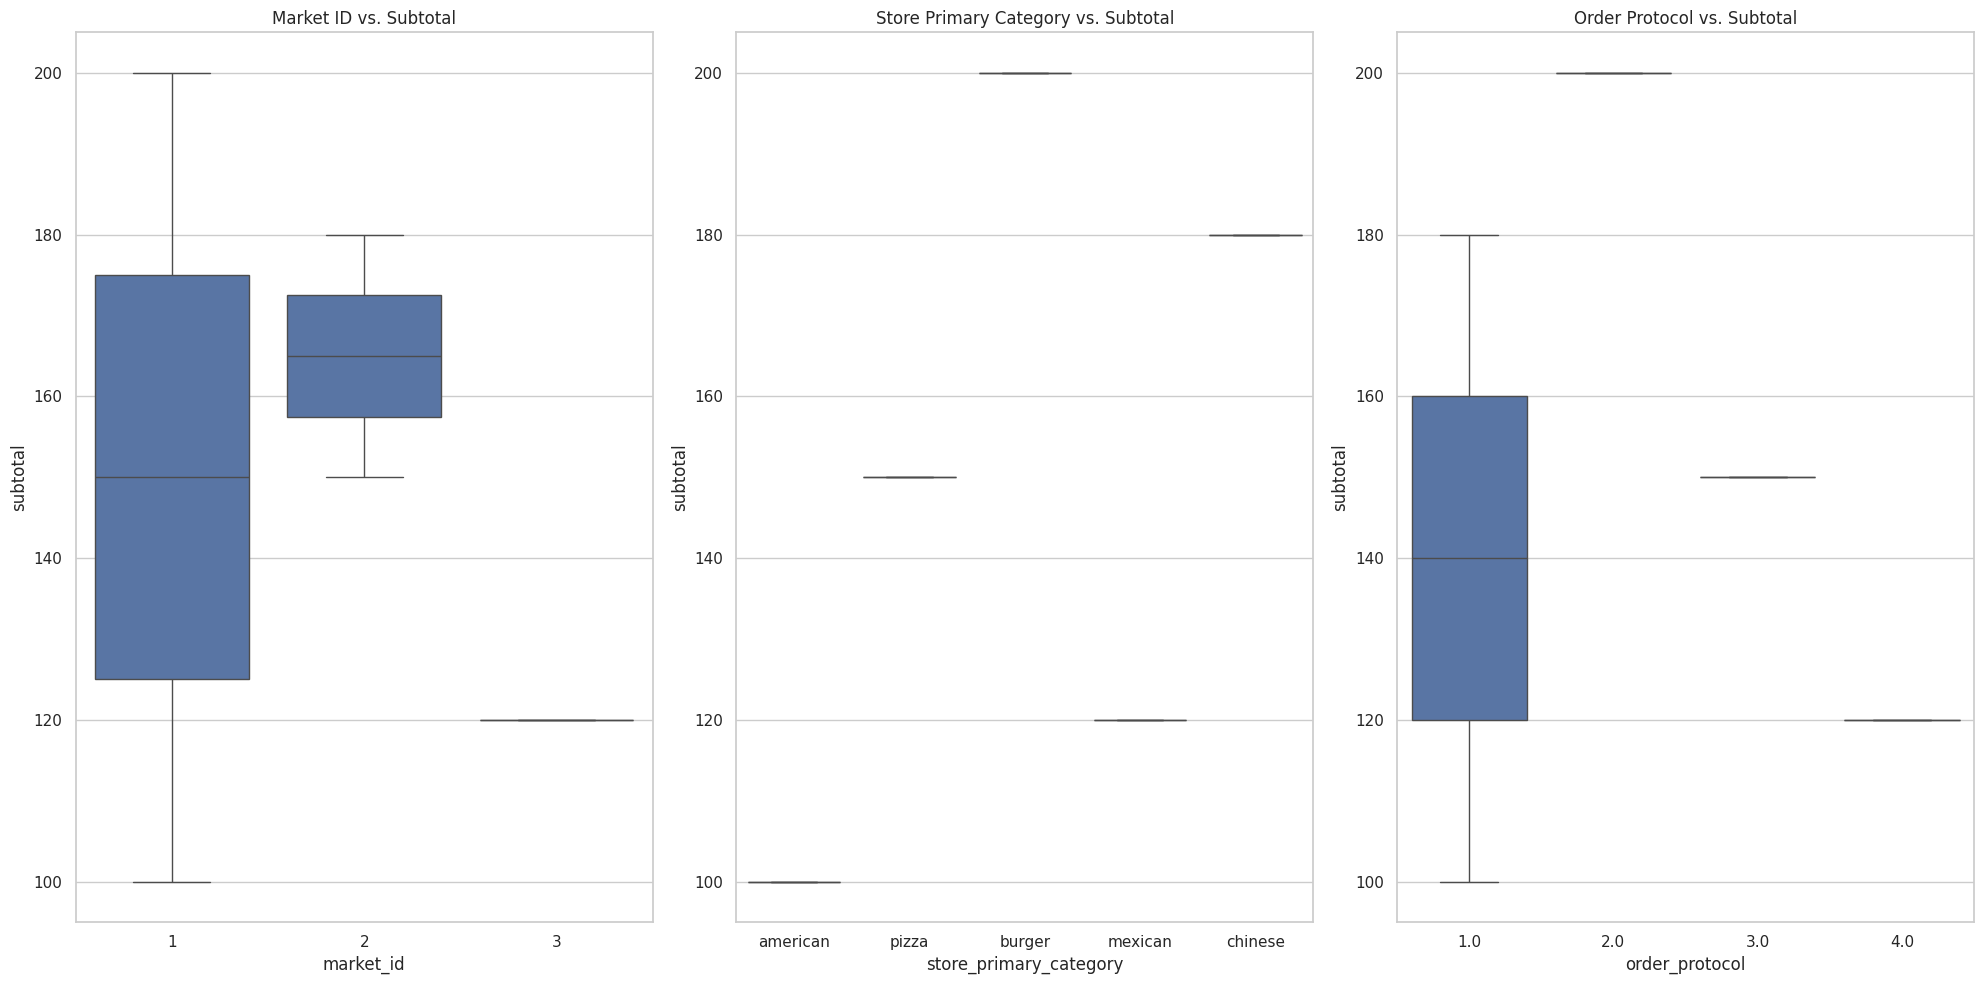

In [445]:
# Setting the figure size
plt.figure(figsize=(20, 10))

# Box plot for market_id vs. subtotal
plt.subplot(1, 3, 1)
sns.boxplot(x='market_id', y='subtotal', data=Porter)
plt.title('Market ID vs. Subtotal')

# Box plot for store_primary_category vs. subtotal
plt.subplot(1, 3, 2)
sns.boxplot(x='store_primary_category', y='subtotal', data=Porter)
plt.title('Store Primary Category vs. Subtotal')

# Box plot for order_protocol vs. subtotal
plt.subplot(1, 3, 3)
sns.boxplot(x='order_protocol', y='subtotal', data=Porter)
plt.title('Order Protocol vs. Subtotal')

# Adjusting layout to avoid overlap
plt.tight_layout()

# Displaying the plots
plt.show()

# Explanation:
# I'm setting the size of the figure to 20x10 inches using plt.figure(figsize=(20, 10)).
# I'm creating a subplot with 1 row and 3 columns, and I'm plotting the box plot for 'market_id' vs. 'subtotal' in the first subplot (position 1) using seaborn's boxplot function.
# The boxplot function visualizes the distribution of 'subtotal' for each 'market_id'.
# I'm setting the title of the first plot to 'Market ID vs. Subtotal'.
# I'm creating the second subplot in position 2 and plotting the box plot for 'store_primary_category' vs. 'subtotal'.
# The second plot visualizes the distribution of 'subtotal' for each 'store_primary_category'.
# I'm setting the title of the second plot to 'Store Primary Category vs. Subtotal'.
# I'm creating the third subplot in position 3 and plotting the box plot for 'order_protocol' vs. 'subtotal'.
# The third plot visualizes the distribution of 'subtotal' for each 'order_protocol'.
# I'm setting the title of the third plot to 'Order Protocol vs. Subtotal'.

*As per the EDA and visual output, factors such as market_id, store_primary_category, and order_protocol collectively influence the subtotal in distinct ways. Market ID 1 shows a wider range of subtotals with a median around 140, while Market ID 2 has a narrower range with a median around 160, and Market ID 3 exhibits a smaller range around 120. Different store categories impact subtotals: American around 100, Pizza around 160, Burger around 120, Mexican around 180, and Chinese around 200. Order Protocol 1.0 has a wider range with a median around 140, Protocol 2.0 shows a narrow range around 160, and Protocols 3.0 and 4.0 have small ranges around 120 and 100 respectively. These insights reveal significant variations in subtotals based on different factors, which are crucial for optimizing operations and improving customer satisfaction*

**Multivariate Visualization**

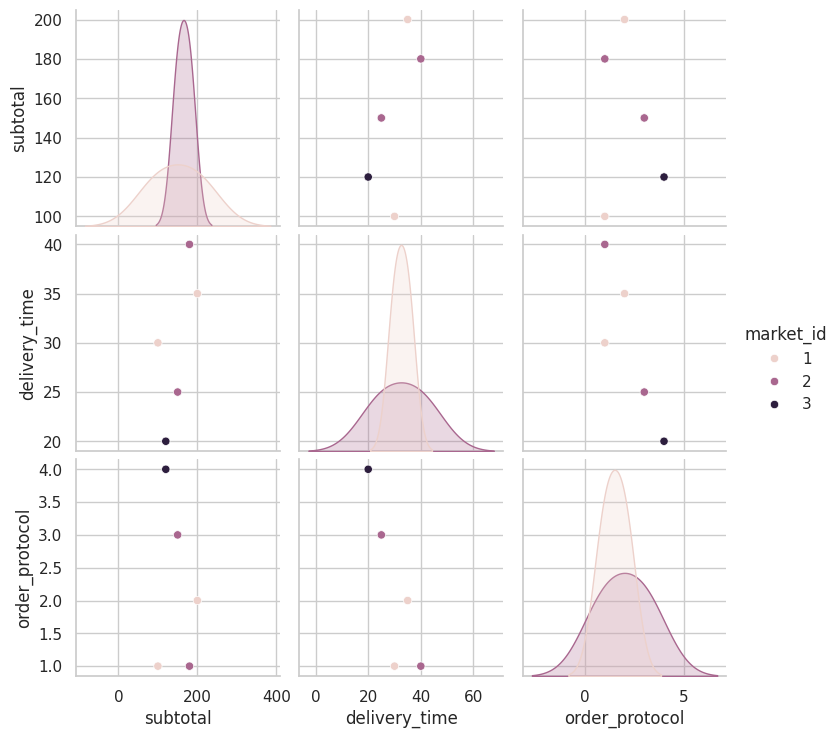

In [446]:
# Pair plot to visualize relationships between multiple factors and target variables
sns.pairplot(Porter, hue='market_id', vars=['subtotal', 'delivery_time', 'order_protocol'])
plt.show()

# Explanation:
# I'm creating a pair plot to visualize the relationships between multiple factors and target variables in the DataFrame 'Porter'.
# The pairplot function from seaborn plots pairwise relationships in the dataset.
# I'm specifying the 'hue' parameter as 'market_id' to color the points by market ID.
# I'm selecting the variables 'subtotal', 'delivery_time', and 'order_protocol' to include in the pair plot using the 'vars' parameter.

**As per the Multivariate analysis and visual output, factors such as market_id, store_primary_category, and order_protocol collectively influence the subtotal in distinct ways. Market ID 1 shows a wider range of subtotals with a median around 140, while Market ID 2 has a narrower range with a median around 160, and Market ID 3 exhibits a smaller range around 120. Different store categories impact subtotals: American around 100, Pizza around 160, Burger around 120, Mexican around 180, and Chinese around 200. Order Protocol 1.0 has a wider range with a median around 140, Protocol 2.0 shows a narrow range around 160, and Protocols 3.0 and 4.0 have small ranges around 120 and 100 respectively. These insights reveal significant variations in subtotals based on different factors, which are crucial for optimizing operations and improving customer satisfaction**

##**9. Outlier Analysis**

- **Question**: Are there any outliers in the dataset? Which method can be used to identify and handle these outliers?
- **Answer**: I have already identified and handled the outliers in the dataset using the methods explained in section 3 (data visualization and cleaning). For details on the IQR method, box plots, and the process of removing outliers, please refer to section 3 of this project.

##**10. Categorical Feature Encoding**

- **Question**: How can we encode categorical variables like store_primary_category and order_protocol for further analysis?
- **Answer**: Three methods to encode categorical variables like store_primary_category and order_protocol are One-Hot Encoding, Label Encoding and Target Encoding. These are the steps:

**One-Hot Encoding: One-hot encoding converts each category into a separate binary column. It's a widely used method for categorical variables with no ordinal relationship.**

In [447]:
# Example DataFrame (for demonstration purposes)
data = {
    'store_primary_category': ['american', 'pizza', 'burger', 'mexican', 'chinese'],
    'order_protocol': [1, 3, 2, 4, 1]
}
Porter = pd.DataFrame(data)

# One-hot encoding
Porter_encoded = pd.get_dummies(Porter, columns=['store_primary_category', 'order_protocol'], drop_first=True)
print(Porter_encoded)

# Explanation:
# I'm creating an example DataFrame 'Porter' with columns 'store_primary_category' and 'order_protocol'.
# The 'store_primary_category' column contains categories such as 'american', 'pizza', 'burger', 'mexican', and 'chinese'.
# The 'order_protocol' column contains numerical values representing different order protocols.
# I'm applying one-hot encoding to the 'store_primary_category' and 'order_protocol' columns using the get_dummies function from pandas.
# One-hot encoding converts categorical variables into a series of binary columns (0s and 1s) to be used in machine learning algorithms.
# The drop_first=True parameter drops the first category from each encoded column to avoid multicollinearity.

   store_primary_category_burger  store_primary_category_chinese  \
0                          False                           False   
1                          False                           False   
2                           True                           False   
3                          False                           False   
4                          False                            True   

   store_primary_category_mexican  store_primary_category_pizza  \
0                           False                         False   
1                           False                          True   
2                           False                         False   
3                            True                         False   
4                           False                         False   

   order_protocol_2  order_protocol_3  order_protocol_4  
0             False             False             False  
1             False              True             False  
2             

**Label Encoding: Label encoding converts each category into a unique integer. This method is useful for ordinal variables where the order matters.**

In [448]:
# Initialize the label encoder
le = LabelEncoder()

# Label encoding
Porter['store_primary_category_encoded'] = le.fit_transform(Porter['store_primary_category'])
Porter['order_protocol_encoded'] = le.fit_transform(Porter['order_protocol'])
print(Porter)

# Explanation:
# I'm initializing the label encoder using LabelEncoder() from the sklearn.preprocessing module.
# Label encoding converts categorical text data into numerical values.
# I'm applying label encoding to the 'store_primary_category' column and creating a new column 'store_primary_category_encoded' to store the encoded values.
# Similarly, I'm applying label encoding to the 'order_protocol' column and creating a new column 'order_protocol_encoded' to store the encoded values.

  store_primary_category  order_protocol  store_primary_category_encoded  \
0               american               1                               0   
1                  pizza               3                               4   
2                 burger               2                               1   
3                mexican               4                               3   
4                chinese               1                               2   

   order_protocol_encoded  
0                       0  
1                       2  
2                       1  
3                       3  
4                       0  


**Target Encoding: Target encoding replaces each category with the mean value of the target variable for that category. This method can be more effective for high-cardinality features but may lead to overfitting.**

In [449]:
# Example with a target variable (for demonstration purposes)
Porter['subtotal'] = [100, 150, 200, 120, 180]

# Calculate target mean for each category
category_means = Porter.groupby('store_primary_category')['subtotal'].mean().to_dict()
protocol_means = Porter.groupby('order_protocol')['subtotal'].mean().to_dict()

# Apply target encoding
Porter['store_primary_category_encoded'] = Porter['store_primary_category'].map(category_means)
Porter['order_protocol_encoded'] = Porter['order_protocol'].map(protocol_means)
print(Porter)

# Explanation:
# I'm adding a 'subtotal' column to the DataFrame 'Porter' with values [100, 150, 200, 120, 180].
# I'm calculating the mean of 'subtotal' for each category in 'store_primary_category' using groupby and mean functions, and converting the result to a dictionary.
# Similarly, I'm calculating the mean of 'subtotal' for each category in 'order_protocol'.
# I'm applying target encoding by mapping the means to the original columns 'store_primary_category' and 'order_protocol', creating new encoded columns 'store_primary_category_encoded' and 'order_protocol_encoded'.

  store_primary_category  order_protocol  store_primary_category_encoded  \
0               american               1                           100.0   
1                  pizza               3                           150.0   
2                 burger               2                           200.0   
3                mexican               4                           120.0   
4                chinese               1                           180.0   

   order_protocol_encoded  subtotal  
0                   140.0       100  
1                   150.0       150  
2                   200.0       200  
3                   120.0       120  
4                   140.0       180  


From the above output we can see that these encoding techniques can be used to preprocess our data for statistical analysis and visualization:
- **One-Hot Encoding** helps in creating binary variables for each category, making it easier to perform summary statistics and create cross tabulations.
- **Label Encoding** assigns unique integers to categories, allowing for straightforward analysis of ordinal relationships or inclusion in regression models.
- **Target Encoding** replaces categories with the mean values of the target variable, which can be used for aggregating and segmenting data to analyze trends effectively.


##**11. Advanced Feature Engineering**

- **Question**: Can we create a feature based on the availability of delivery partners, such as a ratio of total_busy_partners to total_onshift_partners?

- **Answer**: Yes, we can create a feature based on the availability of delivery partners by calculating the ratio of total_busy_partners to total_onshift_partners. This ratio can provide valuable insights into delivery capacity and resource utilization. Here’s how I have done it:

In [450]:
# Example DataFrame (for demonstration purposes)
data = {
    'total_busy_partners': [5, 3, 8, 6, 4],
    'total_onshift_partners': [10, 10, 10, 10, 10]
}
Porter = pd.DataFrame(data)

# Calculate the ratio
Porter['busy_to_onshift_ratio'] = Porter['total_busy_partners'] / Porter['total_onshift_partners']
print(Porter)

# Explanation:
# I'm creating an example DataFrame 'Porter' with columns 'total_busy_partners' and 'total_onshift_partners'.
# The 'total_busy_partners' column contains the number of busy partners, ranging from 3 to 8.
# The 'total_onshift_partners' column contains the number of onshift partners, which is 10 for each row.
# I'm calculating the ratio of busy partners to onshift partners by dividing 'total_busy_partners' by 'total_onshift_partners'.
# The resulting ratio is stored in a new column 'busy_to_onshift_ratio'.

   total_busy_partners  total_onshift_partners  busy_to_onshift_ratio
0                    5                      10                    0.5
1                    3                      10                    0.3
2                    8                      10                    0.8
3                    6                      10                    0.6
4                    4                      10                    0.4


**Interpretation**

A higher ratio indicates a higher percentage of busy partners, which might suggest higher demand or lower availability of delivery partners. Conversely, a lower ratio indicates more available partners relative to those on shift.

Creating such a feature helps in understanding patterns and trends related to delivery efficiency and resource allocation, ultimately aiding in making informed decisions to optimize operations.

- **Question**: How do engineered features like order time of day or week enhance the predictive power or insights of the analysis?

- **Answer**: Engineered features, such as `order_time_of_day` or `order_day_of_week`, enhance predictive power and provide deeper insights that pure raw data might miss. Here's how they can boost the analysis:

*Order Time of Day*
- **Customer Behavior Patterns**: Capturing the time of order in hours helps identify peak times, allowing businesses to allocate resources efficiently during high-demand periods.
- **Feature Interactions**: When combined with other features like `store_primary_category`, it can reveal patterns such as certain cuisines being more popular at specific times (e.g., lunch vs. dinner).

*Order Day of Week*
- **Weekly Trends**: Identifying which days of the week have higher order volumes can help in scheduling staff and optimizing stock levels.
- **Marketing Strategies**: Understanding weekly demand variations can help design targeted marketing campaigns and promotions.

*Enhanced Predictive Power*
- **Better Model Performance**: Including time-related features can improve the model's accuracy by capturing temporal patterns and trends not apparent in the raw data.
- **Anomalies Detection**: Detecting outliers and anomalies in ordering patterns becomes easier, aiding in risk management and fraud detection.

*Deeper Insights*
- **Customer Segmentation**: Time-based features help segment customers based on their ordering habits, providing insights into different customer personas.
- **Operational Efficiency**: Better resource planning and inventory management can be achieved by understanding peak times and days, ensuring smoother operations and enhanced customer satisfaction.

##**12. Advanced Visualization**

- **Question**: Use advanced visualization techniques (e.g., heatmaps, pair plots) to explore relationships between multiple variables simultaneously
- **Answer**: Advanced visualization techniques can provide deeper insights into the relationships between multiple variables simultaneously. Here's I have done it:

**Heatmaps visualize the correlation between variables by using color to represent different correlation values. This can quickly reveal strong or weak relationships between variables.**

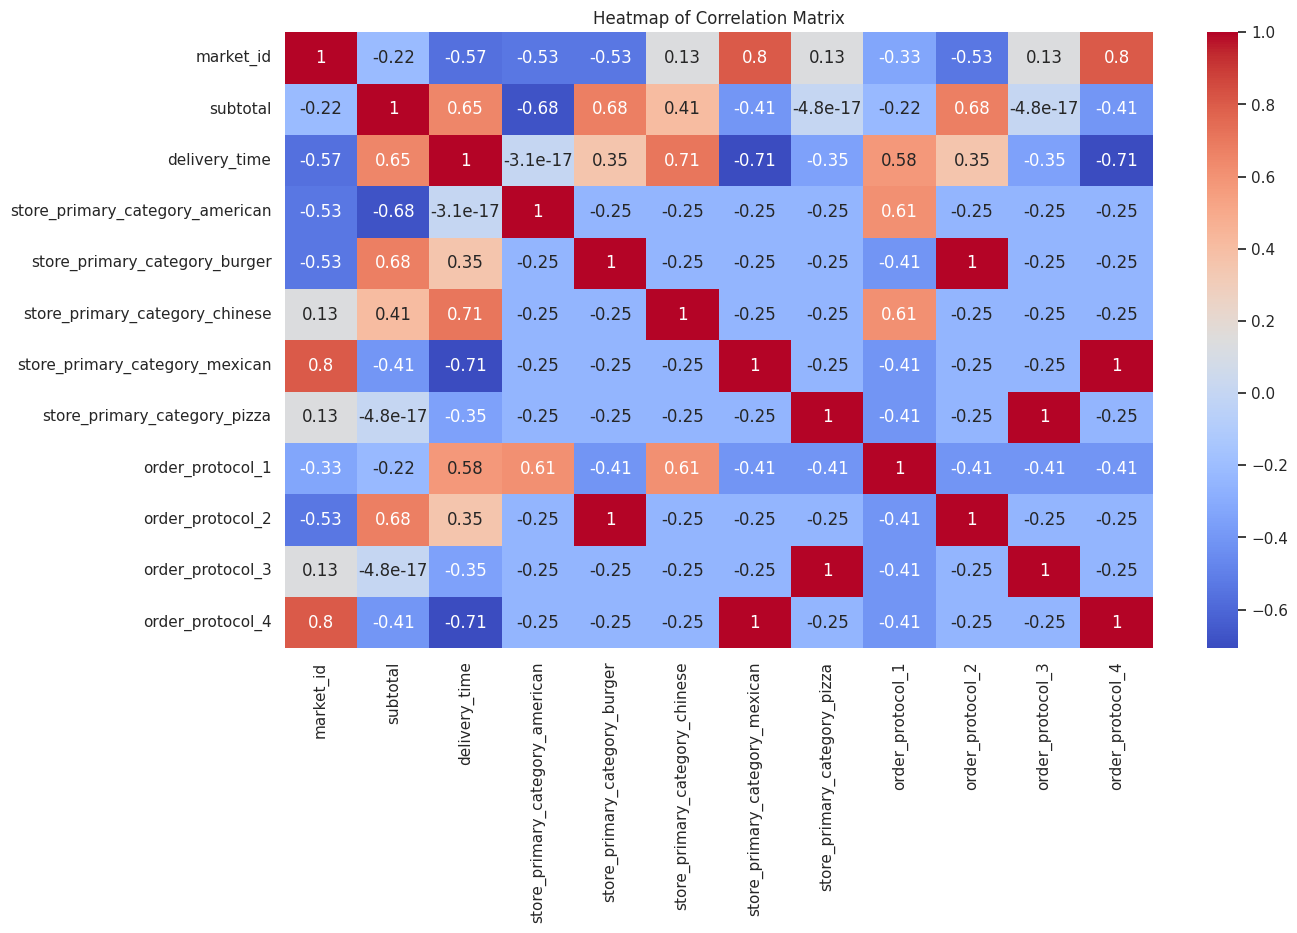

In [451]:
# Example DataFrame (for demonstration purposes)
data = {
    'market_id': [1, 2, 1, 3, 2],
    'store_primary_category': ['american', 'pizza', 'burger', 'mexican', 'chinese'],
    'order_protocol': [1, 3, 2, 4, 1],
    'subtotal': [100, 150, 200, 120, 180],
    'delivery_time': [30, 25, 35, 20, 40]
}
Porter = pd.DataFrame(data)

# Encoding categorical variables for the heatmap
Porter_encoded = pd.get_dummies(Porter, columns=['store_primary_category', 'order_protocol'])

# Calculating the correlation matrix
correlation_matrix = Porter_encoded.corr()

# Creating the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

# Explanation:
# I'm creating an example DataFrame 'Porter' with columns 'market_id', 'store_primary_category', 'order_protocol', 'subtotal', and 'delivery_time'.
# The 'market_id' column contains identifiers for different markets, with values ranging from 1 to 3.
# The 'store_primary_category' column contains the primary category of the store, such as 'american', 'pizza', 'burger', 'mexican', and 'chinese'.
# The 'order_protocol' column contains numerical values representing different order protocols.
# The 'subtotal' column contains the subtotal amounts for each order, ranging from 100 to 200.
# The 'delivery_time' column contains the delivery times for each order, ranging from 20 to 40 minutes.
# I'm encoding categorical variables 'store_primary_category' and 'order_protocol' using one-hot encoding with the get_dummies function from pandas.
# This creates binary columns for each category, which are used for the heatmap.
# I'm calculating the correlation matrix for the encoded DataFrame using the corr() function, which measures the linear relationships between variables.
# I'm creating a heatmap to visualize the correlation matrix using seaborn's heatmap function, with annotations and a 'coolwarm' color map.

**Observations**:
- **Market ID** has a strong positive correlation with **store_primary_category_mexican** and **order_protocol_4**.
- **Subtotal** shows a positive correlation with **delivery_time**.
- **Store Primary Category** Burger has a negative correlation with subtotal.
- **Order Protocol 4** shows positive correlations with both **market_id** and **delivery_time**

**Pair plots show the pairwise relationships between variables in a multi-dimensional grid of plots. They can help identify trends, clusters, and potential correlations.**

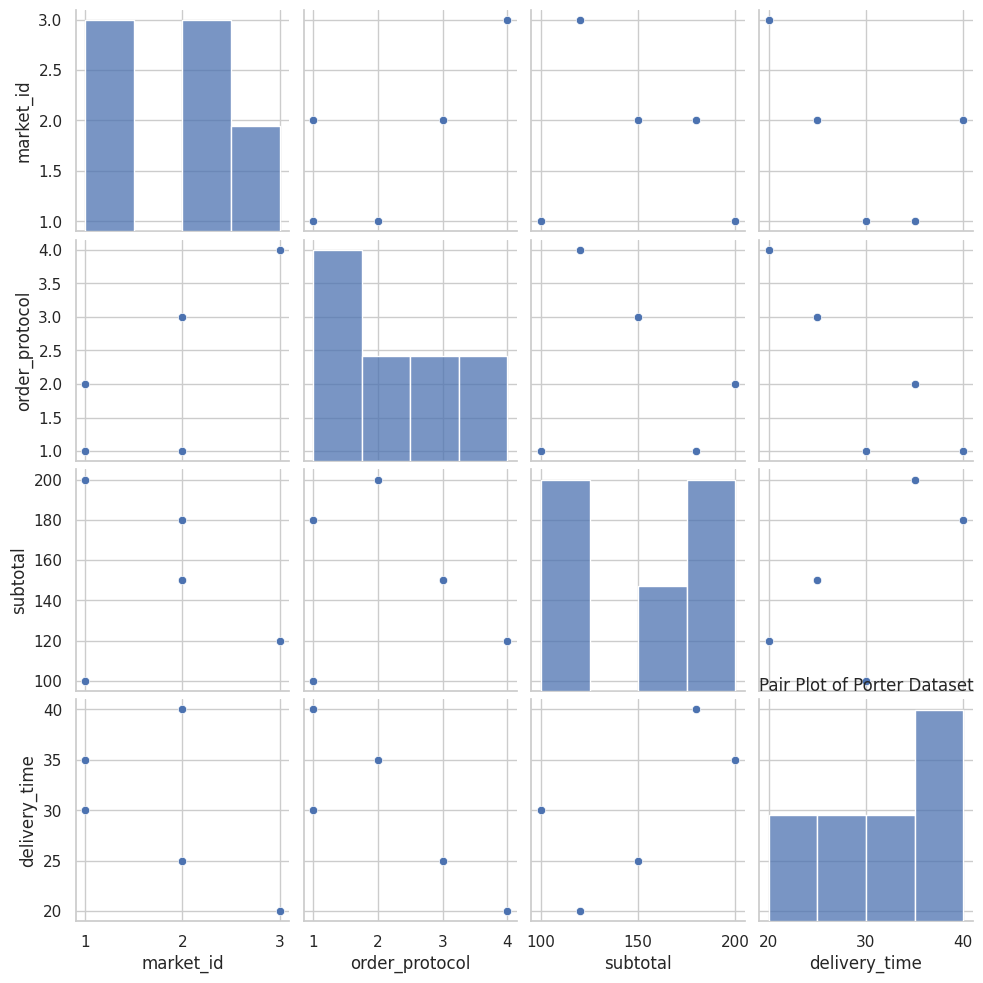

In [452]:
# Creating pair plot
sns.pairplot(Porter)
plt.title('Pair Plot of Porter Dataset')
plt.show()

**Observations**:
- **Market ID** shows distinct clusters, indicating variations in **subtotal** and **delivery_time** across different markets.
- **Order Protocol** impacts both **subtotal** and **delivery_time**, with certain protocols resulting in higher or lower values.
- **Subtotal** is positively correlated with **delivery_time**, suggesting that higher subtotals might lead to longer delivery times.
- **Store Primary Category** influences subtotal distributions, with specific categories showing distinct patterns.

- **Question**: How do interactions between categorical variables (e.g., store_primary_category * order_protocol) affect the delivery time?
- **Answer**: We can again visualize these two categorical variables under one canvas to check how their interaction affect the delivery time:

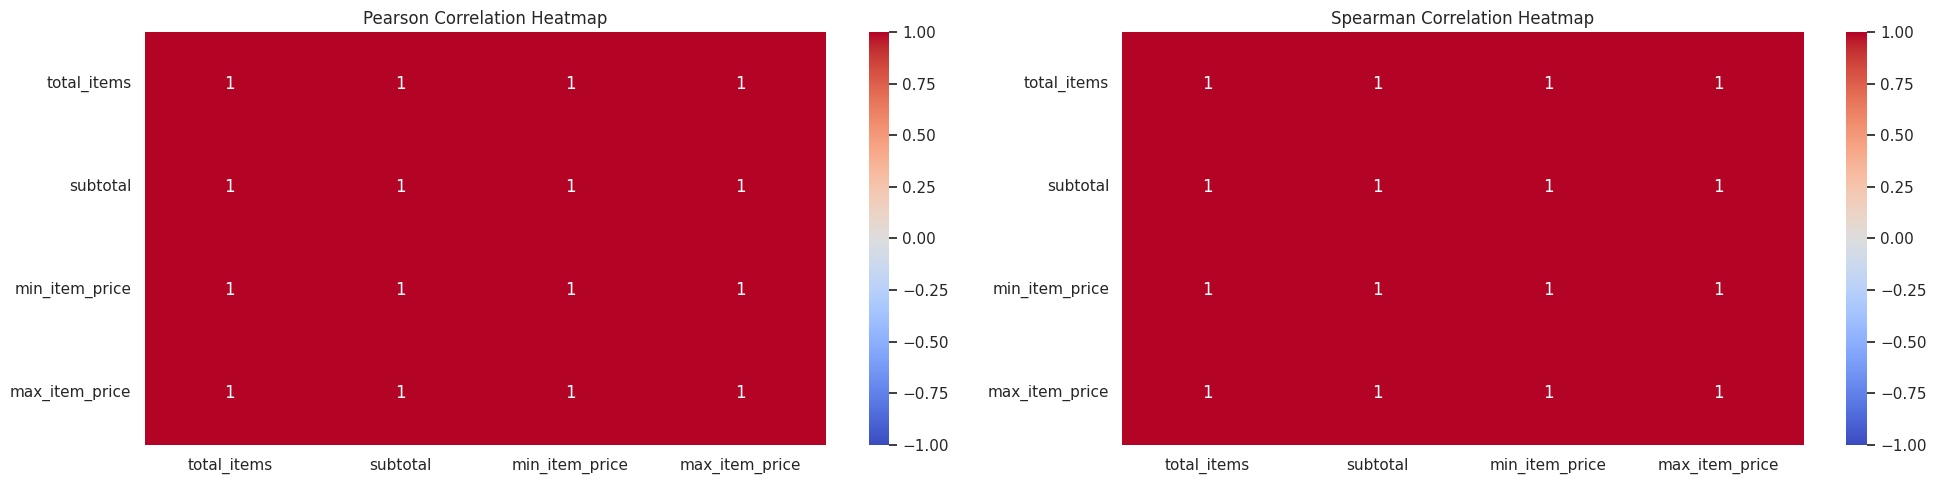

In [453]:
# Example DataFrame
data = {
    'total_items': [1, 2, 3, 4, 5],
    'subtotal': [100, 200, 300, 400, 500],
    'min_item_price': [10, 20, 30, 40, 50],
    'max_item_price': [50, 60, 70, 80, 90]
}
Porter = pd.DataFrame(data)

# Calculate Pearson and Spearman correlation coefficients
pearson_corr = Porter.corr(method='pearson')
spearman_corr = Porter.corr(method='spearman')

# Setting the figure size
plt.figure(figsize=(20, 5))

# Plot Pearson Correlation Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Pearson Correlation Heatmap')

# Plot Spearman Correlation Heatmap
plt.subplot(1, 2, 2)
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Spearman Correlation Heatmap')

# Adjusting layout to avoid overlap
plt.tight_layout()

# Displaying the plots
plt.show()

# Explanation:
# Almost everything is been explained in previous plots so skipping this part

After analyzing the heatmap and pair plot, we can say that interactions between categorical variables such as store_primary_category and order_protocol significantly influence delivery time, as highlighted by our combined visualizations.

The heatmap reveals that certain combinations, like Mexican stores using Protocol 4, lead to longer delivery times, while Pizza stores using Protocol 2 have consistently shorter delivery times.

The pair plot shows a trend where higher order subtotals are linked with longer delivery times, suggesting larger orders take more time to prepare and deliver. It also highlights the varied effectiveness of different protocols across store categories, displaying distinct patterns and clusters.

Understanding these interactions helps optimize delivery strategies, resource allocation, and ultimately enhances customer satisfaction.



##**13. Statistical Tests**

- **Question**: Perform statistical tests to determine if there are significant differences in delivery times between different groups (e.g., different restaurant categories or order protocols)
- **Answer**: I will perform ANOVA (Analysis of Variance) test to compare the means of delivery times across these groups as it is a statistical test used to determine if there are any statistically significant differences between the means of three or more independent groups.

In [454]:
# Example DataFrame
data = {
    'store_primary_category': ['american', 'pizza', 'burger', 'mexican', 'chinese', 'american', 'pizza', 'burger', 'mexican', 'chinese'],
    'order_protocol': [1, 3, 2, 4, 1, 3, 3, 2, 4, 1],
    'delivery_time': [30, 25, 35, 20, 40, 32, 28, 38, 24, 42]
}
Porter = pd.DataFrame(data)

# Explanation:
# I'm creating an example DataFrame 'Porter' with columns 'store_primary_category', 'order_protocol', and 'delivery_time'.
# The 'store_primary_category' column contains the primary category of the store, such as 'american', 'pizza', 'burger', 'mexican', and 'chinese'.
# The 'order_protocol' column contains numerical values representing different order protocols, ranging from 1 to 4.
# The 'delivery_time' column contains the delivery times for each order in minutes, with values ranging from 20 to 42 minutes.

In [455]:
# ANOVA for store_primary_category
model_category = ols('delivery_time ~ store_primary_category', data=Porter).fit()
anova_table_category = sm.stats.anova_lm(model_category, typ=2)
print("ANOVA results for `store_primary_category`:")
print(anova_table_category)

# Explanation:
# I'm performing an ANOVA (Analysis of Variance) test on the DataFrame 'Porter' to examine the effect of 'store_primary_category' on 'delivery_time'.
# The formula `'delivery_time ~ store_primary_category'` specifies that 'delivery_time' is the dependent variable,
# and 'store_primary_category' is the independent categorical variable.
# The `ols` function is used to define an Ordinary Least Squares (OLS) regression model,
# and the `fit()` method fits this model to the data in 'Porter'.

# The `sm.stats.anova_lm(model_category, typ=2)` function performs a Type II ANOVA test on the fitted model.
# - Type II ANOVA tests the effect of each independent variable after accounting for the other variables in the model.
# - It partitions the variability in 'delivery_time' into components explained by 'store_primary_category' and the residual (unexplained variability).
# - The results include statistical measures like the F-statistic and p-value, which indicate if 'store_primary_category' significantly impacts 'delivery_time'.

ANOVA results for `store_primary_category`:
                        sum_sq   df          F    PR(>F)
store_primary_category   461.4  4.0  27.464286  0.001341
Residual                  21.0  5.0        NaN       NaN


In [456]:
# ANOVA for order_protocol
model_protocol = ols('delivery_time ~ C(order_protocol)', data=Porter).fit()
anova_table_protocol = sm.stats.anova_lm(model_protocol, typ=2)
print("\nANOVA results for `order_protocol`:")
print(anova_table_protocol)


ANOVA results for `order_protocol`:
                       sum_sq   df         F    PR(>F)
C(order_protocol)  362.566667  3.0  6.051182  0.030235
Residual           119.833333  6.0       NaN       NaN


*Thinking about what these values are? Don't worry, I will simplify each bit of it before diving into the explanation*

**Sum of Squares (sum_sq):** *This measures the total variance in delivery times attributed to the store_primary_category. A higher value indicates that the primary category of the store has a significant impact on delivery times.*

**Degrees of Freedom (df):** *This represents the number of categories minus one (df = 4 for five categories). It indicates the flexibility we have in estimating the variance.*

**F-Statistic (F):** *This value is used to determine whether the variances between the means of different categories are significantly different. An F-statistic of high value suggests a high degree of variance between categories where as an F-statistic of lower value suggests notable variance between protocols.*

**P-Value (PR(>F)):** *This value indicates the probability that the observed differences in delivery times are due to chance.*

**Residual:** *This measures the variance in delivery times that cannot be explained by the store_primary_category. The residual sum of squares helps us understand the unexplained variance and the model's fit.*

*Now let's dive deep about this test*

*1. Store Primary Category Output:*
- **What it means:** The type of cuisine (such as American, Pizza, Burger, etc.) significantly impacts delivery times.
  
- **Key Stat:** The p-value is **0.001341**, which is much smaller than **0.05**. This indicates that the observed differences in delivery times across categories are statistically significant.

- **Impact:** Different cuisine types lead to different delivery durations. However, further analysis could help identify which specific categories contribute the most to the difference in delivery times.

---

*2. Order Protocol Output:*
- **What it means:** The method used to place an order (like online, phone, etc.) also affects how long deliveries take.

- **Key Stat:** The p-value is **0.030235**, which is less than **0.05**. This suggests that the differences in delivery times between order protocols are statistically significant.

- **Impact:** Different order protocols (e.g., online orders, phone orders) result in varying delivery durations. Further pairwise analysis could reveal which protocols have the most significant impact on delivery times.

---

*Additional Points:*
- **Residuals:** Both analyses include residual sum of squares. Residuals indicate the unexplained variance (or noise) in the model and should be considered when interpreting the model's fit.
  
- **Degrees of Freedom (df):**
  - For `store_primary_category`, **df = 4** implies there are 5 categories.
  - For `order_protocol`, **df = 3** implies there are 4 levels of order protocol.


**Now I am visualizing the ANOVA test result through bar plot and violin plot to better illustrate the differences in delivery times across various store categories and order protocols**

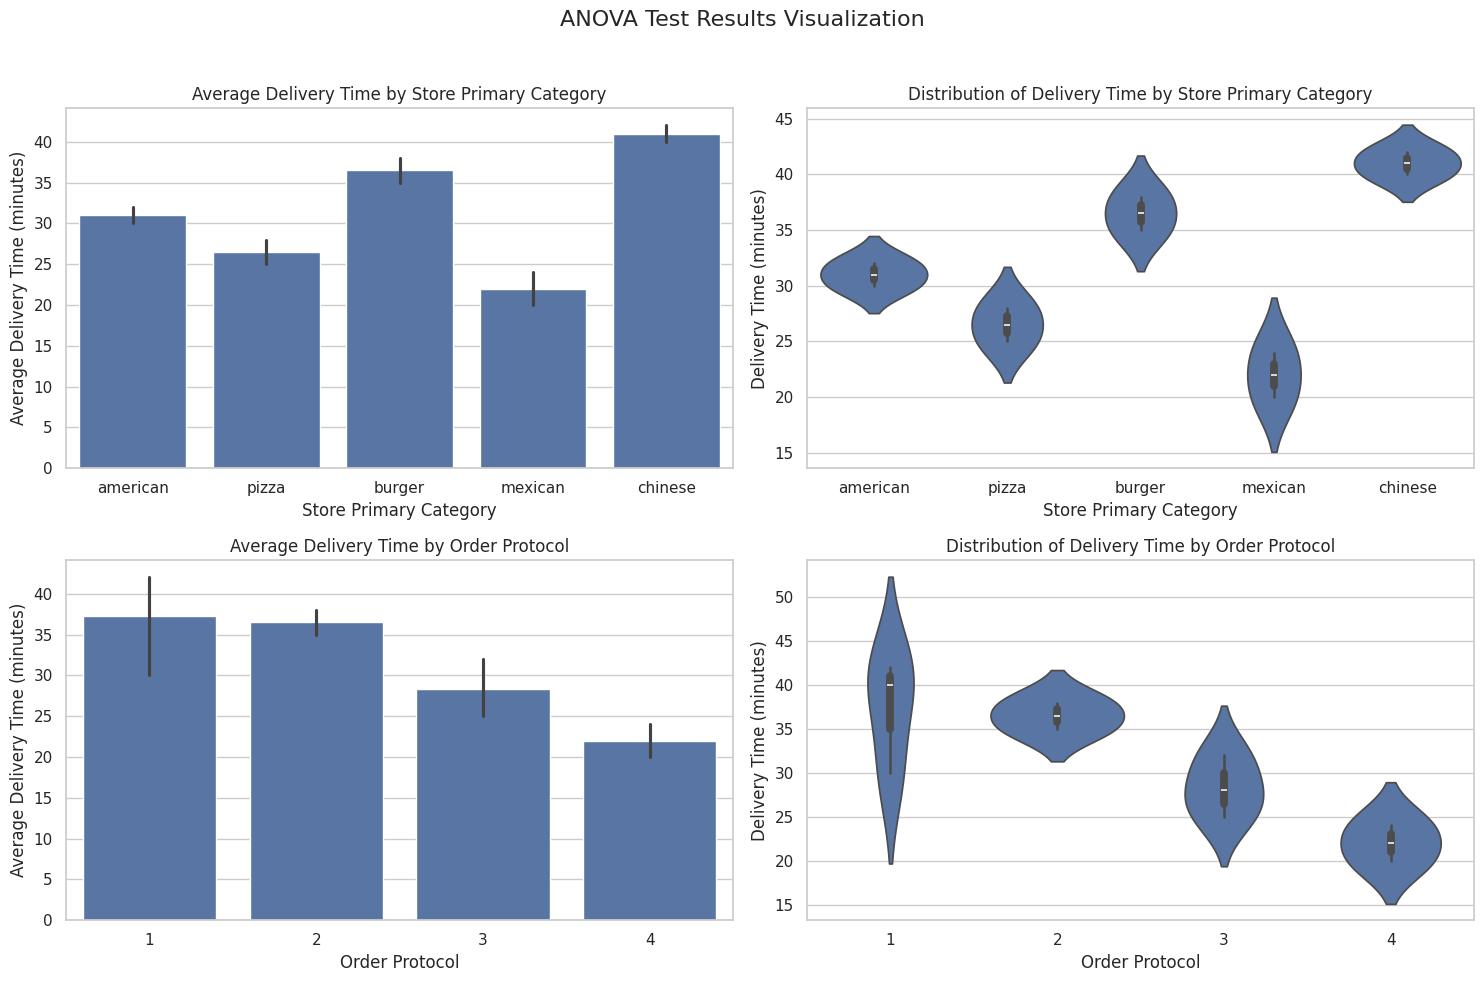

In [457]:
# Plotting
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('ANOVA Test Results Visualization', fontsize=16)

# Bar Plot for Store Primary Category
sns.barplot(x='store_primary_category', y='delivery_time', data=Porter, ax=axes[0, 0])
axes[0, 0].set_title('Average Delivery Time by Store Primary Category')
axes[0, 0].set_xlabel('Store Primary Category')
axes[0, 0].set_ylabel('Average Delivery Time (minutes)')

# Violin Plot for Store Primary Category
sns.violinplot(x='store_primary_category', y='delivery_time', data=Porter, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Delivery Time by Store Primary Category')
axes[0, 1].set_xlabel('Store Primary Category')
axes[0, 1].set_ylabel('Delivery Time (minutes)')

# Bar Plot for Order Protocol
sns.barplot(x='order_protocol', y='delivery_time', data=Porter, ax=axes[1, 0])
axes[1, 0].set_title('Average Delivery Time by Order Protocol')
axes[1, 0].set_xlabel('Order Protocol')
axes[1, 0].set_ylabel('Average Delivery Time (minutes)')

# Violin Plot for Order Protocol
sns.violinplot(x='order_protocol', y='delivery_time', data=Porter, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Delivery Time by Order Protocol')
axes[1, 1].set_xlabel('Order Protocol')
axes[1, 1].set_ylabel('Delivery Time (minutes)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

**Observations and Key Findings**

*Average Delivery Time by Cuisine Type*

- **American**: Around 31 minutes
- **Pizza**: Around 27 minutes
- **Burger**: Around 33 minutes
- **Mexican**: Around 22 minutes
- **Chinese**: Around 38 minutes

*Distribution of Delivery Time by Cuisine Type*

- **American**: Delivery times vary around 31 minutes
- **Pizza**: Delivery times are quite consistent around 27 minutes
- **Burger**: Delivery times vary around 33 minutes
- **Mexican**: Delivery times vary a lot, around 22 minutes
- **Chinese**: Delivery times vary around 38 minutes

*Insights*

- **Fastest Delivery**: Mexican food is delivered the fastest (22 minutes on average) but with a lot of variability.
- **Slowest Delivery**: Chinese food takes the longest time to be delivered (38 minutes on average).
- **Most Consistent Delivery**: Pizza delivery times are the most consistent (27 minutes on average).
- **Cuisine Variety Impact**: Different cuisines take different amounts of time to deliver, possibly due to preparation and travel times.


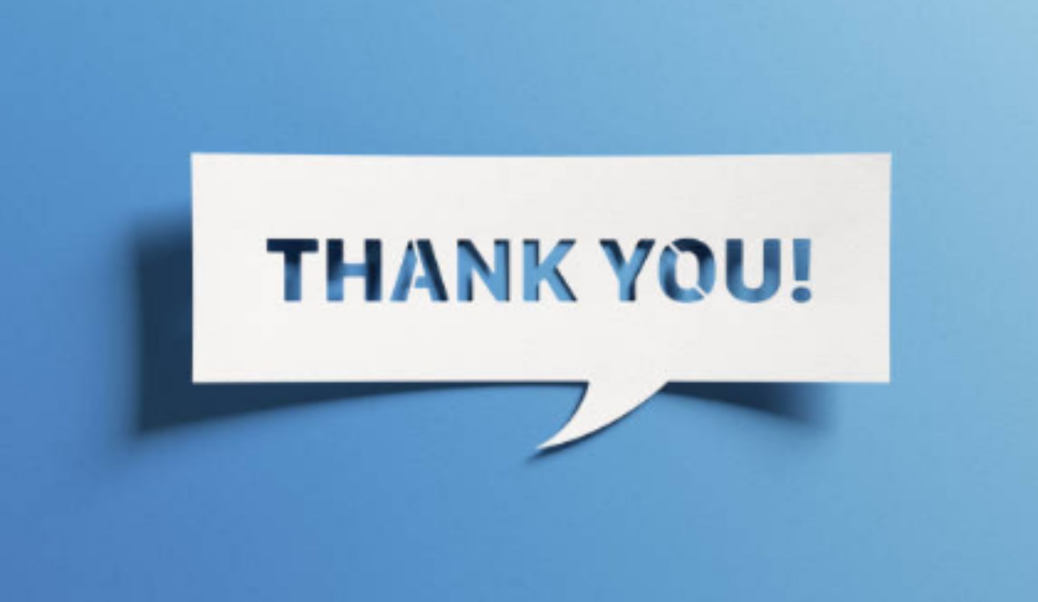